# Finetuning Network

In [1]:
# !pip install tensorboard
import numpy as np
import torch
# A subset of VOCDataLoader just for one class (person) (0)
from utils.dataloader import VOCDataLoaderPerson

loader = VOCDataLoaderPerson(train=True, batch_size=128, shuffle=True)
loader_test = VOCDataLoaderPerson(train=False, batch_size=1, shuffle=True)

from models.tinyyolov2 import TinyYoloV2
from models.my_tinyyolov2 import MyTinyYoloV2
from models.pruned_my_tinyyolo2 import PrunedMyTinyYoloV2
from utils.loss import YoloLoss
import tqdm

from utils.ap import preprocess_for_ap, precision_recall_levels, ap, display_roc
from utils.yolo import nms, filter_boxes


import copy
import matplotlib.pyplot as plt
from utils.utils import plot
from typing import Dict, List
import time

from utils.utils import net_time, plot, identify_threshold
from utils.viz import display_result

from utils.train import train, validate, longtrain

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

cur_device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(cur_device)

/home/artemis/.local/lib/python3.12/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/artemis/.local/lib/python3.12/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Longer Training

Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.27s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:41<00:00,  8.38it/s]


average train losses 36.6472053527832
average test losses 25.849954045396245
average precision 0.09090909090909091
test_precision 0.4550660255689612
test_recall 0.02046770102325658
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.87it/s]


average train losses 28.598600175645615
average test losses 19.341869533571423
average precision 0.09090909090909091
test_precision 0.45500595125997956
test_recall 0.02204801371468038
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:37<00:00,  9.31it/s]


average train losses 22.095951504177517
average test losses 14.415155905264395
average precision 0.09116470236477305
test_precision 0.5464746359614631
test_recall 0.06883116883116884
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.19s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.21it/s]


average train losses 16.92772600385878
average test losses 12.454015568790274
average precision 0.09111982733731847
test_precision 0.5540306162353958
test_recall 0.04358645469756581
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.17it/s]


average train losses 12.214289241366917
average test losses 10.081332637373878
average precision 0.09120551736798065
test_precision 0.6081881384984199
test_recall 0.06264517375628487
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.87it/s]


average train losses 9.346259858873156
average test losses 8.211880258685163
average precision 0.11180978524359347
test_precision 0.6223702380387437
test_recall 0.0662767273878385
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.86it/s]


average train losses 7.942235893673367
average test losses 7.509487728108028
average precision 0.11217567888066497
test_precision 0.6130298782765935
test_recall 0.08730035396702063
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.83it/s]


average train losses 6.6386984719170465
average test losses 6.183602121141222
average precision 0.12714371802920865
test_precision 0.6455322703165239
test_recall 0.09468617801951135
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.86it/s]


average train losses 6.038923210567898
average test losses 5.741019301944309
average precision 0.14238896567417367
test_precision 0.661411376717177
test_recall 0.09144034977368311
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.19s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.53it/s]


average train losses 5.339897102779812
average test losses 5.491118600225856
average precision 0.0969761276429963
test_precision 0.6739796787395016
test_recall 0.09041976541976542
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.10it/s]


average train losses 5.360962443881565
average test losses 4.911196846568007
average precision 0.10411645930539017
test_precision 0.6888870611346548
test_recall 0.07943445443445443
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.41it/s]


average train losses 4.9828027619255915
average test losses 4.395982501513598
average precision 0.13023399334039945
test_precision 0.7223117479737049
test_recall 0.08013190513190513
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.19s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.23it/s]


average train losses 4.995063728756374
average test losses 5.840992735322045
average precision 0.15285345761838523
test_precision 0.6300556237071824
test_recall 0.10998826276604054
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.23s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.58it/s]


average train losses 4.579137484232585
average test losses 4.3309201555713965
average precision 0.12175814777375173
test_precision 0.7179394649152665
test_recall 0.08810962699851588
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.29it/s]


average train losses 4.407317320505778
average test losses 4.56389907826046
average precision 0.15698909642303283
test_precision 0.6956017119189187
test_recall 0.09224016724016723
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.25s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.63it/s]


average train losses 4.278736088011
average test losses 4.272562623363615
average precision 0.1762758496524333
test_precision 0.7085481304358853
test_recall 0.09610790444123776
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.96it/s]


average train losses 3.9510735670725503
average test losses 3.776412751599934
average precision 0.12901196503846307
test_precision 0.7379302072900386
test_recall 0.08552609941498832
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.61it/s]


average train losses 3.94675514433119
average test losses 3.6780503573920313
average precision 0.13806282497105696
test_precision 0.7229331102728156
test_recall 0.09560974005418449
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.69it/s]


average train losses 3.9712093936072455
average test losses 3.689400606005959
average precision 0.14261518179275737
test_precision 0.7658389744609946
test_recall 0.08255026866137977
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 19.39it/s]


average train losses 3.8465585708618164
average test losses 3.502955451989785
average precision 0.15578582126303686
test_precision 0.7382252832822784
test_recall 0.09162452773563884
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.09it/s]


average train losses 3.8678461710611978
average test losses 3.5353689733733478
average precision 0.17505511240972838
test_precision 0.7532422779515098
test_recall 0.09000916778694555
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.86it/s]


average train losses 3.8421236673990884
average test losses 3.958412023351403
average precision 0.18994061334709153
test_precision 0.7131310597001816
test_recall 0.10905647850092294
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.13it/s]


average train losses 3.6255832778082953
average test losses 3.2725573856266816
average precision 0.17569023224558197
test_precision 0.7609862907636568
test_recall 0.09528979251201472
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.81it/s]


average train losses 3.454950385623508
average test losses 3.5224352490867985
average precision 0.13785455523471557
test_precision 0.7193558310975037
test_recall 0.09524457024457025
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.65it/s]


average train losses 3.149083216985067
average test losses 3.5791316480718107
average precision 0.1835927142383327
test_precision 0.7207735070647439
test_recall 0.10008119452563898


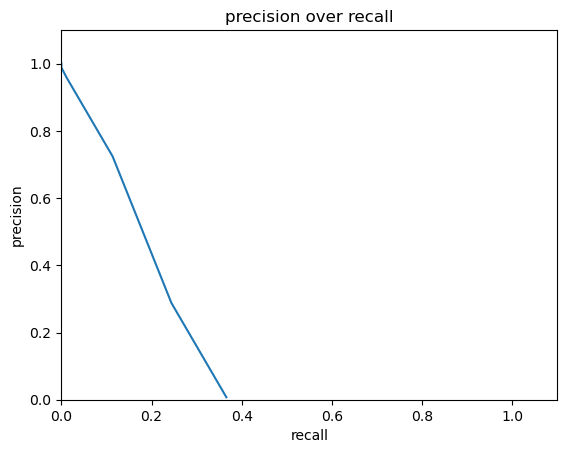

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.66it/s]


average train losses 3.1516546143425836
average test losses 3.6131468158841473
average precision 0.188577177271665
test_precision 0.7067626065363799
test_recall 0.11992976159642825
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.94it/s]


average train losses 3.107477823893229
average test losses 3.398144205750903
average precision 0.19279113885918198
test_precision 0.7349971390613299
test_recall 0.09202844480622259
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.07it/s]


average train losses 2.9291702111562095
average test losses 3.2297336739352627
average precision 0.2197308441324083
test_precision 0.7305548263276517
test_recall 0.11795673462340128
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.97it/s]


average train losses 2.9560018380482993
average test losses 3.0707941500210016
average precision 0.16676234971136955
test_precision 0.7487813563460627
test_recall 0.08770149603482937
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.62it/s]


average train losses 3.075228320227729
average test losses 3.13159534428534
average precision 0.21253778953913552
test_precision 0.757285849167329
test_recall 0.09620708509597398
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.66it/s]


average train losses 2.968768172793918
average test losses 3.0012621726745214
average precision 0.20611147392078122
test_precision 0.7509811032663846
test_recall 0.1094515566737789
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.30it/s]


average train losses 3.607862604988946
average test losses 3.1423730160775687
average precision 0.15998216436176274
test_precision 0.7881872925668909
test_recall 0.08404578960134515
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 19.42it/s]


average train losses 3.4619909392462835
average test losses 3.9088992213251923
average precision 0.1588985636421481
test_precision 0.6901149514374021
test_recall 0.10948033448033448
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.19s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 35.78it/s]


average train losses 2.875585503048367
average test losses 3.0854804349421094
average precision 0.18997634662322926
test_precision 0.7691394324331977
test_recall 0.0986959542515098
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.64it/s]


average train losses 2.6961420112186008
average test losses 3.1146174740587544
average precision 0.17678421576277326
test_precision 0.7150923704776128
test_recall 0.11190219245774802
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.39it/s]


average train losses 2.6034892665015326
average test losses 3.0908340276815953
average precision 0.1962729930444473
test_precision 0.7365993217846268
test_recall 0.10757041312596868
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.24s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.39it/s]


average train losses 2.5665769577026367
average test losses 2.867360424791646
average precision 0.1993610778788644
test_precision 0.7407871894894292
test_recall 0.10320574487241153
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.94it/s]


average train losses 2.6149311595492892
average test losses 2.865525413442541
average precision 0.20891129481307366
test_precision 0.7525588410290653
test_recall 0.09836768170101504
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.19it/s]


average train losses 2.4983745680914984
average test losses 3.3026440850010625
average precision 0.17583838294787338
test_precision 0.7113736131217316
test_recall 0.1251828418495085
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.11it/s]


average train losses 2.6460397243499756
average test losses 2.8640212345327067
average precision 0.20669089992581827
test_precision 0.7499751447783148
test_recall 0.10301447523669745
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.15it/s]


average train losses 2.4286593331231012
average test losses 2.7592831946845746
average precision 0.20655525518189552
test_precision 0.7462495935028741
test_recall 0.10765284098617432
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 39.75it/s]


average train losses 2.407376766204834
average test losses 2.8404113685982857
average precision 0.18477161904462613
test_precision 0.7173376808331899
test_recall 0.12463020518576073
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.39it/s]


average train losses 2.357042974895901
average test losses 2.744258293738732
average precision 0.20172195378881294
test_precision 0.741327937128322
test_recall 0.12064396508840954
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.22it/s]


average train losses 2.3308977021111383
average test losses 2.9576301863390495
average precision 0.20198525940451298
test_precision 0.7385220783605855
test_recall 0.11614280780947447
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.91it/s]


average train losses 2.3132839732699924
average test losses 2.665164112025856
average precision 0.19472138440812303
test_precision 0.7292816336551109
test_recall 0.11974938641605308
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 49.51it/s]


average train losses 2.3896330197652182
average test losses 2.757064247742677
average precision 0.19359463333785215
test_precision 0.7326755704953414
test_recall 0.12496104718326939
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.61it/s]


average train losses 2.292248249053955
average test losses 2.7057243957478776
average precision 0.2257133004499831
test_precision 0.7532778360845347
test_recall 0.12632850688406244
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.84it/s]


average train losses 2.2264561123318143
average test losses 2.614458218598977
average precision 0.20711498514972748
test_precision 0.7483914877943058
test_recall 0.10189080466858244
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.68it/s]


average train losses 2.2119597064124212
average test losses 2.9038710543233104
average precision 0.23835905968007703
test_precision 0.685710489032706
test_recall 0.16096352207463316
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.27it/s]


average train losses 2.1956267886691623
average test losses 2.5570794362627884
average precision 0.19684199738811226
test_precision 0.734869352628249
test_recall 0.12457203290536623


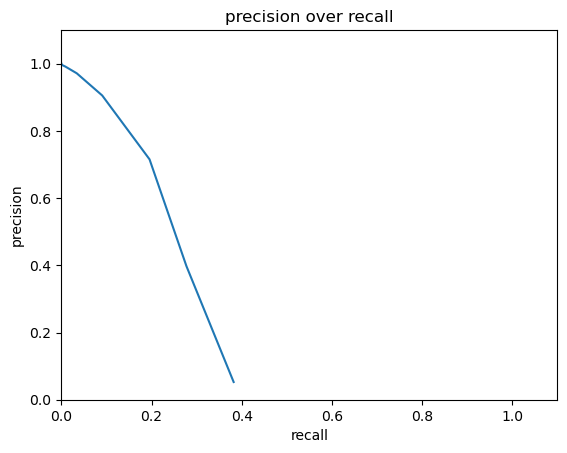

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.39it/s]


average train losses 2.264775355656942
average test losses 2.765320809138806
average precision 0.20686024617532064
test_precision 0.7407892801043546
test_recall 0.13033304144415256
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.02it/s]


average train losses 2.250584284464518
average test losses 2.5975957088321024
average precision 0.26354017890443243
test_precision 0.7162956977684898
test_recall 0.14487467265245044
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.85it/s]


average train losses 2.209248701731364
average test losses 2.6095935087597946
average precision 0.27095017634558627
test_precision 0.7258634060986704
test_recall 0.15129726240837352
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.78it/s]


average train losses 2.265466425153944
average test losses 2.6574955708280927
average precision 0.19888564851184595
test_precision 0.7329953322477272
test_recall 0.1222438055771389
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.81it/s]


average train losses 2.285333368513319
average test losses 2.654342489874261
average precision 0.2280420716211524
test_precision 0.7454900557358032
test_recall 0.1308662530884753
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.76it/s]


average train losses 2.188850243886312
average test losses 2.6567554810108285
average precision 0.2120063672424875
test_precision 0.7562665917388322
test_recall 0.11217023717023716
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.73it/s]


average train losses 2.1463908089531794
average test losses 2.556542384658444
average precision 0.2814720251307883
test_precision 0.7395616713236419
test_recall 0.150346258679592
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.74it/s]


average train losses 2.0816721386379666
average test losses 2.4608101452517714
average precision 0.21272350986766161
test_precision 0.7473863778638629
test_recall 0.13000569389458277
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.11it/s]


average train losses 2.077439546585083
average test losses 2.8648996592586875
average precision 0.2290886978836222
test_precision 0.6745348706328778
test_recall 0.15807001640334975
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.85it/s]


average train losses 2.041351901160346
average test losses 2.6530190969464447
average precision 0.25566183442324236
test_precision 0.7062796690312431
test_recall 0.14327606549828772
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.77it/s]


average train losses 2.0340054432551065
average test losses 2.862946095799449
average precision 0.25789851212640036
test_precision 0.6917310412415962
test_recall 0.1724016724016724
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.31it/s]


average train losses 1.994417707125346
average test losses 2.5302216940455966
average precision 0.2629906960772837
test_precision 0.7155317594827124
test_recall 0.14881312103534325
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.77it/s]


average train losses 1.9881318277782865
average test losses 2.6185860642340786
average precision 0.26762364361834684
test_precision 0.723927228694413
test_recall 0.14851280406835962
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.12it/s]


average train losses 1.9649606280856662
average test losses 2.802374243906081
average precision 0.2384563437528503
test_precision 0.6801366632335614
test_recall 0.165436518214296
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.56it/s]


average train losses 1.9355309936735365
average test losses 2.611880540168523
average precision 0.2810551639505729
test_precision 0.69808330554079
test_recall 0.16782004004226225
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.35it/s]


average train losses 1.937789069281684
average test losses 2.657344380165437
average precision 0.2523405437819408
test_precision 0.7041482352827776
test_recall 0.15143642365864587
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.79it/s]


average train losses 1.9614477422502306
average test losses 2.8344844864983845
average precision 0.2536861134268895
test_precision 0.6840044330314398
test_recall 0.16201946201946205
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 141.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 16.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 16.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.11it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.03it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 71.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.18it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 165.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 146.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.80it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 137.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.86it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.90it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.89it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.28it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.43it/s]


Max accuracy: 0.2984177624258988
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00, 15.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 41.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.53it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.82it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 152.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.36it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 165.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 158.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 138.26it/s]

Max accuracy: 0.2984177624258988
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 45.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.21it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.45it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.82it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.83it/s]

Max accuracy: 0.305038594536231
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 16.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 34.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.25it/s]

Max accuracy: 0.305038594536231
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6500)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:42<00:00,  8.31it/s]


average train losses 43.450954013400604
average test losses 34.373591724623985
average precision 0.09119014253130558
test_precision 0.5468598035656189
test_recall 0.0781117031117031
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.11it/s]


average train losses 34.24114100138346
average test losses 24.29817411091253
average precision 0.09157273553430802
test_precision 0.5468137494575115
test_recall 0.0744940244940245
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.69it/s]


average train losses 27.60134145948622
average test losses 17.487276675015092
average precision 0.09124112831168046
test_precision 0.5466011083031117
test_recall 0.06673953618398062
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.54it/s]


average train losses 22.13977305094401
average test losses 16.074071653208502
average precision 0.09156812415016789
test_precision 0.6004270137571527
test_recall 0.07086360141915696
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.46it/s]


average train losses 17.895145098368328
average test losses 16.293091543040045
average precision 0.09192929840881964
test_precision 0.5631477048854902
test_recall 0.0904496737830071
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.58it/s]


average train losses 14.349559360080296
average test losses 15.558626484667133
average precision 0.11844711925207668
test_precision 0.5517718611766255
test_recall 0.11730687008464787
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.37it/s]


average train losses 11.978074179755318
average test losses 14.231583638748212
average precision 0.09618156109982232
test_precision 0.5688049919178422
test_recall 0.12449875227653004
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.23s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.83it/s]


average train losses 10.003209643893772
average test losses 11.532140643508345
average precision 0.10876054684528792
test_precision 0.6198159915566552
test_recall 0.13107283662839217
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 13.01it/s]


average train losses 8.892515818277994
average test losses 9.79999416438263
average precision 0.11022819040734327
test_precision 0.6463943715893835
test_recall 0.109436037213815
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.81it/s]


average train losses 7.918459786309136
average test losses 8.764613923184212
average precision 0.12351712795200914
test_precision 0.662481594283442
test_recall 0.11874462985574095
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.33it/s]


average train losses 7.217738363477919
average test losses 7.9480934835906725
average precision 0.1348218594365009
test_precision 0.6726275294655426
test_recall 0.11740409795965351
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.89it/s]


average train losses 6.6732527414957685
average test losses 6.926234519040143
average precision 0.09796642287337533
test_precision 0.7086453537064951
test_recall 0.09790096734541179
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.80it/s]


average train losses 6.10133499569363
average test losses 6.401083223500483
average precision 0.10514548595334211
test_precision 0.7192381577234658
test_recall 0.09825452325452325
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.02it/s]


average train losses 5.816156122419569
average test losses 6.544736014472114
average precision 0.10850748343186857
test_precision 0.7081399091386992
test_recall 0.09505155338488672
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.19s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.10it/s]


average train losses 5.504983584086101
average test losses 5.690543590447842
average precision 0.11267371826723158
test_precision 0.7239049400899364
test_recall 0.09634470467803802
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.74it/s]


average train losses 5.258952193790012
average test losses 5.558029314052006
average precision 0.12051998710037229
test_precision 0.7289976424720018
test_recall 0.10801266634599967
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.30it/s]


average train losses 4.98184601465861
average test losses 5.08404697176398
average precision 0.11404894037697683
test_precision 0.7431260361207392
test_recall 0.08186237630682075
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.80it/s]


average train losses 4.71754789352417
average test losses 5.311494953611977
average precision 0.13080140778204852
test_precision 0.7314131921852106
test_recall 0.1088458866236644
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.34it/s]


average train losses 4.568357944488525
average test losses 5.199048269168604
average precision 0.13524782383640063
test_precision 0.7354537964918683
test_recall 0.10460701849590738
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.67it/s]


average train losses 4.411755296919081
average test losses 4.96146929637659
average precision 0.13751343041679467
test_precision 0.7365355638334807
test_recall 0.1100411933745267
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.93it/s]


average train losses 4.300014707777235
average test losses 4.776708003802177
average precision 0.14783044166604886
test_precision 0.7492938665105354
test_recall 0.09101022434355768
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.66it/s]


average train losses 4.118672291437785
average test losses 4.463502115673489
average precision 0.15532586033411408
test_precision 0.7538729438485178
test_recall 0.10141555974889307
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.38it/s]


average train losses 4.038351721233791
average test losses 4.696836198497023
average precision 0.1542685589248248
test_precision 0.7548950733733832
test_recall 0.09627481571926015
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.69it/s]


average train losses 3.901826408174303
average test losses 4.513584871237774
average precision 0.1540896618860156
test_precision 0.7480024363543457
test_recall 0.10527713027713029
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.93it/s]


average train losses 3.7547068330976696
average test losses 3.967596721785021
average precision 0.14579150739391047
test_precision 0.7781588470048936
test_recall 0.09173521951299728


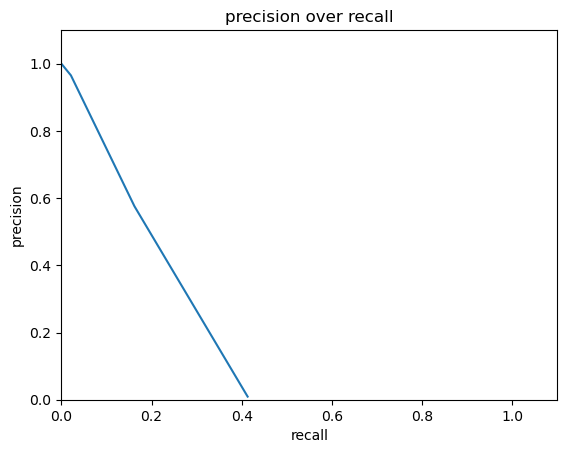

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.53it/s]


average train losses 3.706474781036377
average test losses 4.219835480393847
average precision 0.13170064343849866
test_precision 0.7605935324760084
test_recall 0.09938569660791882
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.30it/s]


average train losses 3.6245853900909424
average test losses 4.372006152769779
average precision 0.1520768824736244
test_precision 0.7405936089411413
test_recall 0.1002786308341864
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 26.69it/s]


average train losses 3.5556887785593667
average test losses 3.9452945883797104
average precision 0.16639892195901976
test_precision 0.7542906149303552
test_recall 0.10498349387238276
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 35.31it/s]


average train losses 3.4573019080691867
average test losses 3.8483835706683647
average precision 0.14961363720332999
test_precision 0.7831282707179635
test_recall 0.08678482011815346
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.65it/s]


average train losses 3.397153033150567
average test losses 3.561639206701534
average precision 0.15855146031326914
test_precision 0.7915480933099021
test_recall 0.08418906196683974
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.18it/s]


average train losses 3.314006937874688
average test losses 3.700040743221924
average precision 0.15747676196409202
test_precision 0.7908618953492252
test_recall 0.08442339553450666
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.46it/s]


average train losses 3.2839203675587973
average test losses 3.8647695722063724
average precision 0.16721473962922498
test_precision 0.7496933879198391
test_recall 0.10179758513091845
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.15it/s]


average train losses 3.2001349925994873
average test losses 3.4268306466588947
average precision 0.18341476385911823
test_precision 0.7636851107961318
test_recall 0.10691489580378469
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.19it/s]


average train losses 3.074265241622925
average test losses 3.573358412142153
average precision 0.14837082750481737
test_precision 0.7756262880936113
test_recall 0.09093190759857427
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.06it/s]


average train losses 3.025526656044854
average test losses 3.4737701320919894
average precision 0.14737567734942544
test_precision 0.7717438991338051
test_recall 0.09836727058949281
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 43.56it/s]


average train losses 2.9969364007314048
average test losses 3.528130650859952
average precision 0.18537526946709004
test_precision 0.7613809510283271
test_recall 0.11166210332876998
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.80it/s]


average train losses 2.940933518939548
average test losses 3.414472012438326
average precision 0.18775188455948222
test_precision 0.7670326860625059
test_recall 0.09950892728670506
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.82it/s]


average train losses 2.9296450350019665
average test losses 3.5813635560522052
average precision 0.17448410524757058
test_precision 0.7544753104838738
test_recall 0.10953326508882064
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.45it/s]


average train losses 2.8808137045966253
average test losses 3.498695458781685
average precision 0.17613075182648985
test_precision 0.7559768223291261
test_recall 0.10053300608856164
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.48it/s]


average train losses 2.871427880393134
average test losses 3.4918932660013184
average precision 0.1930740021094125
test_precision 0.76597969723733
test_recall 0.10363453419008975
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.70it/s]


average train losses 2.798039780722724
average test losses 3.2590435702576595
average precision 0.17798451949036007
test_precision 0.7590782193626278
test_recall 0.10344758122535898
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.68it/s]


average train losses 2.782581408818563
average test losses 3.2413114057986485
average precision 0.14486729104264817
test_precision 0.7652592447679353
test_recall 0.09449007782341116
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.16it/s]


average train losses 2.7625337176852756
average test losses 3.307716036454225
average precision 0.2151354727354935
test_precision 0.7569640145640353
test_recall 0.11856106856106857
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.44it/s]


average train losses 2.710680431789822
average test losses 3.151765045617041
average precision 0.16239419343120184
test_precision 0.7894856205226289
test_recall 0.09670596892819114
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.36it/s]


average train losses 2.684708171420627
average test losses 3.2923836076361503
average precision 0.14660734952870075
test_precision 0.7692439721653234
test_recall 0.09536800647911758
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.78it/s]


average train losses 2.67052517996894
average test losses 3.0393992227706472
average precision 0.19990525417049543
test_precision 0.772926281456764
test_recall 0.0996668968891191
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.35it/s]


average train losses 2.636513074239095
average test losses 3.0746214906034988
average precision 0.22080322042789735
test_precision 0.769237451820139
test_recall 0.10005991950436394
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.24it/s]


average train losses 2.6291068659888372
average test losses 3.13410861947258
average precision 0.2031050795467717
test_precision 0.7809209421376595
test_recall 0.09942053830942718
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.81it/s]


average train losses 2.5524726973639593
average test losses 3.1962511018130852
average precision 0.2167743362711324
test_precision 0.7563582091883386
test_recall 0.10905802016913127
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.79it/s]


average train losses 2.5487830903795032
average test losses 2.9551809937865645
average precision 0.1528713518313532
test_precision 0.7718388041321389
test_recall 0.09179575568464457


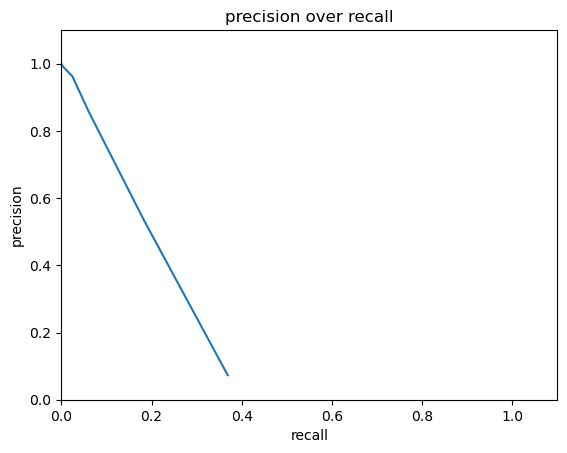

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.14it/s]


average train losses 2.536114772160848
average test losses 3.023290063580896
average precision 0.1608261842399307
test_precision 0.7843261410732207
test_recall 0.08818506596284373
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.48it/s]


average train losses 2.490390141805013
average test losses 3.2616588430866558
average precision 0.22141954384989235
test_precision 0.7689759138366108
test_recall 0.10049898661009771
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.18it/s]


average train losses 2.4802385171254477
average test losses 3.1955612344279927
average precision 0.19971216107129958
test_precision 0.7305116085374136
test_recall 0.12548593381926715
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.82it/s]


average train losses 2.4654279020097523
average test losses 3.2384115226588017
average precision 0.22743382823968197
test_precision 0.7632190306915511
test_recall 0.11128788906566685
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.28it/s]


average train losses 2.44117890463935
average test losses 3.113463919047277
average precision 0.18601664205217958
test_precision 0.7234806618726382
test_recall 0.11971485304818638
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 43.16it/s]


average train losses 2.4230213430192737
average test losses 3.4349739840227653
average precision 0.18534406829838596
test_precision 0.6635332379016969
test_recall 0.138640680307347
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.12it/s]


average train losses 2.3800152672661676
average test losses 2.845342905263276
average precision 0.19609750674062373
test_precision 0.7219975326406497
test_recall 0.12833586166919497
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.32it/s]


average train losses 2.344318840238783
average test losses 3.220603258181841
average precision 0.19955211752620433
test_precision 0.7227758074165609
test_recall 0.12499599166265833
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.62it/s]


average train losses 2.358707904815674
average test losses 3.0847890731955525
average precision 0.2290645082926031
test_precision 0.7016711909420207
test_recall 0.135773896885008
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.31it/s]


average train losses 2.2977438237931995
average test losses 3.3376153965621254
average precision 0.20195177456589863
test_precision 0.7371380101440359
test_recall 0.10625167014055902
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 138.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.86it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.14it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.59it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.60it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.11it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.21it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 171.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.99it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.45it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 178.08it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 178.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.11it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.21it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 182.33it/s]

Max accuracy: 0.25381051242813685
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.99it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 90.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.90it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.56it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.53it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.07it/s]

Max accuracy: 0.25381051242813685
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.65it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.20it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 47.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.36it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.05it/s]

Max accuracy: 0.2538421548077036
With filter threshold: tensor(0.0500)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 16.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.29it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 34.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 32.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 41.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.56it/s]

Max accuracy: 0.255138370254663
With filter threshold: tensor(0.0750)
With NMS threshold: tensor(0.6000)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:49<00:00,  7.05it/s]


average train losses 52.56083128187392
average test losses 44.401225891548
average precision 0.09111336769439965
test_precision 0.5464759293810892
test_recall 0.07043111209777878
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.73it/s]


average train losses 41.20580037434896
average test losses 28.744137864506822
average precision 0.0911171588263365
test_precision 0.5462960671327778
test_recall 0.06423288645510868
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.95it/s]


average train losses 32.81421216328939
average test losses 20.5901604676858
average precision 0.09141519684262077
test_precision 0.5484315031361074
test_recall 0.07087387920721254
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:40<00:00,  8.66it/s]


average train losses 26.490599738226997
average test losses 18.03762234038437
average precision 0.0914417055748003
test_precision 0.6314013378835677
test_recall 0.07534718368051703
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:40<00:00,  8.62it/s]


average train losses 21.397383371988933
average test losses 17.590509197311185
average precision 0.09202817760007038
test_precision 0.6066566741720139
test_recall 0.10409127909127909
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.92it/s]


average train losses 17.3454532623291
average test losses 16.288892381890886
average precision 0.09303961898488473
test_precision 0.6020041720877028
test_recall 0.1293439071216849
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:40<00:00,  8.54it/s]


average train losses 14.314898702833387
average test losses 14.21007348465444
average precision 0.1031965370094726
test_precision 0.6301181132211875
test_recall 0.13390210612432832
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:37<00:00,  9.30it/s]


average train losses 12.240195168389214
average test losses 12.943201931793126
average precision 0.10338413421543037
test_precision 0.6358270805380399
test_recall 0.11260365149254038
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.79it/s]


average train losses 10.723532146877712
average test losses 11.298530521555843
average precision 0.12522193533630271
test_precision 0.6680197995668151
test_recall 0.11480679814013148
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.36it/s]


average train losses 9.704597367180718
average test losses 10.145218351967314
average precision 0.09318297966631071
test_precision 0.6842976268779797
test_recall 0.11468253968253968
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.89it/s]


average train losses 8.865385267469618
average test losses 9.162247095352564
average precision 0.09426918605838103
test_precision 0.7060323528931314
test_recall 0.11034757423646312
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.15it/s]


average train losses 8.241970698038736
average test losses 8.09907727635484
average precision 0.09513202398854602
test_precision 0.7249078823911436
test_recall 0.102676644343311
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:29<00:00, 11.79it/s]


average train losses 7.588558302985297
average test losses 8.009371011685102
average precision 0.10201205136411749
test_precision 0.7202938376137562
test_recall 0.10852285574507797
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.59it/s]


average train losses 7.08524407280816
average test losses 7.511496882153373
average precision 0.1075642847761208
test_precision 0.7302957137542078
test_recall 0.10100300933634267
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.51it/s]


average train losses 6.687472926245795
average test losses 7.113415837627531
average precision 0.1161988369886994
test_precision 0.7287740276869177
test_recall 0.10194866861533529
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.93it/s]


average train losses 6.360342184702556
average test losses 6.3363270576183615
average precision 0.12592473663494352
test_precision 0.7449695999170176
test_recall 0.09918538251871585
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.08it/s]


average train losses 6.080459382798937
average test losses 6.4540567900720145
average precision 0.127736286028433
test_precision 0.7427018670096591
test_recall 0.0903915015026126
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.51it/s]


average train losses 5.794439527723524
average test losses 5.628740515124764
average precision 0.13687945792229544
test_precision 0.7728064195835159
test_recall 0.09206904206904207
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.90it/s]


average train losses 5.523617797427708
average test losses 5.813709885985763
average precision 0.1242809093311627
test_precision 0.7596788494221691
test_recall 0.09190685857352524
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.58it/s]


average train losses 5.31027274661594
average test losses 5.463747573374343
average precision 0.12614204425307343
test_precision 0.7617286798397089
test_recall 0.08281831337386893
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.13it/s]


average train losses 5.078741815355089
average test losses 5.2735749262350575
average precision 0.13526627627644025
test_precision 0.7709611029308419
test_recall 0.08711607322718434
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.98it/s]


average train losses 4.910609828101264
average test losses 5.203871816651434
average precision 0.1379042400740313
test_precision 0.7741383763081676
test_recall 0.08214008214008214
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.47it/s]


average train losses 4.736295329199897
average test losses 4.723736612885086
average precision 0.09271477759695194
test_precision 0.7811227263415913
test_recall 0.08702305924528146
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.26it/s]


average train losses 4.598648018307156
average test losses 4.748445185501011
average precision 0.09286595263998741
test_precision 0.7852182651052825
test_recall 0.08401084512195624
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.91it/s]


average train losses 4.553413020239936
average test losses 4.598696334409578
average precision 0.15431986026077513
test_precision 0.7901155107427873
test_recall 0.09294059849615405


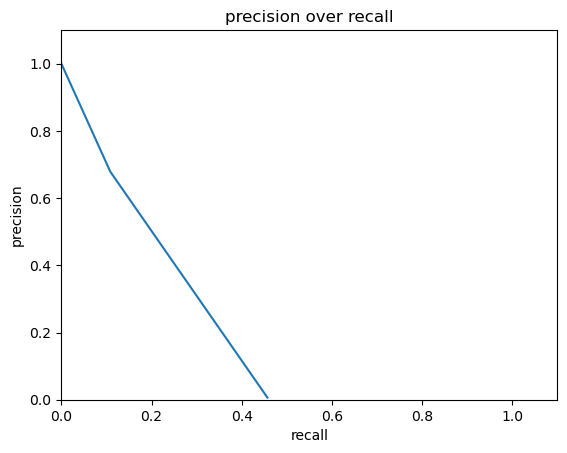

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.22it/s]


average train losses 4.370415793524848
average test losses 4.417791137668142
average precision 0.1624766812028124
test_precision 0.7982469940644148
test_recall 0.08815793260237705
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.29it/s]


average train losses 4.211811118655735
average test losses 4.378176897000044
average precision 0.15467828613337486
test_precision 0.7901678852120184
test_recall 0.08913452802341691
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.33it/s]


average train losses 4.140343930986193
average test losses 4.289717518026673
average precision 0.1586169745037881
test_precision 0.7941260213838971
test_recall 0.08899351677129455
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.11it/s]


average train losses 4.087985542085436
average test losses 4.475195589907829
average precision 0.15291103598137007
test_precision 0.7873045060301395
test_recall 0.09679816068704958
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.14it/s]


average train losses 3.9814453654819064
average test losses 3.96710398122456
average precision 0.0939592399386604
test_precision 0.8074773714636517
test_recall 0.07161716883939107
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.99it/s]


average train losses 4.250598589579265
average test losses 4.2731938430047105
average precision 0.15537681334267026
test_precision 0.7912224491883062
test_recall 0.07937700159922383
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 21.28it/s]


average train losses 3.9120435449812145
average test losses 4.375349145329576
average precision 0.1518236238757891
test_precision 0.7869785923640908
test_recall 0.08097139486028372
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.08it/s]


average train losses 3.720702701144748
average test losses 3.977413982747287
average precision 0.15224319498548666
test_precision 0.7856755836148891
test_recall 0.10273337773337775
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 23.02it/s]


average train losses 3.6628193060557046
average test losses 4.002862280250614
average precision 0.1582769012664157
test_precision 0.7928744048674143
test_recall 0.09519883408772298
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 37.29it/s]


average train losses 3.652760293748644
average test losses 3.722930217740203
average precision 0.09614503221312325
test_precision 0.8032273106060379
test_recall 0.0745649412316079
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.77it/s]


average train losses 3.57434180047777
average test losses 3.827979928747541
average precision 0.15826778552203116
test_precision 0.7909870813788006
test_recall 0.09679065790176902
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.23s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.77it/s]


average train losses 3.482093440161811
average test losses 3.607995465610102
average precision 0.09845095794689583
test_precision 0.8004298301777992
test_recall 0.08260021871132982
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.17s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.61it/s]


average train losses 3.3668569458855524
average test losses 3.590532627880064
average precision 0.10071193068309281
test_precision 0.8020329386803802
test_recall 0.08112258112258112
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 37.20it/s]


average train losses 3.4056935045454235
average test losses 3.703473603623545
average precision 0.15240394884248637
test_precision 0.7845804143522852
test_recall 0.08222970445192668
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.19s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.80it/s]


average train losses 3.3468681971232095
average test losses 3.6236390755047485
average precision 0.16443031259619567
test_precision 0.7971292014620124
test_recall 0.0860865471976583
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.20s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 58.73it/s]


average train losses 3.3120754030015735
average test losses 3.4689081703495774
average precision 0.16994693078744205
test_precision 0.8004903910507318
test_recall 0.0897093647093647
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.13it/s]


average train losses 3.2494561937120228
average test losses 3.4676507731788178
average precision 0.10144997722411402
test_precision 0.8064919903414149
test_recall 0.0784647451314118
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.19s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.75it/s]


average train losses 3.202219910091824
average test losses 3.264723065571907
average precision 0.16135093172321913
test_precision 0.7883093852242435
test_recall 0.08965869521425077
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.26it/s]


average train losses 3.1410937309265137
average test losses 3.4046968656387766
average precision 0.17127085152868474
test_precision 0.8050444853023185
test_recall 0.08159474270585382
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.32it/s]


average train losses 3.0892765522003174
average test losses 3.208258157102471
average precision 0.17510710278504726
test_precision 0.8024412542265504
test_recall 0.08427313427313426
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.30it/s]


average train losses 3.0027018388112388
average test losses 3.2058182611764328
average precision 0.16568081526750278
test_precision 0.7894863669886032
test_recall 0.09789613678502568
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.58it/s]


average train losses 3.0428611437479653
average test losses 3.2512390382609135
average precision 0.16095994848882333
test_precision 0.7891003266292014
test_recall 0.09029499307277085
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.92it/s]


average train losses 2.9706894556681314
average test losses 3.3428876124895535
average precision 0.14388098998999982
test_precision 0.7677910305667071
test_recall 0.08874921374921375
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.25it/s]


average train losses 2.9816165235307484
average test losses 3.2431728109674918
average precision 0.16106282287195833
test_precision 0.7904334522425877
test_recall 0.0884642106864329
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 88.11it/s]


average train losses 2.971729490492079
average test losses 2.958405086117932
average precision 0.17764497578531377
test_precision 0.8099941081344462
test_recall 0.08113655891433669


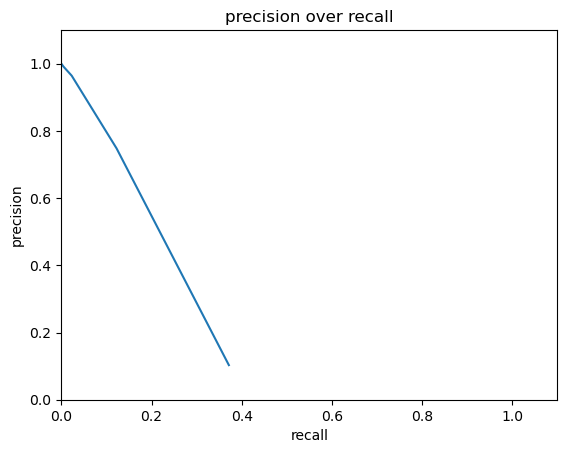

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.43it/s]


average train losses 2.947465101877848
average test losses 3.3308808154869625
average precision 0.15084780799204414
test_precision 0.7741750979860008
test_recall 0.08944337555448667
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.88it/s]


average train losses 2.8624458048078747
average test losses 3.0549776975245897
average precision 0.19572207935776073
test_precision 0.771951450148126
test_recall 0.10747616580949915
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.22it/s]


average train losses 2.85261509153578
average test losses 3.12104595420707
average precision 0.16652489358382314
test_precision 0.7822836003228867
test_recall 0.10579050579050579
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 87.74it/s]


average train losses 2.8178407086266413
average test losses 3.060943422154484
average precision 0.1704907268691667
test_precision 0.7947676844794576
test_recall 0.09054464054464054
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.70it/s]


average train losses 2.7935105164845786
average test losses 3.085563617893773
average precision 0.1532070896211383
test_precision 0.7756494620635108
test_recall 0.09059284337062114
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.70it/s]


average train losses 2.749783330493503
average test losses 3.056353589408418
average precision 0.1698245146767072
test_precision 0.7873130283256011
test_recall 0.09701039701039701
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.02it/s]


average train losses 2.714965475930108
average test losses 2.996361221343364
average precision 0.16658143757079188
test_precision 0.7823112240819047
test_recall 0.10359280637058414
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 101.30it/s]


average train losses 2.9314968056148953
average test losses 2.9182934659159083
average precision 0.19635392936389226
test_precision 0.8091963423140953
test_recall 0.09253853142742031
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.26it/s]


average train losses 2.9120311737060547
average test losses 3.481871117214192
average precision 0.2043589153667148
test_precision 0.7517640820158891
test_recall 0.10502964114075225
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.09it/s]


average train losses 2.7677304214901395
average test losses 3.1160039073042043
average precision 0.15264054544799446
test_precision 0.7646667908075732
test_recall 0.09939751606418273
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.56it/s]


average train losses 2.700454738405016
average test losses 3.2238107091001638
average precision 0.16830826128037465
test_precision 0.7956932219986688
test_recall 0.08785042118375451
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 86.79it/s]


average train losses 2.711921559439765
average test losses 2.9694747473099974
average precision 0.21636570686438986
test_precision 0.7855634843955007
test_recall 0.10658107324773991
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.21it/s]


average train losses 2.634990109337701
average test losses 3.048869039258386
average precision 0.19402883083230976
test_precision 0.7304615339316796
test_recall 0.12043398987843432
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.09it/s]


average train losses 2.60971736907959
average test losses 2.903238659061258
average precision 0.1589659864135505
test_precision 0.7787967729110037
test_recall 0.09076479076479076
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.75it/s]


average train losses 2.575260109371609
average test losses 2.680151800654213
average precision 0.17645854952033863
test_precision 0.7905062206955615
test_recall 0.09860448193781526
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 95.53it/s]


average train losses 2.545240640640259
average test losses 2.828377617730035
average precision 0.16791360710897416
test_precision 0.7880508772462443
test_recall 0.09854240409795964
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 91.16it/s]


average train losses 2.5114093356662326
average test losses 2.9606574568313753
average precision 0.17662522227949065
test_precision 0.7983553440096123
test_recall 0.09236483680928126
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.89it/s]


average train losses 2.493040164311727
average test losses 2.8750130906064286
average precision 0.1766971485873762
test_precision 0.7898459414764636
test_recall 0.10040288929177818
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.83it/s]


average train losses 2.6023956934611
average test losses 2.868429105505984
average precision 0.23758021432071563
test_precision 0.7766892534297547
test_recall 0.10905277849722293
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.47it/s]


average train losses 2.542285998662313
average test losses 2.8750792310448454
average precision 0.16135712828731116
test_precision 0.765351396082629
test_recall 0.10480548258326038
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.56it/s]


average train losses 2.4742520915137396
average test losses 2.831093486557659
average precision 0.24801439190254723
test_precision 0.7444208287130245
test_recall 0.1465590993368771
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.62it/s]


average train losses 2.4254187742869058
average test losses 2.6285511881877213
average precision 0.2058798391655359
test_precision 0.7749900405989696
test_recall 0.11350244405799961
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.05it/s]


average train losses 2.3809217082129583
average test losses 2.8264770828760586
average precision 0.180463707546187
test_precision 0.756545424812948
test_recall 0.10194476305587417
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.52it/s]


average train losses 2.3529067039489746
average test losses 2.773652609936532
average precision 0.21987991656980707
test_precision 0.7573054539953444
test_recall 0.11199088976866756
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 113.93it/s]


average train losses 2.3471831215752497
average test losses 2.58662004025913
average precision 0.19176230291062826
test_precision 0.8220394331877585
test_recall 0.08152392874615097


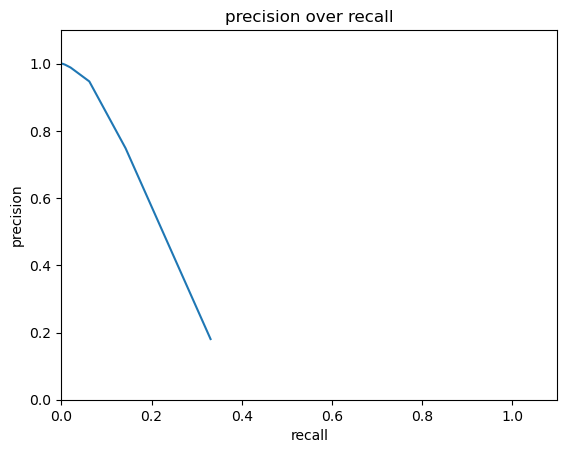

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 100.89it/s]


average train losses 2.3392980098724365
average test losses 2.73760013872402
average precision 0.1716248343194153
test_precision 0.7874781168393645
test_recall 0.09485750874639763
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.84it/s]


average train losses 2.285465266969469
average test losses 2.8257919203521857
average precision 0.22518093028818287
test_precision 0.7731829695085857
test_recall 0.109011359011359
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.69it/s]


average train losses 2.2241375976138644
average test losses 2.6794375760263187
average precision 0.22487354668164483
test_precision 0.7591910809991791
test_recall 0.12159753826420491
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 90.78it/s]


average train losses 2.2146439022488065
average test losses 2.603781397186453
average precision 0.2424916734366789
test_precision 0.7803488779605501
test_recall 0.12205233038566371
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.06it/s]


average train losses 2.1936375300089517
average test losses 2.7833042348551955
average precision 0.18606538817453314
test_precision 0.7470592764411487
test_recall 0.10671889838556506
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 98.91it/s]


average train losses 2.1720094680786133
average test losses 2.5982961292959685
average precision 0.2359790209451986
test_precision 0.770080721713566
test_recall 0.12769771380882491
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.36it/s]


average train losses 2.117950201034546
average test losses 2.6875499094653335
average precision 0.20730228247323204
test_precision 0.7455491347799228
test_recall 0.1252967197411642
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.37it/s]


average train losses 2.13232421875
average test losses 2.8373653834361976
average precision 0.20224111217753651
test_precision 0.7289181388545631
test_recall 0.12301957301957302
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.26it/s]


average train losses 2.0870675245920816
average test losses 2.487961385834251
average precision 0.21884447803283996
test_precision 0.7518670110553729
test_recall 0.12011322011322012
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.86it/s]


average train losses 2.049024714363946
average test losses 2.809403286190794
average precision 0.22341104013593338
test_precision 0.7578796579378845
test_recall 0.1360501638279416
Epoch 86/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.73it/s]


average train losses 2.043692151705424
average test losses 2.694094478914201
average precision 0.20183018501238761
test_precision 0.7287877953033313
test_recall 0.12851377018043686
Epoch 87/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.32it/s]


average train losses 2.0036754740609064
average test losses 2.7597583101006316
average precision 0.2668619156031686
test_precision 0.7199382340874066
test_recall 0.15856715301159746
Epoch 88/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.85it/s]


average train losses 2.0084142684936523
average test losses 2.739289954686776
average precision 0.19331732064933263
test_precision 0.6750349698883492
test_recall 0.14443262498818055
Epoch 89/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 107.61it/s]


average train losses 1.9637983242670696
average test losses 2.4645569034111805
average precision 0.2314755699208342
test_precision 0.7616491000943644
test_recall 0.11902747458303015
Epoch 90/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.40it/s]


average train losses 1.9137900935278997
average test losses 2.6530816276528557
average precision 0.19335798299017692
test_precision 0.7146391709380315
test_recall 0.12538675316453093
Epoch 91/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.62it/s]


average train losses 1.942858099937439
average test losses 2.777181892483323
average precision 0.19466778185772274
test_precision 0.7141316513215921
test_recall 0.13900502789391678
Epoch 92/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.53it/s]


average train losses 1.9036395284864638
average test losses 2.81594424743598
average precision 0.20829908116602025
test_precision 0.7068790036812579
test_recall 0.13925333925333924
Epoch 93/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.24it/s]


average train losses 1.8404088152779474
average test losses 2.7302116235436875
average precision 0.2358907223569725
test_precision 0.7388344534336203
test_recall 0.142102136546581
Epoch 94/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.09it/s]


average train losses 1.8319223192003038
average test losses 2.7724356073939225
average precision 0.2250086164837696
test_precision 0.7214300707556685
test_recall 0.14340649062871283
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 34.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.94it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 152.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 171.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 164.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 163.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.59it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.84it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.36it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 182.07it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.08it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.07it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.15it/s]

Max accuracy: 0.22333723423978177
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:21<00:00, 12.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 52.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 45.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.90it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.90it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 141.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 164.60it/s]

Max accuracy: 0.23463626449364947
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 32.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.63it/s]

Max accuracy: 0.23463626449364947
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 22.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.82it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.20it/s]

Max accuracy: 0.23463626449364947
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:09<00:00,  5.02it/s]


average train losses 60.571506924099396
average test losses 54.37109468465517
average precision 0.09135025448694237
test_precision 0.546557454399174
test_recall 0.10848513626291403
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:07<00:00,  5.19it/s]


average train losses 47.85014512803819
average test losses 38.29702632719295
average precision 0.09136611539620616
test_precision 0.5465867980261491
test_recall 0.09882545438100994
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:05<00:00,  5.38it/s]


average train losses 38.67009014553494
average test losses 28.499561233737868
average precision 0.09177131794029127
test_precision 0.5465983054422396
test_recall 0.13641605308271976
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:04<00:00,  5.46it/s]


average train losses 31.541077507866753
average test losses 23.355034640711597
average precision 0.09233390832335381
test_precision 0.6144535665260495
test_recall 0.1464745131411798
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:57<00:00,  6.10it/s]


average train losses 25.933250427246094
average test losses 21.50090044244402
average precision 0.09243414470751095
test_precision 0.591319883786238
test_recall 0.1507722729944952
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:55<00:00,  6.33it/s]


average train losses 21.083482530381943
average test losses 19.483684001824795
average precision 0.09301034703519613
test_precision 0.5873894454475167
test_recall 0.15744183799739356
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:52<00:00,  6.69it/s]


average train losses 17.740716722276474
average test losses 18.41283375992734
average precision 0.09358806225942332
test_precision 0.5861696776558145
test_recall 0.14866573755462645
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:54<00:00,  6.42it/s]


average train losses 15.515574349297417
average test losses 16.502167334923378
average precision 0.10198203560940279
test_precision 0.612421788520279
test_recall 0.14412233856678303
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.68it/s]


average train losses 13.454036076863607
average test losses 14.429048016540005
average precision 0.10783172673486438
test_precision 0.633301397126083
test_recall 0.1455670872337539
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.64it/s]


average train losses 12.055030716790093
average test losses 12.64125044189627
average precision 0.0929412474060518
test_precision 0.6643905425034797
test_recall 0.12787356676245565
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:42<00:00,  8.27it/s]


average train losses 11.031647894117567
average test losses 11.783776576702412
average precision 0.09352924715228954
test_precision 0.6826526500326973
test_recall 0.1297409380742714
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:41<00:00,  8.49it/s]


average train losses 9.972834693060982
average test losses 10.672496943731932
average precision 0.09391941124237485
test_precision 0.6941518634536201
test_recall 0.12494655550211108
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.00it/s]


average train losses 9.087863074408638
average test losses 9.28853847226526
average precision 0.09756601182443819
test_precision 0.7162014621873681
test_recall 0.11466599244377022
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.20it/s]


average train losses 8.608627319335938
average test losses 8.85416496988715
average precision 0.1034162959592999
test_precision 0.7228179592005769
test_recall 0.11498254831588164
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:36<00:00,  9.53it/s]


average train losses 8.08955685297648
average test losses 8.333306944268381
average precision 0.10171483301517799
test_precision 0.7265985476217842
test_recall 0.10940530662752886
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:36<00:00,  9.53it/s]


average train losses 7.640542772081163
average test losses 8.234039951933076
average precision 0.10550546369789181
test_precision 0.7303410872138546
test_recall 0.11345115789560233
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.84it/s]


average train losses 7.182105806138781
average test losses 7.131519412722683
average precision 0.11020579398186245
test_precision 0.7450424240988948
test_recall 0.10592843370621148
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.07it/s]


average train losses 6.663984245724148
average test losses 6.845738784540073
average precision 0.12127883980946033
test_precision 0.7549170241513398
test_recall 0.10478307700529922
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.33it/s]


average train losses 6.327643712361653
average test losses 6.4645019582873395
average precision 0.09252844848464276
test_precision 0.7783251771938114
test_recall 0.09622239900017678
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.46it/s]


average train losses 6.1912204424540205
average test losses 6.600808365052922
average precision 0.1389455636295579
test_precision 0.7690290062898731
test_recall 0.10045551156662268
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.73it/s]


average train losses 5.923628807067871
average test losses 5.869428477056346
average precision 0.09307758991454879
test_precision 0.7918680277373142
test_recall 0.10136386247497359
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.22it/s]


average train losses 5.716171211666531
average test losses 5.635505270074915
average precision 0.09238777026749147
test_precision 0.7938236058403895
test_recall 0.08789893234337677
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.87it/s]


average train losses 5.498852729797363
average test losses 5.415465653112471
average precision 0.09260395708620756
test_precision 0.797036447964442
test_recall 0.09024432357765691
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.25it/s]


average train losses 5.376489162445068
average test losses 5.294877931263372
average precision 0.0925706910275926
test_precision 0.796807971036422
test_recall 0.09007042340375673
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.14it/s]

average train losses 5.176936096615261
average test losses 5.251556393767354
average precision 0.09286618905001003
test_precision 0.8104848863545745
test_recall 0.08888539444094999


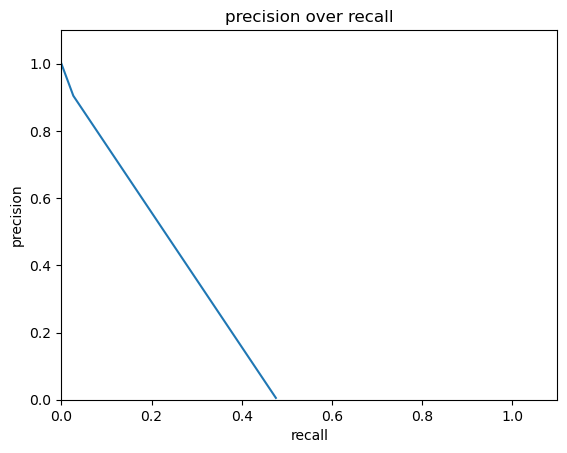

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:29<00:00, 11.68it/s]


average train losses 5.032842795054118
average test losses 5.1017953649884955
average precision 0.09263620092500556
test_precision 0.8011262552706576
test_recall 0.09231735342846455
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 13.05it/s]


average train losses 4.71706501642863
average test losses 4.805326474018586
average precision 0.09362317689633493
test_precision 0.8112427612186912
test_recall 0.09512164789942568
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.70it/s]


average train losses 4.638797760009766
average test losses 4.6725986031045945
average precision 0.09324747312172507
test_precision 0.8086456652494579
test_recall 0.08436470936470936
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.46it/s]


average train losses 4.457096576690674
average test losses 4.65617498645076
average precision 0.09326238280446066
test_precision 0.8075307856351579
test_recall 0.08460469571580682
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.95it/s]


average train losses 4.4096413188510475
average test losses 4.373565806282891
average precision 0.09497921593892072
test_precision 0.8135938619777439
test_recall 0.09461628906073351
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.91it/s]


average train losses 4.362015141381158
average test losses 4.4430981782766485
average precision 0.09378843444425113
test_precision 0.8147424184036601
test_recall 0.088661030327697
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.68it/s]


average train losses 4.206957499186198
average test losses 4.440653867531366
average precision 0.09512269380335425
test_precision 0.8145431305501275
test_recall 0.09218250884917552
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.46it/s]


average train losses 4.2184632619222
average test losses 4.289954084276814
average precision 0.09443981555951132
test_precision 0.8137095909361055
test_recall 0.09304306804306804
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.78it/s]


average train losses 4.0251907242669
average test losses 4.186270179232301
average precision 0.0962716790002084
test_precision 0.8146072643653427
test_recall 0.0997021497021497
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.57it/s]


average train losses 4.004715628094143
average test losses 4.022341556358881
average precision 0.09692983918465786
test_precision 0.8123646001586763
test_recall 0.09161414716970272
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.15it/s]


average train losses 3.9160392814212375
average test losses 4.058464014292443
average precision 0.09626140864406006
test_precision 0.8133469695382953
test_recall 0.09345027400582955
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.49it/s]


average train losses 3.8570629490746393
average test losses 4.079043196137475
average precision 0.09786720621377575
test_precision 0.8094261969328149
test_recall 0.0850637017303684
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.65it/s]


average train losses 3.792772160636054
average test losses 3.9644364121972324
average precision 0.09680370118669669
test_precision 0.812064114255612
test_recall 0.08593813593813593
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.73it/s]


average train losses 3.725762049357096
average test losses 3.8692445802552746
average precision 0.09924493075301069
test_precision 0.8096155587029321
test_recall 0.0847160041604486
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.46it/s]


average train losses 3.639914459652371
average test losses 3.988432159450998
average precision 0.10003305229316584
test_precision 0.8088527516494751
test_recall 0.0900895400895401
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.63it/s]


average train losses 3.580512947506375
average test losses 3.595144083017637
average precision 0.10294853410744363
test_precision 0.8148343637471519
test_recall 0.09074361852139631
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.96it/s]


average train losses 3.5622428523169622
average test losses 3.7299931660676613
average precision 0.10458800893933679
test_precision 0.8136123157879797
test_recall 0.08772544328099884
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.37it/s]


average train losses 3.5700074566735163
average test losses 3.5108956886492564
average precision 0.10759047183563908
test_precision 0.8203496691389194
test_recall 0.0885247468580802
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.51it/s]


average train losses 3.489713748296102
average test losses 3.654278017516829
average precision 0.10797392223699505
test_precision 0.8036414312275131
test_recall 0.08918869196646974
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.51it/s]


average train losses 3.5094944106207953
average test losses 3.7454146306399267
average precision 0.10767726141578442
test_precision 0.8123208891901508
test_recall 0.08598068598068596
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.48it/s]


average train losses 3.4126705063713922
average test losses 3.732464563472998
average precision 0.11518962059439074
test_precision 0.8072813094432175
test_recall 0.10369784536451203
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.73it/s]


average train losses 3.3585568269093833
average test losses 3.4495470727610793
average precision 0.11307342097611382
test_precision 0.8225947265460729
test_recall 0.08559773559773559
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.67it/s]


average train losses 3.350236415863037
average test losses 3.6319331416377314
average precision 0.18172447460383975
test_precision 0.8101051386913821
test_recall 0.09110817166372721
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.95it/s]


average train losses 3.292080905702379
average test losses 3.4903595705657264
average precision 0.11667210504987571
test_precision 0.8179579121467975
test_recall 0.08077478077478077
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.84it/s]


average train losses 3.2544215785132513
average test losses 3.4309951769999967
average precision 0.11194091223477645
test_precision 0.8167547335683324
test_recall 0.0895596173373951


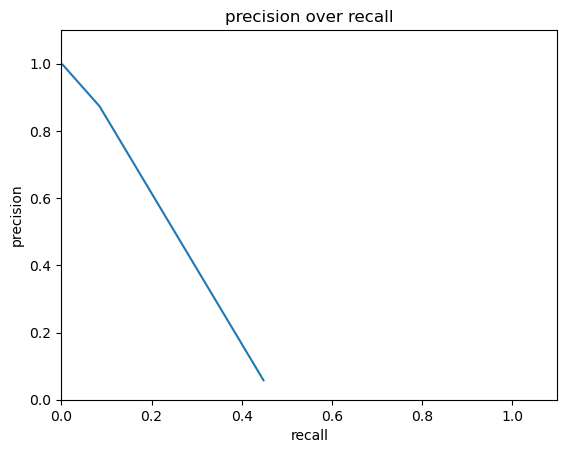

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.06it/s]


average train losses 3.204888105392456
average test losses 3.2507626643547645
average precision 0.1825395716564979
test_precision 0.811594915450644
test_recall 0.0867293200626534
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.35it/s]


average train losses 3.1363154782189264
average test losses 3.409388423984886
average precision 0.16852353259746236
test_precision 0.7984963106567082
test_recall 0.09133428300094966
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.66it/s]


average train losses 3.1642274856567383
average test losses 3.203416499996457
average precision 0.11767705217051617
test_precision 0.8089291761759083
test_recall 0.08878744712078046
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.23it/s]


average train losses 3.1100997924804688
average test losses 3.2253510062171524
average precision 0.11359332761808022
test_precision 0.8168451761950113
test_recall 0.07930248763582096
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.29it/s]


average train losses 3.0849524868859186
average test losses 3.190265012602521
average precision 0.1811891448366282
test_precision 0.809086670962771
test_recall 0.09349786016452684
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.44it/s]


average train losses 3.044020175933838
average test losses 3.120221840010749
average precision 0.185497978458641
test_precision 0.80903684045506
test_recall 0.09183398905621128
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.40it/s]


average train losses 3.050120883517795
average test losses 3.3458851667550893
average precision 0.17657897303740708
test_precision 0.8023929407726376
test_recall 0.090117084561529
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.73it/s]


average train losses 3.008577240837945
average test losses 3.1967427064890197
average precision 0.17825999150884367
test_precision 0.802988767376891
test_recall 0.09084434084434084
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.72it/s]


average train losses 2.959478643205431
average test losses 3.134231501495057
average precision 0.21913179259286217
test_precision 0.7938105089382451
test_recall 0.10976276809610143
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 100.95it/s]


average train losses 3.0346559948391385
average test losses 3.07486697853121
average precision 0.2016354520646308
test_precision 0.8365314202939323
test_recall 0.07736471347582458
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.59it/s]


average train losses 3.004784213172065
average test losses 3.230054824440568
average precision 0.18003314213929564
test_precision 0.8047927938820815
test_recall 0.08537748259970483
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.38it/s]


average train losses 2.9606083234151206
average test losses 3.084484984392454
average precision 0.17792406336336486
test_precision 0.8115681970074986
test_recall 0.0824210768655213
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.62it/s]


average train losses 2.905649926927355
average test losses 3.0018183611057423
average precision 0.18473164554260546
test_precision 0.8063913580431091
test_recall 0.09585465974354863
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.51it/s]


average train losses 2.8674895233578153
average test losses 3.098146254180843
average precision 0.17752578535779803
test_precision 0.7991967349736324
test_recall 0.09134065522954411
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.13it/s]


average train losses 2.8349354532029896
average test losses 3.0190461266074764
average precision 0.17155364808937357
test_precision 0.8037516969540891
test_recall 0.0900190344634789
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.86it/s]


average train losses 2.7917476760016546
average test losses 3.1081031526935066
average precision 0.17525932772958977
test_precision 0.793085733621464
test_recall 0.0944220388664833
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 87.19it/s]


average train losses 2.7987045447031655
average test losses 2.8888151124332024
average precision 0.1796207841812921
test_precision 0.7992397133911631
test_recall 0.09385768552435218
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.83it/s]


average train losses 2.8088372548421225
average test losses 2.930216551676095
average precision 0.18300061653692842
test_precision 0.8041293588943075
test_recall 0.09887375998487109
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 96.38it/s]


average train losses 2.906889941957262
average test losses 2.957595954933058
average precision 0.18343923702859577
test_precision 0.8106515309075563
test_recall 0.08827191327191328
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.00it/s]


average train losses 2.7974935902489557
average test losses 3.099855818979421
average precision 0.2302030402583183
test_precision 0.7980254441918333
test_recall 0.11014684903573793
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.59it/s]


average train losses 2.8029640515645347
average test losses 2.9717135711273235
average precision 0.2126551947396413
test_precision 0.7811557271290626
test_recall 0.11106722495611385
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.61it/s]


average train losses 2.7100826104482016
average test losses 2.985740567544247
average precision 0.23760906915541746
test_precision 0.7775382757512908
test_recall 0.11318249651582986
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.73it/s]


average train losses 2.679743660820855
average test losses 2.989910485398056
average precision 0.18221909718867593
test_precision 0.7960568439995261
test_recall 0.10276852776852777
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.67it/s]


average train losses 2.6370544963412814
average test losses 3.007687944971938
average precision 0.24168556907304045
test_precision 0.78463644535725
test_recall 0.11250662917329583
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.05it/s]


average train losses 2.6236712667677136
average test losses 2.9245492097658987
average precision 0.23399092527107684
test_precision 0.7724092970227818
test_recall 0.11992308103419215


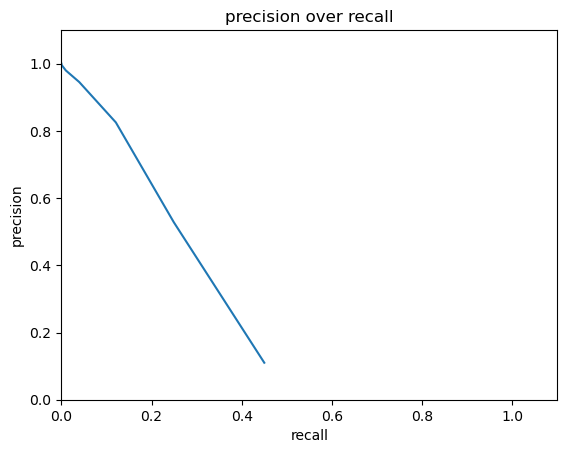

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 92.44it/s]


average train losses 2.5898469024234347
average test losses 2.886256081086618
average precision 0.21734451755540424
test_precision 0.7832489834598702
test_recall 0.10478348811682145
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 90.13it/s]


average train losses 2.594493309656779
average test losses 2.9122351520081873
average precision 0.17732305895506734
test_precision 0.7912269289816012
test_recall 0.10236214402881069
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.31it/s]


average train losses 2.6079090966118708
average test losses 2.8251621726571323
average precision 0.2264184229414582
test_precision 0.7947054856729653
test_recall 0.10947971781305116
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.78it/s]


average train losses 2.570297876993815
average test losses 2.7462474922848563
average precision 0.23412803186683895
test_precision 0.7724600701988772
test_recall 0.12233353066686399
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.18it/s]


average train losses 2.512426084942288
average test losses 2.8799589989531755
average precision 0.21813271912953533
test_precision 0.7990395889120091
test_recall 0.10134361523250411
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 91.58it/s]


average train losses 2.5104903644985623
average test losses 2.695948863301182
average precision 0.23142230362456565
test_precision 0.7938012826702113
test_recall 0.10679382346049011
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 92.63it/s]


average train losses 2.494061655468411
average test losses 2.73409419657498
average precision 0.1893944623553745
test_precision 0.797730499148885
test_recall 0.10633872300538966
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.32it/s]


average train losses 2.4940305285983615
average test losses 2.867737651041091
average precision 0.22148884219654075
test_precision 0.7572913113323432
test_recall 0.13376685043351708
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.59it/s]


average train losses 2.446758058336046
average test losses 2.932270869060799
average precision 0.21896806944268182
test_precision 0.7557029395108853
test_recall 0.12840184506851174
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 92.58it/s]


average train losses 2.4255777994791665
average test losses 2.6827774861259677
average precision 0.24617055438537064
test_precision 0.786574594789411
test_recall 0.11269985158874048
Epoch 86/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.53it/s]


average train losses 2.3925376998053656
average test losses 2.8543249687917553
average precision 0.23090243935202606
test_precision 0.7682416433578967
test_recall 0.1403794764905876
Epoch 87/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.36it/s]


average train losses 2.383108483420478
average test losses 2.831884284474571
average precision 0.2353962522980594
test_precision 0.7738146240497644
test_recall 0.12637938193493747
Epoch 88/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.18it/s]


average train losses 2.3416090276506214
average test losses 2.8500182876559745
average precision 0.23508764414957203
test_precision 0.772059931121859
test_recall 0.12769904992127212
Epoch 89/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 100.57it/s]


average train losses 2.2825454341040716
average test losses 2.6924784884833204
average precision 0.23993892641668513
test_precision 0.7942416783083067
test_recall 0.10765345765345764
Epoch 90/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.29it/s]


average train losses 2.296526167127821
average test losses 2.743349807045059
average precision 0.2306555880945994
test_precision 0.7653184560908006
test_recall 0.14228970617859504
Epoch 91/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.60it/s]


average train losses 2.2701690991719565
average test losses 2.5864765564261
average precision 0.23056494825947074
test_precision 0.7693718203996761
test_recall 0.12378208211541544
Epoch 92/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 88.29it/s]


average train losses 2.2658318943447537
average test losses 2.8572969295700053
average precision 0.21984168760245792
test_precision 0.7858793536401241
test_recall 0.10993368771146549
Epoch 93/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.48it/s]


average train losses 2.220784823099772
average test losses 2.9118091934426897
average precision 0.2719166362093
test_precision 0.726361762231472
test_recall 0.15415489859934306
Epoch 94/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.51it/s]


average train losses 2.1990970505608454
average test losses 2.6489159116717826
average precision 0.2102057953060923
test_precision 0.7525775540912794
test_recall 0.11272914328469884
Epoch 95/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.12it/s]


average train losses 2.1418881681230335
average test losses 2.714188561140642
average precision 0.2253841152915611
test_precision 0.7294953697997718
test_recall 0.14373445484556596
Epoch 96/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.21it/s]


average train losses 2.1301068464914956
average test losses 2.6275007084563926
average precision 0.22530188056249048
test_precision 0.7612606748546181
test_recall 0.13899166676944452
Epoch 97/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 94.89it/s]


average train losses 2.1106651888953314
average test losses 2.581343887538312
average precision 0.2341224648263241
test_precision 0.7702530009568602
test_recall 0.12628780684336238
Epoch 98/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.25it/s]


average train losses 2.0880027876959906
average test losses 2.7470865962851763
average precision 0.22174384785784743
test_precision 0.7025994863251545
test_recall 0.14534179811957587
Epoch 99/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 107.15it/s]


average train losses 2.037678877512614
average test losses 2.5606834339959668
average precision 0.2616575096833143
test_precision 0.8018025498283544
test_recall 0.12127810461143793
Epoch 100/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 96.45it/s]


average train losses 2.0814990997314453
average test losses 2.7478338716036914
average precision 0.23748924929713153
test_precision 0.7694973646385802
test_recall 0.12644115144115145


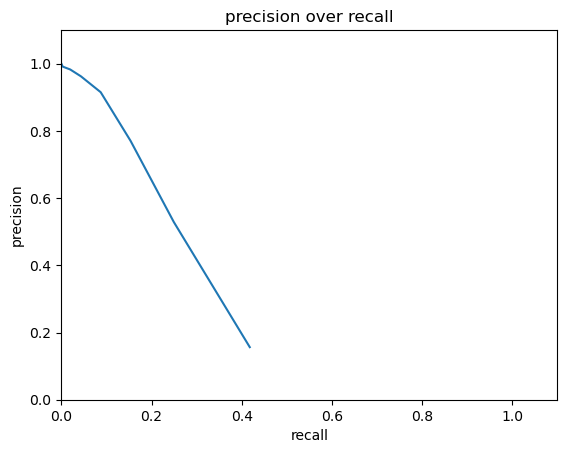

Epoch 101/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.44it/s]


average train losses 2.008997533056471
average test losses 2.9371363508735286
average precision 0.18038537362985615
test_precision 0.6970952070063562
test_recall 0.13042718598274153
Epoch 102/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.60it/s]


average train losses 1.9801476399103801
average test losses 2.689770999287608
average precision 0.21650598570255195
test_precision 0.7484493509792506
test_recall 0.1259206842540176
Epoch 103/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 87.37it/s]


average train losses 1.9664811690648396
average test losses 2.8053474881370524
average precision 0.23074926455215913
test_precision 0.7465698637060916
test_recall 0.14252609530387308
Epoch 104/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.93it/s]


average train losses 1.9108039670520358
average test losses 2.6480549003323937
average precision 0.2137662187526911
test_precision 0.7459254175785566
test_recall 0.12198675809786921
Epoch 105/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.32it/s]


average train losses 1.957137147585551
average test losses 2.961781740528226
average precision 0.250358361998681
test_precision 0.6346140240321207
test_recall 0.1900680595125039
Epoch 106/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.66it/s]


average train losses 1.918086118168301
average test losses 2.6641278947860085
average precision 0.22349587851799563
test_precision 0.7694387544829887
test_recall 0.11354263020929688
Epoch 107/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.82it/s]


average train losses 1.8510438866085477
average test losses 2.725569871755747
average precision 0.2369247339055504
test_precision 0.7202830987144286
test_recall 0.15414379858824306
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 137.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 13.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:03<00:00,  8.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:03<00:00,  8.08it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.12it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.79it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.21it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.36it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.53it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 177.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 173.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 164.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 165.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.08it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.92it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 192.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 192.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.89it/s]

Max accuracy: 0.2785501392632193
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:41<00:00,  9.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:02<00:00,  8.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 148.79it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.99it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.18it/s]

Max accuracy: 0.28657442468074046
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 13.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.22it/s]

Max accuracy: 0.2876140992773574
With filter threshold: tensor(0.0500)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.78it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 15.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.37it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.30it/s]

Max accuracy: 0.2876140992773574
With filter threshold: tensor(0.0500)
With NMS threshold: tensor(0.5000)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:27<00:00,  4.02it/s]


average train losses 76.84716712103949
average test losses 67.3722799360922
average precision 0.09140627839689158
test_precision 0.5466975141740472
test_recall 0.12975193530749085
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:15<00:00,  4.63it/s]


average train losses 60.555208418104385
average test losses 45.08433941354779
average precision 0.09159859576653963
test_precision 0.5464090666350535
test_recall 0.11500567333900669
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


 29%|████████████████████████████▎                                                                    | 102/350 [00:21<00:52,  4.74it/s]


KeyboardInterrupt: 

In [3]:
layers = []
anchors = [((0.84,1.67),(4.56,6.60)),
           ((1.17,2.28),(4.33,6.98),(9.80,9.04)),
           ((0.60,1.21),(1.86,3.65),(3.96,6.65),(8.19,8.89)),
           ((0.54,1.07),(1.50,2.86),(2.75,5.47),(4.86,7.34),(8.93,9.06)),
           ((0.47,0.92),(1.16,2.37),(2.40,4.25),(3.50,6.90),(5.85,7.76),(9.74,9.25)),
           ((0.45,0.87),(1.03,2.19),(2.20,3.64),(2.69,6.34),(4.48,6.88),(6.69,8.52),(10.39,9.18)),
           ((0.44,0.85),(0.97,2.09),(2.01,3.40),(2.54,5.88),(3.90,8.08),(5.00,5.25),(6.51,8.68),(10.31,9.23)),
           ((0.41,0.77),(0.84,1.82),(1.78,2.84),(1.96,5.22),(3.24,7.31),(3.87,4.57),(5.15,8.36),(7.46,6.76),(9.74,9.84)),
           ((0.40,0.75),(0.83,1.72),(1.48,3.05),(2.08,5.64),(2.96,3.36),(3.65,8.32),(3.94,5.51),(6.14,6.74),(6.70,10.18),(10.61,8.92))
          ]


max_accs = torch.zeros(len(anchors))
max_nms = torch.zeros_like(max_accs)
max_filter = torch.zeros_like(max_accs)

for i in range(len(anchors)):
    #sd = torch.load("models/configs/voc_pretrained.pt")
    sd = longtrain(TinyYoloV2, device=device, frozen_layers=layers, lr=0.00003, weight_decay=0.0001, train_batch_size=256, epochs=300, anchors=anchors[i])
    max_accs[i], max_nms[i], max_filter[i] = identify_threshold(TinyYoloV2, sd, device=device, anchors=anchors[i])

index = torch.argmax(max_accs)
print('Max accuracy:', torch.max(max_accs))
print('With filter threshold:', max_filter[index])
print('With NMS threshold:', max_nms[index])
print('With anchor_count:', index + 1)

plot([(list(range(len(max_accs))), max_accs, 'acc')],
      xlabel='anchors', save_path='anchors.png')


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:07<00:00,  5.21it/s]


average train losses 71.82300567626953
average test losses 69.84677002300904
average precision 0.09198427812753197
test_precision 0.2645004062121225
test_recall 0.15696042640487085
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:57<00:00,  6.05it/s]


average train losses 65.20318010118272
average test losses 62.282669393425316
average precision 0.09191161956624089
test_precision 0.287233728632031
test_recall 0.16299174076951856
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:58<00:00,  5.94it/s]


average train losses 59.28379991319444
average test losses 56.50820905462629
average precision 0.09160694331255816
test_precision 0.3053522076694399
test_recall 0.13935344490900048
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:59<00:00,  5.86it/s]


average train losses 54.00312042236328
average test losses 51.5670037228837
average precision 0.09203808692788967
test_precision 0.32539222326046835
test_recall 0.14012890401779288
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:51<00:00,  6.84it/s]


average train losses 49.20545917087131
average test losses 46.90045272522842
average precision 0.09226161192715984
test_precision 0.3371588178595692
test_recall 0.16678013344680012
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:47<00:00,  7.35it/s]


average train losses 40.42711978488498
average test losses 37.49373917973619
average precision 0.09196900863151351
test_precision 0.36176478708607374
test_recall 0.1443016859683526
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:47<00:00,  7.30it/s]


average train losses 36.16099378797743
average test losses 34.30355595863103
average precision 0.09209161614077564
test_precision 0.3772453642853194
test_recall 0.13718113162557607
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.64it/s]


average train losses 32.82828330993652
average test losses 31.176841958635553
average precision 0.09210365376477601
test_precision 0.38817215711619807
test_recall 0.13577286910620243
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.16it/s]


average train losses 29.930617650349934
average test losses 28.17301752356722
average precision 0.0957416244129747
test_precision 0.40490911320227285
test_recall 0.1396595174372952
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:43<00:00,  8.14it/s]


average train losses 27.32939190334744
average test losses 26.004992330176197
average precision 0.09253728481958795
test_precision 0.4251201587767315
test_recall 0.1508309591642925
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.77it/s]


average train losses 25.05618667602539
average test losses 23.79200840539742
average precision 0.0929085305519378
test_precision 0.4405796743603711
test_recall 0.13511046566602122
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.13it/s]


average train losses 22.990411122639973
average test losses 22.080692234202328
average precision 0.09302515548375387
test_precision 0.44302228320804965
test_recall 0.1423595951373729
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.96it/s]


average train losses 21.193645265367294
average test losses 20.526580432880976
average precision 0.09345750414145206
test_precision 0.4587033565252441
test_recall 0.13395452284341172
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.97it/s]


average train losses 19.57863638136122
average test losses 19.104966644547943
average precision 0.09535484712647756
test_precision 0.47376243395148604
test_recall 0.14551251217917885
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.27it/s]


average train losses 18.196161058213974
average test losses 17.51870362643163
average precision 0.09697887617580501
test_precision 0.48216922986620875
test_recall 0.13167254556143446
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.77it/s]


average train losses 16.898519304063583
average test losses 16.307063059249835
average precision 0.09979149665820608
test_precision 0.4960639401302181
test_recall 0.13790787401898513
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 10.96it/s]


average train losses 15.76559321085612
average test losses 15.120307525678237
average precision 0.10632737807799905
test_precision 0.5098071303526304
test_recall 0.14287194287194285
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.61it/s]


average train losses 14.74120659298367
average test losses 14.415854070940588
average precision 0.09347950878792038
test_precision 0.5146299051346842
test_recall 0.12641216807883474
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.90it/s]


average train losses 13.862189610799154
average test losses 13.781215140622566
average precision 0.09417436136843134
test_precision 0.5243326156949251
test_recall 0.13313414980081648
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.20it/s]


average train losses 13.046667204962837
average test losses 12.964180095922574
average precision 0.09588342632930368
test_precision 0.5307699985824194
test_recall 0.14008861508861506
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.20it/s]


average train losses 12.336983680725098
average test losses 12.08004048475173
average precision 0.09532609707704222
test_precision 0.5412160071293088
test_recall 0.13757888202332644
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.23it/s]


average train losses 11.629150602552626
average test losses 11.372345800752994
average precision 0.09553382416855825
test_precision 0.5505164158863438
test_recall 0.12903423736757072
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.40it/s]


average train losses 11.058747927347818
average test losses 10.800024490410786
average precision 0.09674412908905494
test_precision 0.5579584820022836
test_recall 0.13426881760215092
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.72it/s]


average train losses 10.518950674268934
average test losses 10.283823382820499
average precision 0.09620808371317233
test_precision 0.5618180159099264
test_recall 0.13416953416953417
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.69it/s]

average train losses 10.034967634412977
average test losses 9.726506049816425
average precision 0.09918539104797194
test_precision 0.5805175679788472
test_recall 0.12790162512384734


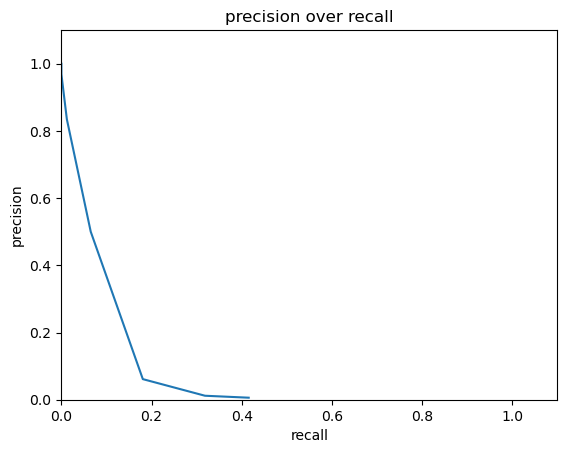

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.10it/s]


average train losses 9.57218106587728
average test losses 9.517165962447468
average precision 0.1007434915885394
test_precision 0.5802233292337703
test_recall 0.12241308074641406
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.86it/s]


average train losses 9.136845694647896
average test losses 9.020800163942864
average precision 0.10424444372222735
test_precision 0.5843570109932883
test_recall 0.1299697216363883
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.29it/s]


average train losses 8.76871787177192
average test losses 8.492908316120463
average precision 0.10476494680954634
test_precision 0.5976327406353078
test_recall 0.1208558930781153
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.43it/s]


average train losses 8.404820760091146
average test losses 8.138319856420882
average precision 0.1086799938344135
test_precision 0.6048983528732854
test_recall 0.11761212038989817
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.39it/s]


average train losses 8.083066781361898
average test losses 8.004534696921324
average precision 0.10838535436951711
test_precision 0.5965905741403935
test_recall 0.11950261672483894
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.42it/s]


average train losses 7.79050710466173
average test losses 7.605543415091316
average precision 0.11428913827428921
test_precision 0.6090486622786473
test_recall 0.1364194447527781
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.11it/s]


average train losses 7.523482163747151
average test losses 7.436192420133498
average precision 0.11459786728606688
test_precision 0.6131552862980314
test_recall 0.12386697664475442
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.71it/s]


average train losses 7.2602734035915795
average test losses 7.13166554225476
average precision 0.1166899478732255
test_precision 0.6216428139372027
test_recall 0.12152713541602432
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.41it/s]


average train losses 7.029132843017578
average test losses 6.866915022885358
average precision 0.11892255661823382
test_precision 0.6291263445997995
test_recall 0.1128717989829101
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.23it/s]


average train losses 6.831109682718913
average test losses 7.080318088205452
average precision 0.1218709604409245
test_precision 0.633442516456925
test_recall 0.1267645934312601
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.61it/s]


average train losses 6.589359760284424
average test losses 6.787024582892741
average precision 0.1211886982711997
test_precision 0.6288560309385324
test_recall 0.12456884679106901
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.75it/s]


average train losses 6.378049002753364
average test losses 6.266326553121931
average precision 0.1264736019580061
test_precision 0.6375663158284978
test_recall 0.11144411144411144
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.36it/s]


average train losses 6.223918331993951
average test losses 6.11429735330435
average precision 0.13348182860381044
test_precision 0.6518992136878622
test_recall 0.11466825355714244
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.27it/s]


average train losses 6.059260580274794
average test losses 6.065008684440896
average precision 0.09889398315672877
test_precision 0.6441789758088026
test_recall 0.11289574622907957
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.78it/s]


average train losses 5.891954739888509
average test losses 5.939129425249888
average precision 0.1324070185448845
test_precision 0.6502996197708191
test_recall 0.1159589381811604
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.40it/s]


average train losses 5.7485593689812555
average test losses 5.802942233887154
average precision 0.13453834852575863
test_precision 0.6544644101184869
test_recall 0.12298545076322855
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.84it/s]


average train losses 5.612322277492947
average test losses 5.7173996834333805
average precision 0.10111580297786098
test_precision 0.655239573759857
test_recall 0.10604395604395604
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.91it/s]


average train losses 5.493372069464789
average test losses 5.467136232261984
average precision 0.10353297127242324
test_precision 0.6595792303135913
test_recall 0.108446286224064
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.44it/s]


average train losses 5.38905472225613
average test losses 5.318522498138949
average precision 0.10437595239634638
test_precision 0.6646868286542337
test_recall 0.10322825322825323
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.52it/s]


average train losses 5.220569610595703
average test losses 5.292489176801807
average precision 0.103828585719632
test_precision 0.6695563987081853
test_recall 0.11342001619779397
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 21.83it/s]


average train losses 5.126063558790419
average test losses 5.083217788625647
average precision 0.10848865211638038
test_precision 0.6747905234242845
test_recall 0.10482100204322427
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 23.04it/s]


average train losses 5.00912422604031
average test losses 4.908629004432266
average precision 0.10927349390190266
test_precision 0.6757438548569572
test_recall 0.12090008756675424
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.90it/s]


average train losses 4.929000377655029
average test losses 4.961817561391412
average precision 0.11127282048360408
test_precision 0.6751322702422393
test_recall 0.10812716090493868
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 23.42it/s]


average train losses 4.827415254380968
average test losses 4.754035858007578
average precision 0.10345900716182
test_precision 0.6771955680195929
test_recall 0.09674471618916064
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.75it/s]

average train losses 4.732232305738661
average test losses 4.589242558194022
average precision 0.11382763207605727
test_precision 0.6828218791696931
test_recall 0.1070685487352154


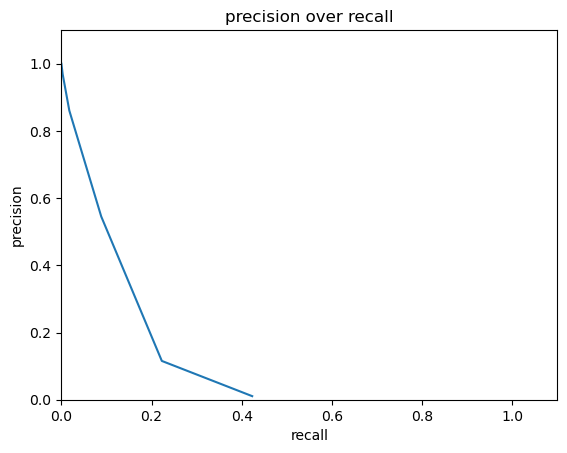

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.05it/s]


average train losses 4.6625279320610895
average test losses 4.499600072871586
average precision 0.11989089925248493
test_precision 0.689550323574379
test_recall 0.10880518658296436
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.92it/s]


average train losses 4.558878633711073
average test losses 4.622511278530132
average precision 0.12055997109418094
test_precision 0.6896784265818774
test_recall 0.10859716415271971
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 26.64it/s]


average train losses 4.495116127861871
average test losses 4.552871280585938
average precision 0.12058826036765911
test_precision 0.691632108000717
test_recall 0.11105232216343328
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.09it/s]


average train losses 4.416861375172933
average test losses 4.66793704168749
average precision 0.10959184222362282
test_precision 0.6916746801710086
test_recall 0.10400124566791233
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.86it/s]


average train losses 4.367611726125081
average test losses 4.5495939614766
average precision 0.130121347809688
test_precision 0.6928748801578153
test_recall 0.1137140637140637
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.93it/s]


average train losses 4.278653515709771
average test losses 4.3042223670883395
average precision 0.1342582778453729
test_precision 0.712095134123611
test_recall 0.11353317464428575
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 30.50it/s]


average train losses 4.216860453287761
average test losses 4.056201726283104
average precision 0.11351012169615257
test_precision 0.7102398659634787
test_recall 0.09835185390740946
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.09it/s]


average train losses 4.169632434844971
average test losses 4.289564912475412
average precision 0.12925066950092232
test_precision 0.7047747990187618
test_recall 0.0984076622965512
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 30.64it/s]


average train losses 4.11113977432251
average test losses 4.104017437013805
average precision 0.11325213240853019
test_precision 0.7091364431463371
test_recall 0.10335086723975613
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.81it/s]


average train losses 4.042823553085327
average test losses 4.01222347194313
average precision 0.14083518111881022
test_precision 0.7134370966395994
test_recall 0.10289926123259457
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.32it/s]


average train losses 3.967401795917087
average test losses 3.9958157372950147
average precision 0.1189025244670649
test_precision 0.7152120791099529
test_recall 0.09393682449238004
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 32.67it/s]


average train losses 3.9450625578562417
average test losses 3.8879295995092797
average precision 0.12217357110601737
test_precision 0.7229082219092763
test_recall 0.1001091501091501
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 30.39it/s]


average train losses 3.8979922930399575
average test losses 4.070847030039187
average precision 0.12017022939525578
test_precision 0.7197379659667166
test_recall 0.10465964077075188
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.77it/s]


average train losses 3.84112819035848
average test losses 3.973396163720351
average precision 0.12176272255047528
test_precision 0.7204560365759534
test_recall 0.10688848188848188
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 34.17it/s]


average train losses 3.8131586180792914
average test losses 3.8489411512331406
average precision 0.12123197489256014
test_precision 0.726798322125574
test_recall 0.0931984681984682
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 35.23it/s]


average train losses 3.7513166003757052
average test losses 3.782079917752845
average precision 0.12325500520317491
test_precision 0.7276605045100335
test_recall 0.09315581537803759
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.58it/s]


average train losses 3.6996446715460882
average test losses 3.657171926607094
average precision 0.12495355567401321
test_precision 0.7282699000457432
test_recall 0.09752480030257808
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.69it/s]


average train losses 3.678798622555203
average test losses 3.688020415795155
average precision 0.12673301992015304
test_precision 0.7315748202213666
test_recall 0.09538229260451482
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 39.57it/s]


average train losses 3.642528692881266
average test losses 3.610810117504196
average precision 0.12725691452284518
test_precision 0.7281596076707962
test_recall 0.0989718100829212
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.77it/s]


average train losses 3.6147850354512534
average test losses 3.455909130580065
average precision 0.12770345542809275
test_precision 0.7372545166189807
test_recall 0.0945551362218029
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.69it/s]


average train losses 3.566015985276964
average test losses 3.478676699165605
average precision 0.127246086274935
test_precision 0.7331260027809895
test_recall 0.10425962925962926
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.17it/s]


average train losses 3.5390603807237415
average test losses 3.5184894613390973
average precision 0.1315369452492189
test_precision 0.7400385506690198
test_recall 0.09730721952944175
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.68it/s]


average train losses 3.5152999560038247
average test losses 3.558343320151
average precision 0.1312927241445596
test_precision 0.7385744357444592
test_recall 0.10542739153850265
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 43.72it/s]


average train losses 3.4800363381703696
average test losses 3.4861502654192456
average precision 0.1310359008839529
test_precision 0.7390457922271777
test_recall 0.08929989763323096
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 43.25it/s]

average train losses 3.445216735204061
average test losses 3.5112606198699385
average precision 0.13552281637063793
test_precision 0.7449001150921538
test_recall 0.09310545421656533


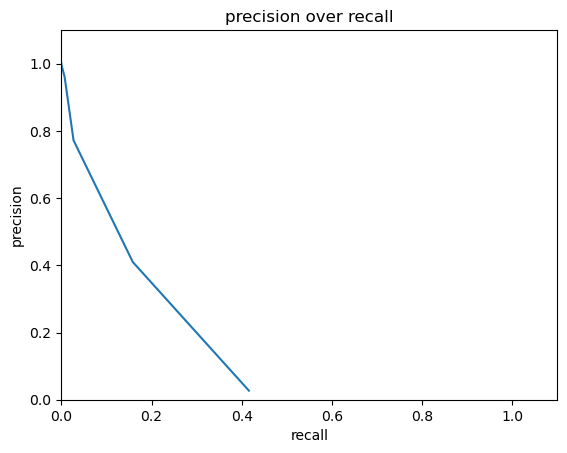

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.04it/s]


average train losses 3.408877558178372
average test losses 3.470792912350081
average precision 0.14124772977294947
test_precision 0.7502096202160331
test_recall 0.09328428772873218
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.31it/s]


average train losses 3.3764283657073975
average test losses 3.6107450343265155
average precision 0.13700963206117156
test_precision 0.7475103847321017
test_recall 0.09360772971884083
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 45.67it/s]


average train losses 3.3642781575520835
average test losses 3.460798001357293
average precision 0.13572587887812412
test_precision 0.7448765650014809
test_recall 0.1037936343491899
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.49it/s]


average train losses 3.3223009374406605
average test losses 3.330120047952375
average precision 0.13593033186092449
test_precision 0.7484036189448181
test_recall 0.10051018939907828
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 49.36it/s]


average train losses 3.27594256401062
average test losses 3.327337264675021
average precision 0.14212411939433114
test_precision 0.7564944238947577
test_recall 0.10082571749238416
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.76it/s]


average train losses 3.2792763710021973
average test losses 3.168059149019399
average precision 0.14152763405582103
test_precision 0.7522310682029806
test_recall 0.09622085733196845
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.47it/s]


average train losses 3.2504254976908364
average test losses 3.3527713083473705
average precision 0.13981096031413182
test_precision 0.7547637862595703
test_recall 0.0994995744995745
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.67it/s]


average train losses 3.1987721390194364
average test losses 3.194992698495544
average precision 0.14128355215057972
test_precision 0.7587066029183949
test_recall 0.10059395337173115
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.90it/s]


average train losses 3.19940718015035
average test losses 3.313561625630088
average precision 0.1407552353663356
test_precision 0.7562132341576677
test_recall 0.0868556340778563
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.02it/s]


average train losses 3.158469173643324
average test losses 3.14399208506288
average precision 0.14709362596347234
test_precision 0.7632324531329249
test_recall 0.09836151502818169
Epoch 86/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.31it/s]


average train losses 3.1359514925214977
average test losses 3.2585218414621817
average precision 0.1460076380147937
test_precision 0.7586647700923813
test_recall 0.09686291075179963
Epoch 87/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.49it/s]


average train losses 3.152009540134006
average test losses 3.4156273267208
average precision 0.14518009750999414
test_precision 0.7571833138080318
test_recall 0.09286433730878176
Epoch 88/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 58.02it/s]


average train losses 3.1037380430433483
average test losses 3.0906256549378748
average precision 0.1443085620509655
test_precision 0.7585412621861475
test_recall 0.0994557911224578
Epoch 89/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.84it/s]


average train losses 3.092131190829807
average test losses 3.152308273858834
average precision 0.1475566332851661
test_precision 0.7643960187971779
test_recall 0.09700381922604144
Epoch 90/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.36it/s]


average train losses 3.0769378874037
average test losses 3.0469474996257033
average precision 0.14689278190404112
test_precision 0.7628666901443335
test_recall 0.09683094683094683
Epoch 91/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.75it/s]


average train losses 3.0554513136545816
average test losses 3.1491956887421786
average precision 0.151870953182859
test_precision 0.7663602569128485
test_recall 0.09275457053234831
Epoch 92/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.59it/s]


average train losses 3.0439739492204456
average test losses 3.0393696945277373
average precision 0.1515777998265326
test_precision 0.7683809854631529
test_recall 0.09859739026405692
Epoch 93/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.05it/s]


average train losses 3.027305761973063
average test losses 3.045996856146049
average precision 0.1497372146734903
test_precision 0.7687895057987479
test_recall 0.09270297603630936
Epoch 94/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.29it/s]


average train losses 3.0207996898227267
average test losses 3.166558625012042
average precision 0.15195716449685207
test_precision 0.7653463124988295
test_recall 0.09678541622986067
Epoch 95/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.03it/s]


average train losses 2.9569930765363903
average test losses 2.964441685595064
average precision 0.16122219816894373
test_precision 0.7833417689245541
test_recall 0.08839329394884951
Epoch 96/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.31it/s]


average train losses 2.9691441324022083
average test losses 2.8499671862675595
average precision 0.16010989460306685
test_precision 0.7770891041443814
test_recall 0.10038315593871149
Epoch 97/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.36it/s]


average train losses 2.9517698287963867
average test losses 3.019002337401409
average precision 0.1534626729787726
test_precision 0.7711859473400916
test_recall 0.09906369350813796
Epoch 98/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.36it/s]


average train losses 2.934852123260498
average test losses 3.0696537511640805
average precision 0.14942981279327147
test_precision 0.7670288803923391
test_recall 0.0902406235739569
Epoch 99/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.05it/s]


average train losses 2.912914090686374
average test losses 3.059991819736285
average precision 0.15692486428223554
test_precision 0.7745690781199541
test_recall 0.0898509926287704
Epoch 100/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.60it/s]

average train losses 2.923139148288303
average test losses 3.0579370389297136
average precision 0.15941625871828619
test_precision 0.7731773480054128
test_recall 0.09401514123736346


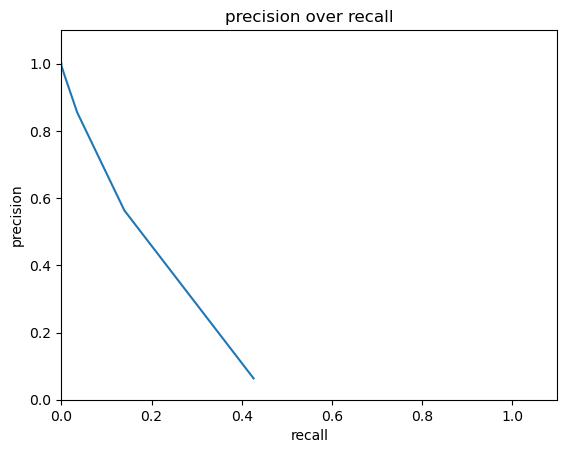

Epoch 101/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.35it/s]


average train losses 2.9026727411482067
average test losses 2.8556322907110903
average precision 0.15947761877298489
test_precision 0.7784523940574892
test_recall 0.09371410482521593
Epoch 102/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.42it/s]


average train losses 2.907989025115967
average test losses 2.8024436522413185
average precision 0.1655379687745037
test_precision 0.7870788816413891
test_recall 0.0936390769724103
Epoch 103/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.99it/s]


average train losses 2.8752120865715876
average test losses 2.931317299349695
average precision 0.15708754990464874
test_precision 0.7784464379302034
test_recall 0.08935108101774768
Epoch 104/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.76it/s]


average train losses 2.8706437481774225
average test losses 2.769946206329215
average precision 0.15926860331326467
test_precision 0.7829800770247385
test_recall 0.0830387719276608
Epoch 105/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.00it/s]


average train losses 2.847134590148926
average test losses 2.8919002323748377
average precision 0.1564244629230704
test_precision 0.7818496550149292
test_recall 0.08603310269976935
Epoch 106/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.82it/s]


average train losses 2.8250064849853516
average test losses 2.8247671059393813
average precision 0.162081024659193
test_precision 0.7805118124270506
test_recall 0.09654357987691323
Epoch 107/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.23it/s]


average train losses 2.813257349861993
average test losses 2.721582156810326
average precision 0.16525064753651283
test_precision 0.7832616273122728
test_recall 0.0959740876407543
Epoch 108/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.04it/s]


average train losses 2.8152684105767145
average test losses 2.826553507408186
average precision 0.16740917044132844
test_precision 0.7875415475573339
test_recall 0.09860170693504026
Epoch 109/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.32it/s]


average train losses 2.776488330629137
average test losses 2.802412346387521
average precision 0.16070047874597262
test_precision 0.7884437231558837
test_recall 0.08806882417993528
Epoch 110/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.11it/s]


average train losses 2.787520249684652
average test losses 2.879259691618786
average precision 0.1685319778274913
test_precision 0.7855270048811608
test_recall 0.09228713673158118
Epoch 111/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.75it/s]


average train losses 2.7771626578436956
average test losses 2.852682316235328
average precision 0.16284530971887834
test_precision 0.7913957716026736
test_recall 0.08842145508812176
Epoch 112/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.32it/s]


average train losses 2.7609331607818604
average test losses 2.862518635910121
average precision 0.16276968481323512
test_precision 0.7868739755841927
test_recall 0.08497325719547942
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 41.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.65it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.05it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.60it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.78it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.29it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.46it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.44it/s]


Max accuracy: 0.22694228200089475
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.82it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:18<00:00, 12.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.39it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 146.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.11it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.95it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 173.95it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.76it/s]

Max accuracy: 0.22694228200089475
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 14.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:18<00:00, 12.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 32.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 22.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 138.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.74it/s]

Max accuracy: 0.23563380935789305
With filter threshold: tensor(0.1500)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 90.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.78it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.44it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.12it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.34it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.34it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.21it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.15it/s]

Max accuracy: 0.2433426237949754
With filter threshold: tensor(0.1250)
With NMS threshold: tensor(0.6000)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:56<00:00,  6.22it/s]


average train losses 66.77980380588107
average test losses 62.03953473995893
average precision 0.09473572073315437
test_precision 0.31478838772937456
test_recall 0.25334233667567
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:53<00:00,  6.55it/s]


average train losses 56.33584509955512
average test losses 52.54237514615399
average precision 0.11034261611399296
test_precision 0.36014960847492794
test_recall 0.28041999153110264
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:47<00:00,  7.33it/s]


average train losses 48.60198762681749
average test losses 44.08757321175687
average precision 0.16862790528941607
test_precision 0.40148871647420525
test_recall 0.2835935669269002
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:49<00:00,  7.06it/s]


average train losses 42.24303775363498
average test losses 38.38769595371692
average precision 0.1702887544011942
test_precision 0.43251647981401886
test_recall 0.29792964237408687
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:44<00:00,  7.79it/s]


average train losses 36.812891218397354
average test losses 33.464117914183525
average precision 0.21013244781120477
test_precision 0.460900827661777
test_recall 0.27784252784252783
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.76it/s]


average train losses 30.883857091267902
average test losses 27.489894242028566
average precision 0.26534853565205624
test_precision 0.49438628446339616
test_recall 0.29486583375472264
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:41<00:00,  8.45it/s]


average train losses 26.905094358656143
average test losses 24.278476590104933
average precision 0.3041186556579032
test_precision 0.5183035757344919
test_recall 0.3087754837754838
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.02it/s]


average train losses 23.67388449774848
average test losses 21.652106320416486
average precision 0.275480386749852
test_precision 0.5343208883968784
test_recall 0.290016465016465
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.03it/s]


average train losses 20.954085032145183
average test losses 19.35537212458771
average precision 0.35872368839492047
test_precision 0.5582004497415911
test_recall 0.31971536693758923
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.49it/s]


average train losses 18.735276963975693
average test losses 17.30409720005133
average precision 0.3506517210125918
test_precision 0.5814347100488676
test_recall 0.2851612379390157
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.29it/s]


average train losses 16.780808554755318
average test losses 15.8940001104632
average precision 0.3676692205976341
test_precision 0.5894564911849948
test_recall 0.3033244533244533
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.07it/s]


average train losses 15.145196066962349
average test losses 14.423217297958852
average precision 0.38333979810713076
test_precision 0.5989854700809555
test_recall 0.3030826169715058
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:29<00:00, 11.77it/s]


average train losses 13.768824683295357
average test losses 13.277823195498215
average precision 0.40636708216560574
test_precision 0.615532354651031
test_recall 0.3141868419646197
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.22it/s]


average train losses 12.546468204922146
average test losses 12.075439697656876
average precision 0.41701612603070165
test_precision 0.6225220644339171
test_recall 0.3137739832184277
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.37it/s]


average train losses 11.526377571953667
average test losses 11.184600035349527
average precision 0.41901181439593904
test_precision 0.624938794479322
test_recall 0.30903499792388683
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.95it/s]


average train losses 10.632241566975912
average test losses 10.349469195743572
average precision 0.44448677434469397
test_precision 0.6459787900413927
test_recall 0.29696198862865525
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.86it/s]


average train losses 9.84335708618164
average test losses 9.785320991124863
average precision 0.44086683572689916
test_precision 0.6441344605513937
test_recall 0.31922737756071085
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.52it/s]


average train losses 9.168121973673502
average test losses 9.177425119611952
average precision 0.38486484909328156
test_precision 0.6559489969904185
test_recall 0.2834584140139696
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.94it/s]


average train losses 8.56041865878635
average test losses 8.7952233814446
average precision 0.42558717041621785
test_precision 0.652468165805131
test_recall 0.2904319959875515
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.01it/s]


average train losses 8.017033788892958
average test losses 8.167658076327072
average precision 0.4615204982664999
test_precision 0.6619991154280338
test_recall 0.3007274618385729
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.09it/s]


average train losses 7.5504069328308105
average test losses 7.5890488787594
average precision 0.4766158990822806
test_precision 0.6663521012001394
test_recall 0.3115134865134865
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.09it/s]


average train losses 7.118723816341824
average test losses 7.369978550152901
average precision 0.4646393263945072
test_precision 0.6666272809147624
test_recall 0.3033926978371423
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.86it/s]


average train losses 6.740157922108968
average test losses 6.959012680923157
average precision 0.45471934330889385
test_precision 0.6734001217021055
test_recall 0.2943798999354555
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.64it/s]


average train losses 6.376130474938287
average test losses 6.736582502001031
average precision 0.4687285248578524
test_precision 0.6698439733906224
test_recall 0.3131737603959826
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.57it/s]


average train losses 6.063811196221246
average test losses 6.276453179171962
average precision 0.46505909165986437
test_precision 0.6806210034610138
test_recall 0.3058406613962169


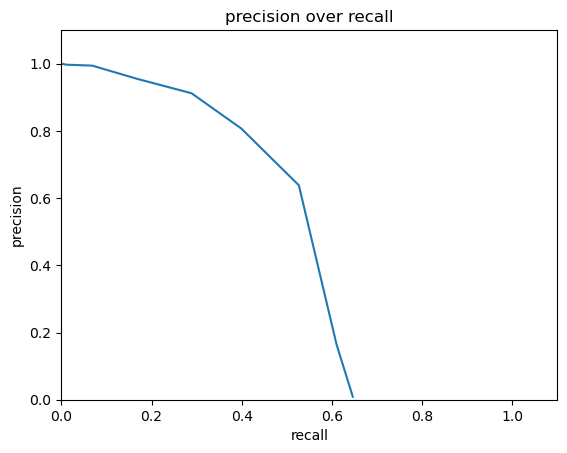

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.39it/s]


average train losses 5.775517251756456
average test losses 5.995763856800873
average precision 0.4881537461133619
test_precision 0.6863052395929264
test_recall 0.3274775635886747
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.69it/s]


average train losses 5.5038562880622015
average test losses 5.901637977344698
average precision 0.4744105712283624
test_precision 0.6770668990491286
test_recall 0.305101174545619
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.71it/s]


average train losses 5.282382594214545
average test losses 5.658290844697219
average precision 0.459058062644943
test_precision 0.6779773207144578
test_recall 0.30775294664183556
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.52it/s]


average train losses 5.0519125196668835
average test losses 5.511723002137622
average precision 0.4718959834562391
test_precision 0.6737957815832588
test_recall 0.3126499015387904
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.56it/s]


average train losses 4.853885067833795
average test losses 5.289681913506271
average precision 0.4858020700701326
test_precision 0.6857206788728214
test_recall 0.3137038887038887
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.54it/s]


average train losses 4.655280378129747
average test losses 5.134960906118409
average precision 0.48608182269701833
test_precision 0.6871231969995922
test_recall 0.30670399559288447
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.72it/s]


average train losses 4.489487012227376
average test losses 4.913285273772019
average precision 0.5127152913247314
test_precision 0.6954145276814773
test_recall 0.35513899680566346
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.93it/s]


average train losses 4.328948338826497
average test losses 4.72582158471784
average precision 0.49865438375877164
test_precision 0.6896155863293896
test_recall 0.33016798016798016
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.40it/s]


average train losses 4.167111714680989
average test losses 4.63415141255088
average precision 0.5153505103965487
test_precision 0.6990396466616746
test_recall 0.3300397133730467
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.53it/s]


average train losses 4.028081125683254
average test losses 4.470275445541425
average precision 0.514398044218895
test_precision 0.6982375543701035
test_recall 0.32895119284008173
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.78it/s]


average train losses 3.881975465350681
average test losses 4.385991169856145
average precision 0.518596942950374
test_precision 0.7025655775489854
test_recall 0.3365443198776532
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.66it/s]


average train losses 3.7639985614352756
average test losses 4.21131664531523
average precision 0.5106046579454049
test_precision 0.6944702312817556
test_recall 0.325752436863548
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.63it/s]


average train losses 3.654039594862196
average test losses 4.323026880579457
average precision 0.5077194601135961
test_precision 0.6916461959311601
test_recall 0.3377315071759516
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.79it/s]


average train losses 3.534816715452406
average test losses 4.127024055885793
average precision 0.4578709628622072
test_precision 0.6977354679938786
test_recall 0.3040567457234124
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.30it/s]


average train losses 3.4411430093977184
average test losses 4.062689347144885
average precision 0.4326858542934387
test_precision 0.6869689379361178
test_recall 0.30961970128636795
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.45it/s]


average train losses 3.3333168824513755
average test losses 3.8915503942049465
average precision 0.5041549579824097
test_precision 0.6890882552832955
test_recall 0.3458174541507874
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.57it/s]


average train losses 3.2345764901902943
average test losses 3.870561530107786
average precision 0.5192681946614751
test_precision 0.7046056344427305
test_recall 0.3326539715428604
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.35it/s]


average train losses 3.154237535264757
average test losses 3.697876937368996
average precision 0.48508523707836565
test_precision 0.701860957145724
test_recall 0.3404669404669404
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.87it/s]


average train losses 3.0687514675988092
average test losses 3.5738859132484153
average precision 0.5180147009859142
test_precision 0.6958961939383803
test_recall 0.36133393355615573
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.07it/s]


average train losses 2.9768375555674234
average test losses 3.7397548894257286
average precision 0.5008642683581225
test_precision 0.6869200448686621
test_recall 0.3402698124920347
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.71it/s]


average train losses 2.8985663519965277
average test losses 3.494657677802605
average precision 0.479712109469979
test_precision 0.6964693033866904
test_recall 0.32636571247682356
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.31it/s]


average train losses 2.841324355867174
average test losses 3.4437972510981765
average precision 0.5119144475375014
test_precision 0.6978531640490612
test_recall 0.3400798789687678
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 35.06it/s]


average train losses 2.7443790435791016
average test losses 3.3109306127597122
average precision 0.5110508718489928
test_precision 0.6973422741246956
test_recall 0.34032767643878753
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 34.30it/s]


average train losses 2.696534130308363
average test losses 3.3455546900757356
average precision 0.5212299390607931
test_precision 0.7082994321323002
test_recall 0.35612504779171444
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.93it/s]

average train losses 2.6238123310936823
average test losses 3.3323661347060463
average precision 0.5103954875468971
test_precision 0.6975777530701344
test_recall 0.3282428476872921


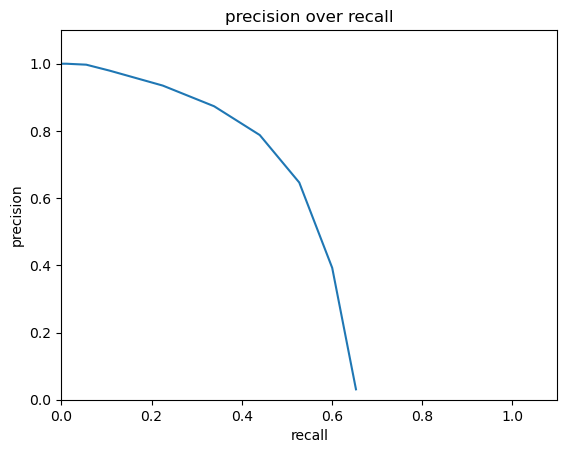

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 38.24it/s]


average train losses 2.5676641199323864
average test losses 3.228068329669811
average precision 0.507443805990167
test_precision 0.6952813961015961
test_recall 0.35651508984842323
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 34.20it/s]


average train losses 2.5071084234449597
average test losses 3.343189369918954
average precision 0.5136009998623647
test_precision 0.6948507535876866
test_recall 0.36223231501009273
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 37.92it/s]


average train losses 2.4373228549957275
average test losses 3.28292221798856
average precision 0.4556725522047737
test_precision 0.6984196236021634
test_recall 0.32924174590841265
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.87it/s]


average train losses 2.3799164825015597
average test losses 3.1341716051101685
average precision 0.5134235450021433
test_precision 0.7024462725344232
test_recall 0.3410433188210967
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.15it/s]


average train losses 2.3341021802690296
average test losses 3.0519937117215235
average precision 0.5174705050840495
test_precision 0.7072641146799151
test_recall 0.35855070855070853
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 43.20it/s]


average train losses 2.273754914601644
average test losses 3.027960315728799
average precision 0.5075718200318574
test_precision 0.6972496342623241
test_recall 0.3542799792799793
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.60it/s]


average train losses 2.2207246091630726
average test losses 3.0071690276137786
average precision 0.44044313050478684
test_precision 0.6816444902100751
test_recall 0.31984260595371705
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 45.78it/s]


average train losses 2.1619078583187528
average test losses 2.981241273744154
average precision 0.5052196245802748
test_precision 0.6951134710707298
test_recall 0.3423692562581452
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.12it/s]


average train losses 2.119227064980401
average test losses 2.93678749388779
average precision 0.5031115316108917
test_precision 0.6932453673257146
test_recall 0.3560209337987116
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.34it/s]


average train losses 2.074468639161852
average test losses 2.81919283235175
average precision 0.4818752800379219
test_precision 0.7041816398562998
test_recall 0.3308515558515558
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.58it/s]


average train losses 2.0348126358456082
average test losses 2.875754325817793
average precision 0.510376742949321
test_precision 0.701357511439801
test_recall 0.34249104804660363
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 45.71it/s]


average train losses 1.9959907796647813
average test losses 2.8874850633137585
average precision 0.45193423605809924
test_precision 0.7012846116566354
test_recall 0.3077567494234161
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.79it/s]


average train losses 1.9513130717807345
average test losses 2.9027591437695714
average precision 0.438916158424392
test_precision 0.7011582429552169
test_recall 0.3059830087607865
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.61it/s]


average train losses 1.9066313770082262
average test losses 2.8804092526096223
average precision 0.4766459074681814
test_precision 0.7013403151803871
test_recall 0.3255544866655978
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.67it/s]


average train losses 1.8693860504362318
average test losses 2.754061185057007
average precision 0.5154805576416002
test_precision 0.707732374950569
test_recall 0.35025437525437525
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.23it/s]


average train losses 1.83116881052653
average test losses 2.762280499493634
average precision 0.4773129576481374
test_precision 0.7005141354508748
test_recall 0.3512273734495957
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.70it/s]


average train losses 1.7977808051639133
average test losses 2.730051867982261
average precision 0.4784895605209654
test_precision 0.7027068027382536
test_recall 0.32469762747540526
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.20it/s]


average train losses 1.7736587127049763
average test losses 2.634318527672705
average precision 0.4772343755405602
test_precision 0.7022171100315812
test_recall 0.3415809499142832
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.83it/s]


average train losses 1.7195990085601807
average test losses 2.579532724669856
average precision 0.44081620791537934
test_precision 0.6975668061118249
test_recall 0.3152191429969208
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.74it/s]


average train losses 1.6908607880274455
average test losses 2.599077832834673
average precision 0.4860572190364352
test_precision 0.7136076211310245
test_recall 0.324568846791069
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.58it/s]


average train losses 1.655320167541504
average test losses 2.5967464428341964
average precision 0.4756763191674737
test_precision 0.7001895589675015
test_recall 0.32043347598903155
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.12it/s]


average train losses 1.6319387091530695
average test losses 2.6081016092558533
average precision 0.476797276350532
test_precision 0.7034479419725385
test_recall 0.31914104414104416
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 58.26it/s]


average train losses 1.6103630993101332
average test losses 2.5268839747138174
average precision 0.4914289152360302
test_precision 0.7205690427048038
test_recall 0.33483049871938764
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.17it/s]


average train losses 1.5798993243111505
average test losses 2.7306930157873364
average precision 0.4311259387376897
test_precision 0.6953725176079569
test_recall 0.2991943241943242
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.11it/s]

average train losses 1.5600536266962688
average test losses 2.573399483648121
average precision 0.47906908832377354
test_precision 0.7059360509719995
test_recall 0.32124696291362964


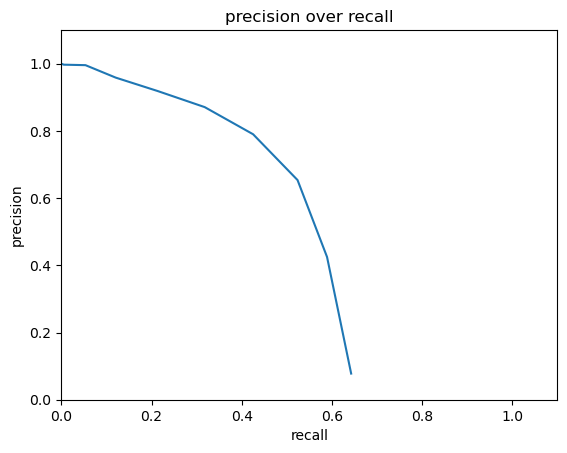

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 58.28it/s]


average train losses 1.540808743900723
average test losses 2.4396274915108314
average precision 0.510234848854818
test_precision 0.7088988783472764
test_recall 0.34109922998811887
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.26it/s]


average train losses 1.5194295909669664
average test losses 2.445747684039961
average precision 0.424929595752047
test_precision 0.7023517460774108
test_recall 0.29585455696566804
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.44it/s]


average train losses 1.5031875636842515
average test losses 2.447564192307301
average precision 0.46262287593172396
test_precision 0.7117795683530501
test_recall 0.31956541400985844
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.42it/s]


average train losses 1.4589397642347548
average test losses 2.3862804259330117
average precision 0.4648938429457012
test_precision 0.7143834629097078
test_recall 0.31987189764967544
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.28it/s]


average train losses 1.422998521063063
average test losses 2.381187027166372
average precision 0.48939662830937275
test_precision 0.7231320666567
test_recall 0.33481785704007927
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.47it/s]


average train losses 1.407044145796034
average test losses 2.466793449685784
average precision 0.5264965806598194
test_precision 0.7281888369462034
test_recall 0.3339446561668784
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.48it/s]


average train losses 1.3786102135976155
average test losses 2.361269963942362
average precision 0.49745267760099665
test_precision 0.7317683252137889
test_recall 0.32029267029267033
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.13it/s]


average train losses 1.3533529837926228
average test losses 2.4119912961609344
average precision 0.515464523116914
test_precision 0.7176454211733664
test_recall 0.3374850458183792
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.91it/s]


average train losses 1.3331526385413275
average test losses 2.4323624331726985
average precision 0.5080939648221782
test_precision 0.7111335743214964
test_recall 0.34917407695185476
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.69it/s]


average train losses 1.312599738438924
average test losses 2.329664396254765
average precision 0.4773301612563847
test_precision 0.707998621680663
test_recall 0.32311762311762315
Epoch 86/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.04it/s]


average train losses 1.2780413495169745
average test losses 2.3793785033742245
average precision 0.45334775464529115
test_precision 0.7154130410119076
test_recall 0.31076238576238574
Epoch 87/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.25it/s]


average train losses 1.2859623432159424
average test losses 2.31517207486677
average precision 0.475222615860536
test_precision 0.7156956032114753
test_recall 0.3092080758747425
Epoch 88/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.94it/s]


average train losses 1.2885282701916165
average test losses 2.501394360663205
average precision 0.47898009906127564
test_precision 0.710865188492691
test_recall 0.32269890603223933
Epoch 89/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.55it/s]


average train losses 1.2784596416685317
average test losses 2.2795366512404547
average precision 0.4531280923272308
test_precision 0.724676385285915
test_recall 0.3050359105914662
Epoch 90/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.27it/s]


average train losses 1.2512752479977078
average test losses 2.335017944672848
average precision 0.4661152501982006
test_precision 0.7179103665561262
test_recall 0.3138202332646777
Epoch 91/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.61it/s]


average train losses 1.2453974352942572
average test losses 2.3037742403497723
average precision 0.4391219444341159
test_precision 0.7109350806103472
test_recall 0.2988298738298738
Epoch 92/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.03it/s]


average train losses 1.2312188413408067
average test losses 2.254100321364878
average precision 0.5018469714543272
test_precision 0.7421646299967372
test_recall 0.3274711913600803
Epoch 93/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.95it/s]


average train losses 1.2051163117090862
average test losses 2.2378732579046505
average precision 0.44314548087570454
test_precision 0.7254618885723775
test_recall 0.28311256644589977
Epoch 94/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.87it/s]


average train losses 1.1773805618286133
average test losses 2.3441428270435063
average precision 0.44588347638046194
test_precision 0.7277414393667235
test_recall 0.2983416788972345
Epoch 95/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.88it/s]


average train losses 1.1584532923168607
average test losses 2.29790860414505
average precision 0.49097149568339676
test_precision 0.7267166491323613
test_recall 0.32674681285792395
Epoch 96/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.55it/s]


average train losses 1.1293017864227295
average test losses 2.323767612972151
average precision 0.43746490415304057
test_precision 0.732802501997933
test_recall 0.28681935348602017
Epoch 97/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.59it/s]


average train losses 1.1245527399910822
average test losses 2.207917098985438
average precision 0.45794535789273366
test_precision 0.7371787549930867
test_recall 0.3035967119300453
Epoch 98/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.02it/s]


average train losses 1.1183072725931804
average test losses 2.2060752735178695
average precision 0.4597242303203004
test_precision 0.7419164123877702
test_recall 0.2810104504548949
Epoch 99/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.54it/s]


average train losses 1.09375708632999
average test losses 2.3378709199761394
average precision 0.4432318623304519
test_precision 0.7251959426860511
test_recall 0.2945625362292029
Epoch 100/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.18it/s]

average train losses 1.081875787840949
average test losses 2.246219043208663
average precision 0.441282155587289
test_precision 0.7173351476947787
test_recall 0.3024733496955719


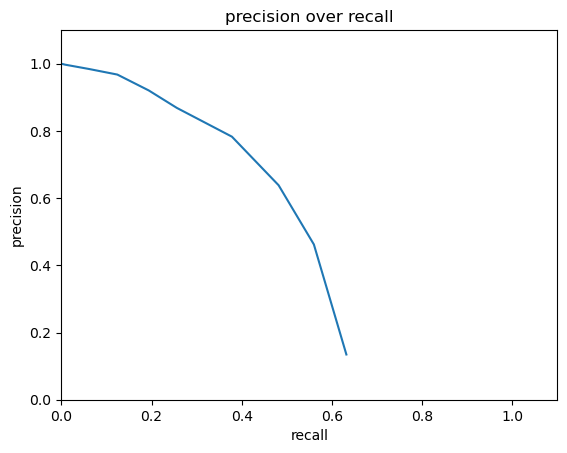

Epoch 101/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.50it/s]


average train losses 1.0513757599724665
average test losses 2.0358710455418993
average precision 0.4556601325331103
test_precision 0.7351769951307778
test_recall 0.2889575445131001
Epoch 102/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.76it/s]


average train losses 1.0361618598302205
average test losses 2.2635063462787204
average precision 0.4499283017328109
test_precision 0.7281689001164897
test_recall 0.30860466693800026
Epoch 103/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.34it/s]


average train losses 1.0232167575094435
average test losses 2.154513823510575
average precision 0.4679760523252764
test_precision 0.7198561596016164
test_recall 0.31191277857944527
Epoch 104/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.06it/s]


average train losses 0.9990711808204651
average test losses 2.185539940992991
average precision 0.4422672658107061
test_precision 0.7129527956860904
test_recall 0.3012546095879429
Epoch 105/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.48it/s]


average train losses 0.985333628124661
average test losses 2.1576282012666392
average precision 0.49596705923823825
test_precision 0.735710669129484
test_recall 0.3163110551999441
Epoch 106/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.06it/s]


average train losses 0.9624644650353326
average test losses 1.9298497694849628
average precision 0.4706020125689219
test_precision 0.747501403404919
test_recall 0.3052188552188552
Epoch 107/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.94it/s]


average train losses 0.9593756331337823
average test losses 2.2021033174631603
average precision 0.45514674671025657
test_precision 0.7219166596897756
test_recall 0.3251099723321946
Epoch 108/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.41it/s]


average train losses 0.9515866637229919
average test losses 2.4186284503026565
average precision 0.4378849099487583
test_precision 0.715881294799201
test_recall 0.29929741040852154
Epoch 109/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.02it/s]


average train losses 0.9399478236834208
average test losses 2.1357253124231628
average precision 0.45665155204058705
test_precision 0.7385512534056126
test_recall 0.28884777773666664
Epoch 110/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.03it/s]


average train losses 0.9325934251149496
average test losses 2.0856567093110154
average precision 0.4547766693840895
test_precision 0.7272959034148584
test_recall 0.2974576863465752
Epoch 111/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.93it/s]


average train losses 0.9361421333418952
average test losses 2.127562147429866
average precision 0.438758576556188
test_precision 0.7341226230505912
test_recall 0.27883104549771215
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.64it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.55it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.66it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.64it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.64it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.60it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.14it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.05it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.03it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.11it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.81it/s]

Max accuracy: 0.5299209072229897
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.88it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.89it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.58it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.42it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.05it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.79it/s]

Max accuracy: 0.536964870862861
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.81it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.94it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.66it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.87it/s]

Max accuracy: 0.5455027739806153
With filter threshold: tensor(0.1500)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.62it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.29it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.86it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.49it/s]

Max accuracy: 0.5521583022945616
With filter threshold: tensor(0.1250)
With NMS threshold: tensor(0.5500)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:00<00:00,  5.75it/s]


average train losses 73.71893819173177
average test losses 68.8940111252657
average precision 0.09463603490726209
test_precision 0.2902931361974067
test_recall 0.2732686038241594
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:56<00:00,  6.15it/s]


average train losses 61.65825907389323
average test losses 57.95466925683524
average precision 0.09640653139197375
test_precision 0.34847532097677697
test_recall 0.25251795529573307
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:48<00:00,  7.21it/s]


average train losses 52.52023696899414
average test losses 47.33400805655368
average precision 0.1295731569785488
test_precision 0.39629253834868583
test_recall 0.2955357399801844
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:46<00:00,  7.48it/s]


average train losses 44.66857020060221
average test losses 39.490580186545
average precision 0.16789623726990552
test_precision 0.4349994414650848
test_recall 0.28729387896054565
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:40<00:00,  8.71it/s]


average train losses 37.966117011176216
average test losses 33.360548285677226
average precision 0.22250322828487093
test_precision 0.47366172058623
test_recall 0.28792072125405455
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.84it/s]


average train losses 31.306134753757053
average test losses 27.211847147710643
average precision 0.23886810961224184
test_precision 0.5097580327610076
test_recall 0.29505217005217
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.82it/s]


average train losses 26.495296266343857
average test losses 23.65755793036219
average precision 0.3341493564646962
test_precision 0.5369773012715605
test_recall 0.28512341567897126
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:36<00:00,  9.50it/s]


average train losses 22.71107228597005
average test losses 20.74443180268986
average precision 0.3205872909920373
test_precision 0.5643273544852659
test_recall 0.2805454833232611
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.81it/s]


average train losses 19.739713668823242
average test losses 18.247847668465727
average precision 0.3676236930536483
test_precision 0.5881908525604135
test_recall 0.31439887273220607
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.43it/s]


average train losses 17.302012125651043
average test losses 16.603791147215752
average precision 0.3209392603351183
test_precision 0.5914928602418477
test_recall 0.27998657720879944
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.27it/s]


average train losses 15.368653933207193
average test losses 14.928164025657198
average precision 0.40878599773150376
test_precision 0.6035747269189912
test_recall 0.3046864657975769
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.13it/s]


average train losses 13.71831120385064
average test losses 13.522862491444645
average precision 0.39483547596070295
test_precision 0.6126719081753896
test_recall 0.2857162384940163
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.40it/s]


average train losses 12.443742328219944
average test losses 12.348805441136374
average precision 0.38540777091828055
test_precision 0.6342698495421019
test_recall 0.30179789346456015
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.56it/s]


average train losses 11.286331176757812
average test losses 11.500323434161325
average precision 0.3974718132150999
test_precision 0.6393060517257119
test_recall 0.2791672319450097
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.95it/s]


average train losses 10.35609679751926
average test losses 10.601587663688552
average precision 0.4547898129318297
test_precision 0.6559957726349894
test_recall 0.31139076972410307
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.40it/s]


average train losses 9.561738967895508
average test losses 9.999230647019171
average precision 0.44126742581020006
test_precision 0.646025630548809
test_recall 0.2950448728226506
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.36it/s]


average train losses 8.853995853000217
average test losses 9.122944742186457
average precision 0.4635136430466326
test_precision 0.6629308080333589
test_recall 0.30072684517128956
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.62it/s]


average train losses 8.262405024634468
average test losses 8.686111759935688
average precision 0.46100165506585855
test_precision 0.6620444904185375
test_recall 0.3141849919627697
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.86it/s]


average train losses 7.744401454925537
average test losses 8.22637128422403
average precision 0.4374771267224377
test_precision 0.660487246893613
test_recall 0.2975555308888642
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.74it/s]


average train losses 7.2494002978007
average test losses 7.829514798275765
average precision 0.47827014386971195
test_precision 0.6647368927403309
test_recall 0.3307876280098502
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.37it/s]


average train losses 6.818896134694417
average test losses 7.333861761283331
average precision 0.486212144580908
test_precision 0.6772762609622474
test_recall 0.3199056087944977
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.23it/s]


average train losses 6.440169387393528
average test losses 6.98952968847378
average precision 0.4543863653960105
test_precision 0.6810500133980218
test_recall 0.29109080220191336
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.91it/s]


average train losses 6.122096273634169
average test losses 6.727385167722349
average precision 0.46840129315919
test_precision 0.6849145209845611
test_recall 0.30709660709660713
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.41it/s]


average train losses 5.816398037804498
average test losses 6.349242297332851
average precision 0.4221618457692389
test_precision 0.6952225199575393
test_recall 0.2946888502444058
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.10it/s]


average train losses 5.532672935061985
average test losses 6.128321378658979
average precision 0.5032819375647788
test_precision 0.6938026921423868
test_recall 0.3359090497979387


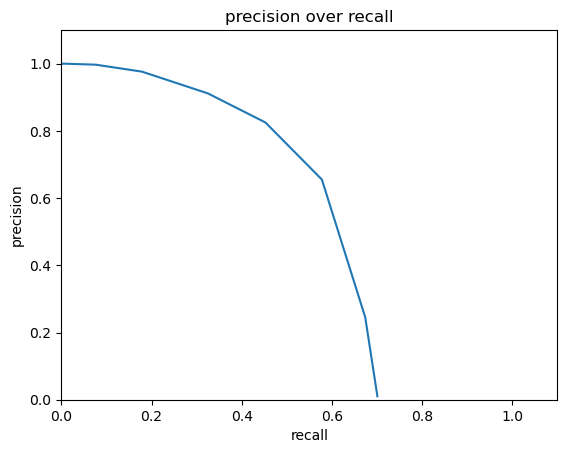

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.82it/s]


average train losses 5.262135558658176
average test losses 5.821802223509873
average precision 0.5025116102555637
test_precision 0.6939623287285999
test_recall 0.3234083817417151
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.00it/s]


average train losses 5.020235167609321
average test losses 5.632466601510333
average precision 0.5073117066604484
test_precision 0.697997961949712
test_recall 0.31499703999704
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.19it/s]


average train losses 4.820075935787624
average test losses 5.400111938813473
average precision 0.5122407533612194
test_precision 0.6953623739451912
test_recall 0.32827213938325045
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.70it/s]


average train losses 4.614686277177599
average test losses 5.200586867128682
average precision 0.5019283505674866
test_precision 0.6922301468470304
test_recall 0.33429255929255924
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.25it/s]


average train losses 4.4378964636060925
average test losses 4.981790733473253
average precision 0.5176823823866109
test_precision 0.7022812874521513
test_recall 0.3244840550396106
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.65it/s]


average train losses 4.27819119559394
average test losses 4.890951550584234
average precision 0.5125091265700996
test_precision 0.6952566455294007
test_recall 0.34593379871157653
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.13it/s]


average train losses 4.101286517249213
average test losses 4.691798235276486
average precision 0.5182588128092227
test_precision 0.701723028273771
test_recall 0.3369772203105536
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.29it/s]


average train losses 3.9395183192359076
average test losses 4.506701462628834
average precision 0.4904357288630679
test_precision 0.7075715917033393
test_recall 0.3264758903647792
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.87it/s]


average train losses 3.817720890045166
average test losses 4.498016505499511
average precision 0.5148740702146526
test_precision 0.6985904029641058
test_recall 0.35366125643903423
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.85it/s]


average train losses 3.7053759362962513
average test losses 4.224815840734715
average precision 0.5194644259684096
test_precision 0.7034427385203609
test_recall 0.34636885747996865
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.47it/s]


average train losses 3.544978963004218
average test losses 4.187855774860436
average precision 0.5192404178517094
test_precision 0.7030327451122297
test_recall 0.3235973902640569
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.99it/s]


average train losses 3.423136658138699
average test losses 4.10514333513048
average precision 0.4841755283929985
test_precision 0.7093047862265516
test_recall 0.31402023902023907
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.65it/s]


average train losses 3.307672050264147
average test losses 3.8979349503150353
average precision 0.49182061507578284
test_precision 0.7104371063635186
test_recall 0.3270673770673771
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 20.64it/s]


average train losses 3.20342395040724
average test losses 4.0940415322610795
average precision 0.47852949637499803
test_precision 0.696744836391155
test_recall 0.31877176321620765
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.94it/s]


average train losses 3.1053797139061823
average test losses 3.865470329241196
average precision 0.5197018863146481
test_precision 0.7042506869242219
test_recall 0.34575054575054576
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.99it/s]


average train losses 3.0182530085245767
average test losses 3.6935046955391213
average precision 0.5131485528244034
test_precision 0.6981147975732386
test_recall 0.3404863654863655
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.27it/s]


average train losses 2.913474851184421
average test losses 3.6166692911050258
average precision 0.5128361420661357
test_precision 0.6983829101179838
test_recall 0.3521290437957104
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 30.00it/s]


average train losses 2.818608178032769
average test losses 3.622572144891462
average precision 0.5159103922311732
test_precision 0.7021158544194218
test_recall 0.36334653001319667
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.49it/s]


average train losses 2.7325060632493763
average test losses 3.588957860598877
average precision 0.5009398141223472
test_precision 0.6870434632952169
test_recall 0.3450950284283618
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 32.76it/s]


average train losses 2.6489628156026206
average test losses 3.572025451225433
average precision 0.5144057863599147
test_precision 0.701687417570159
test_recall 0.34258632314187865
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 38.90it/s]


average train losses 2.562731636895074
average test losses 3.353707603579573
average precision 0.5330567666251046
test_precision 0.7200664172934503
test_recall 0.3269199935866603
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.27it/s]


average train losses 2.4878105322519937
average test losses 3.256999226377221
average precision 0.5301245722497716
test_precision 0.7179777147471821
test_recall 0.33206032650477096
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 39.20it/s]


average train losses 2.418846289316813
average test losses 3.3035566012064614
average precision 0.48296327364464386
test_precision 0.7060552966280379
test_recall 0.33427488149710366
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 38.14it/s]


average train losses 2.3517716460757785
average test losses 3.3242619699902005
average precision 0.48076688063270084
test_precision 0.7053205603899917
test_recall 0.3235349013126791
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.09it/s]

average train losses 2.2789618968963623
average test losses 3.11983866059882
average precision 0.5463633411402558
test_precision 0.7360156587839548
test_recall 0.33320701931813046


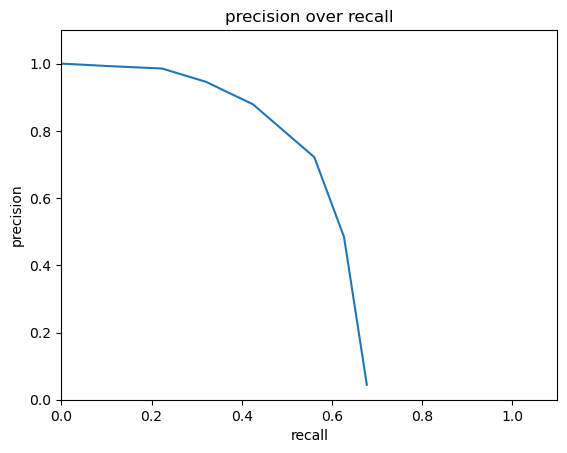

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.78it/s]


average train losses 2.215937508477105
average test losses 3.107940201745753
average precision 0.47574186686696296
test_precision 0.6961689649903581
test_recall 0.3270969770969771
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.30it/s]


average train losses 2.1592145760854087
average test losses 3.0904530748682486
average precision 0.48684775263761665
test_precision 0.7103956768361924
test_recall 0.3272723161612051
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.11it/s]


average train losses 2.0994354354010687
average test losses 3.017998386652042
average precision 0.4474996073234083
test_precision 0.690046905059662
test_recall 0.3186018713796492
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.61it/s]


average train losses 2.028304855028788
average test losses 3.0419895662541405
average precision 0.5069855880027734
test_precision 0.7227622093085132
test_recall 0.3183168683168683
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.79it/s]


average train losses 1.9676175779766507
average test losses 2.9270283625676083
average precision 0.5243113292268814
test_precision 0.7157318546762101
test_recall 0.33522588522588526
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.61it/s]


average train losses 1.905406567785475
average test losses 2.9162070499865758
average precision 0.5234539041493198
test_precision 0.7197793045505445
test_recall 0.3239276155942823
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.28it/s]


average train losses 1.8584769301944308
average test losses 2.8801062861059465
average precision 0.4850878543704534
test_precision 0.7146862088311383
test_recall 0.32932468765802103
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.15it/s]


average train losses 1.8035888009601169
average test losses 2.8199407952463527
average precision 0.5244452970916463
test_precision 0.7178399025918193
test_recall 0.3366309616309616
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.58it/s]


average train losses 1.7493500312169392
average test losses 2.7865929593387833
average precision 0.44579686014377545
test_precision 0.7201363070857708
test_recall 0.28587307753974417
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.14it/s]


average train losses 1.705066720644633
average test losses 2.760917792632709
average precision 0.5209191942798866
test_precision 0.7143709409854206
test_recall 0.32969170746948523
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 58.68it/s]


average train losses 1.6681331528557672
average test losses 2.7598425180484085
average precision 0.4869288656842322
test_precision 0.7165153744111799
test_recall 0.3254380393269282
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.12it/s]


average train losses 1.640956335597568
average test losses 2.6622550236193883
average precision 0.4577713326775105
test_precision 0.7369073696108537
test_recall 0.3046356935245824
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.31it/s]


average train losses 1.599683788087633
average test losses 2.759853118165606
average precision 0.4235731405278043
test_precision 0.7021774690668198
test_recall 0.2756365034142812
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.87it/s]


average train losses 1.528904226091173
average test losses 2.6762618237411195
average precision 0.44207114570749295
test_precision 0.7077335418527559
test_recall 0.31689894467672247
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 58.80it/s]


average train losses 1.4855424695544772
average test losses 2.660368169135178
average precision 0.4534153312729374
test_precision 0.7256045951893159
test_recall 0.30830959164292493
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.85it/s]


average train losses 1.4441517723931208
average test losses 2.651894099691994
average precision 0.4471844435701375
test_precision 0.7243125062221086
test_recall 0.2977984977984978
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.14it/s]


average train losses 1.4118792083528307
average test losses 2.531944534717462
average precision 0.4526662997432775
test_precision 0.7315402837932157
test_recall 0.3027600999823222
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.06it/s]


average train losses 1.3947455485661824
average test losses 2.5171528066325393
average precision 0.47853876399320855
test_precision 0.733685814109725
test_recall 0.3248161303716859
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.94it/s]


average train losses 1.3555529250038996
average test losses 2.4304937609919794
average precision 0.4496958683209191
test_precision 0.7284403492568844
test_recall 0.28301400245844693
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.13it/s]


average train losses 1.3158151043785944
average test losses 2.5588830407188827
average precision 0.4480702043942502
test_precision 0.7282157855950961
test_recall 0.29520047853381187
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.77it/s]


average train losses 1.3027102549870808
average test losses 2.5248306921744277
average precision 0.4567061443677126
test_precision 0.7344678389867797
test_recall 0.2750432694877139
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.17it/s]


average train losses 1.2773600816726685
average test losses 2.461751547124651
average precision 0.4543069843431864
test_precision 0.7336536265737384
test_recall 0.29147282758393867
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.23it/s]


average train losses 1.2483136653900146
average test losses 2.6259765568961444
average precision 0.45253465275123494
test_precision 0.7317580370267084
test_recall 0.2954197037530371
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.14it/s]


average train losses 1.2166998121473525
average test losses 2.4099508916210923
average precision 0.45999648786261527
test_precision 0.7382663709360602
test_recall 0.28879258601480823
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.12it/s]


average train losses 1.1827625963422987
average test losses 2.467978588875882
average precision 0.46167133379065606
test_precision 0.7393047965484917
test_recall 0.3047365186254075


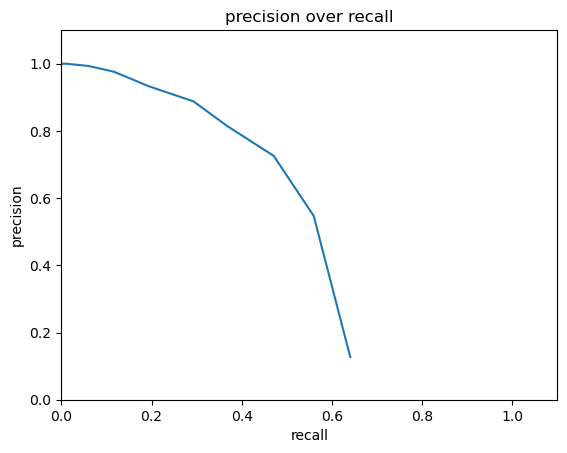

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.94it/s]


average train losses 1.1582697497473822
average test losses 2.4413205517662897
average precision 0.4532058209735077
test_precision 0.7291492485230059
test_recall 0.31340459951571065
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.07it/s]


average train losses 1.1331915458043416
average test losses 2.3622457121851776
average precision 0.44513346031294376
test_precision 0.7257145189214224
test_recall 0.2830009496676163
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.71it/s]


average train losses 1.1110308700137668
average test losses 2.3292936779494977
average precision 0.4798269616245857
test_precision 0.7629110606554929
test_recall 0.30619226452559783
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.21it/s]


average train losses 1.0954218705495198
average test losses 2.3517122324715314
average precision 0.42789694837091885
test_precision 0.7347354709596342
test_recall 0.2706306039639373
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.86it/s]


average train losses 1.072756012280782
average test losses 2.286408266110977
average precision 0.4704871251229327
test_precision 0.7466491963248519
test_recall 0.29979146368035253
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.24it/s]


average train losses 1.0289409160614014
average test losses 2.3518913907882495
average precision 0.4641033396448377
test_precision 0.7445028856014217
test_recall 0.2826066937178049
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.60it/s]


average train losses 1.02212436331643
average test losses 2.35439654547944
average precision 0.42533516492121737
test_precision 0.7423566975194783
test_recall 0.25389363722697056
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.36it/s]


average train losses 1.0178950428962708
average test losses 2.3170604904492698
average precision 0.41581900566915964
test_precision 0.7447747601554007
test_recall 0.27232335565668897
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.92it/s]


average train losses 0.9914264811409844
average test losses 2.391014427540988
average precision 0.4812590613122007
test_precision 0.7629279325330458
test_recall 0.2982784705006927
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.56it/s]


average train losses 0.967823949125078
average test losses 2.427310476445744
average precision 0.45002773691465575
test_precision 0.731550398370079
test_recall 0.27320272320272315
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:39<00:00, 10.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.60it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.55it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.05it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 161.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 159.53it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.12it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 179.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.12it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.55it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.03it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.56it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.92it/s]

Max accuracy: 0.46794532023385743
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.4000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.05it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.53it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.03it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 142.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 138.38it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.19it/s]

Max accuracy: 0.46794532023385743
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.4000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 31.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 41.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.46it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.58it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.81it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.14it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.38it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.99it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.00it/s]

Max accuracy: 0.4865688311454766
With filter threshold: tensor(0.1500)
With NMS threshold: tensor(0.4500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.90it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.61it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.46it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.08it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.58it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.26it/s]

Max accuracy: 0.4865688311454766
With filter threshold: tensor(0.1500)
With NMS threshold: tensor(0.4500)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:58<00:00,  5.99it/s]


average train losses 66.60614988538954
average test losses 62.01677001779235
average precision 0.13485510172279433
test_precision 0.3099241056403006
test_recall 0.2758074230296452
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:56<00:00,  6.21it/s]


average train losses 55.15491146511502
average test losses 50.85424110216972
average precision 0.17980278300494154
test_precision 0.3621498745990701
test_recall 0.29465719465719464
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:49<00:00,  7.09it/s]


average train losses 46.560646057128906
average test losses 41.073498706871966
average precision 0.23159860462648305
test_precision 0.4094159814318976
test_recall 0.315797576908688
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.74it/s]


average train losses 39.12887869940864
average test losses 33.69696778517503
average precision 0.2626404520876437
test_precision 0.4584196222040147
test_recall 0.29059058225724893
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.82it/s]


average train losses 32.69733895195855
average test losses 27.78156971727681
average precision 0.2315403473546499
test_precision 0.49719671775767715
test_recall 0.27562766451655335
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.96it/s]


average train losses 26.517624961005318
average test losses 22.611328999880712
average precision 0.3287871698128573
test_precision 0.5336553203826485
test_recall 0.3002805836139169
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:37<00:00,  9.31it/s]


average train losses 22.125176747639973
average test losses 19.870829940861107
average precision 0.32583220779328087
test_precision 0.5636601184765508
test_recall 0.2838596588596588
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.68it/s]


average train losses 18.726601706610786
average test losses 17.17324752753277
average precision 0.38841556178749576
test_precision 0.5842851082049837
test_recall 0.3118665285331952
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.34it/s]


average train losses 16.115969869825577
average test losses 15.233742336262326
average precision 0.3851852881985442
test_precision 0.5992458359573632
test_recall 0.29665159942937724
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.19it/s]


average train losses 14.072347852918837
average test losses 13.579067868724508
average precision 0.42347939641949744
test_precision 0.6162777157257636
test_recall 0.3104971160526716
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:29<00:00, 11.99it/s]


average train losses 12.463336838616264
average test losses 12.340327567184753
average precision 0.4425173627754203
test_precision 0.6338757594435706
test_recall 0.30404430959986517
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.47it/s]


average train losses 11.15013239118788
average test losses 11.36091046455579
average precision 0.44069932994583055
test_precision 0.6440833151852585
test_recall 0.29706209428431657
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.09it/s]


average train losses 10.1106841829088
average test losses 10.418421163857833
average precision 0.4436239854260427
test_precision 0.6478351695413539
test_recall 0.2973950946173169
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.91it/s]


average train losses 9.22399213578966
average test losses 9.593883503536214
average precision 0.4553044971281874
test_precision 0.6572711545784773
test_recall 0.309548681770904
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.06it/s]


average train losses 8.491083992852104
average test losses 8.949764602204674
average precision 0.46751297537638936
test_precision 0.666993970221917
test_recall 0.31371683871683875
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.76it/s]


average train losses 7.820946428510878
average test losses 8.515485642642377
average precision 0.4608208892852781
test_precision 0.6654224255055985
test_recall 0.2965062715062715
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.03it/s]


average train losses 7.283453358544244
average test losses 7.809982699206752
average precision 0.45510072321918393
test_precision 0.6738214628439513
test_recall 0.3016280016280016
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.30it/s]


average train losses 6.811380333370632
average test losses 7.365520194724754
average precision 0.463602620435865
test_precision 0.6800415558780611
test_recall 0.29945609945609947
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.11it/s]


average train losses 6.416676256391737
average test losses 7.029213303514355
average precision 0.46804429377241397
test_precision 0.6683996510656531
test_recall 0.3125995403773182
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.67it/s]


average train losses 6.0443136427137585
average test losses 6.622427646930401
average precision 0.4736858180935345
test_precision 0.6878123723346037
test_recall 0.30341325341325337
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.84it/s]


average train losses 5.700486712985569
average test losses 6.306503476580324
average precision 0.5110639744973607
test_precision 0.6994945363471717
test_recall 0.3232791899458566
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.81it/s]


average train losses 5.425520579020183
average test losses 6.168879572142902
average precision 0.5044277205913935
test_precision 0.695297934291846
test_recall 0.3241592769370547
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.38it/s]


average train losses 5.140150705973308
average test losses 5.79456380697397
average precision 0.5074506549785525
test_precision 0.6974115125911774
test_recall 0.3170249503582837
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.07it/s]


average train losses 4.894842041863336
average test losses 5.524138103523145
average precision 0.5112152952606664
test_precision 0.6971535085669772
test_recall 0.3346424151979707
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.37it/s]

average train losses 4.675585375891791
average test losses 5.315353974317893
average precision 0.5221566362689024
test_precision 0.7057758890852027
test_recall 0.34857077079299303


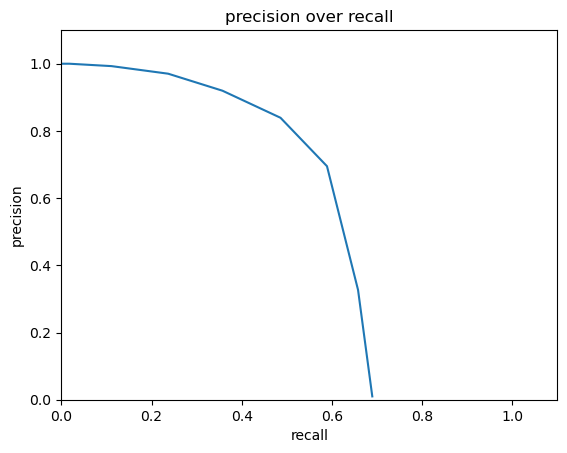

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.12it/s]


average train losses 4.4827638732062445
average test losses 5.163801893549428
average precision 0.47886239934607816
test_precision 0.6894234519120224
test_recall 0.3106530300974746
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.48it/s]


average train losses 4.275807963477241
average test losses 4.9421151268516175
average precision 0.5048378807057792
test_precision 0.7027370582714125
test_recall 0.3103564131341909
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.26it/s]


average train losses 4.1138778527577715
average test losses 4.814173911711429
average precision 0.517014566565125
test_precision 0.7072190178654374
test_recall 0.3194802111468778
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.78it/s]


average train losses 3.955488602320353
average test losses 4.638416204697046
average precision 0.5174125998061653
test_precision 0.7000187570606575
test_recall 0.3585491668825002
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.46it/s]


average train losses 3.839127699534098
average test losses 4.588458644019233
average precision 0.48799414665324453
test_precision 0.7041725227000191
test_recall 0.3109448165003721
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.89it/s]


average train losses 3.6757014327579074
average test losses 4.381940411706256
average precision 0.4406867105666596
test_precision 0.7009151237799001
test_recall 0.299743260854372
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.91it/s]


average train losses 3.5594842963748508
average test losses 4.247556836516769
average precision 0.4870160756372439
test_precision 0.7066241731774837
test_recall 0.31330274663608
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 21.80it/s]


average train losses 3.425423092312283
average test losses 4.041601434392467
average precision 0.5290998806613095
test_precision 0.7132583466743215
test_recall 0.3296656018878241
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.08it/s]


average train losses 3.3182115024990506
average test losses 4.005978961276193
average precision 0.5210320538791904
test_precision 0.7057689457200438
test_recall 0.32218532496310276
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.98it/s]


average train losses 3.197264618343777
average test losses 3.8260056143812307
average precision 0.5089261919100253
test_precision 0.7083367442509013
test_recall 0.3125948125948126
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 26.20it/s]


average train losses 3.092742125193278
average test losses 3.849339522527494
average precision 0.5277326903155984
test_precision 0.7128666918159537
test_recall 0.3456221761777317
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.16it/s]


average train losses 2.99993904431661
average test losses 3.7592504445643846
average precision 0.5228561035068418
test_precision 0.7079074432833152
test_recall 0.3390966029854919
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.47it/s]


average train losses 2.903411388397217
average test losses 3.656352739388447
average precision 0.5254826314548627
test_precision 0.7129907341597703
test_recall 0.32870195647973427
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.32it/s]


average train losses 2.8030554983350964
average test losses 3.5022413700054855
average precision 0.5284243386893489
test_precision 0.7134173435461496
test_recall 0.3337863782308227
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.59it/s]


average train losses 2.7220652103424072
average test losses 3.480342647288939
average precision 0.5362048874010497
test_precision 0.7230103555640969
test_recall 0.3242590742590743
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 37.53it/s]


average train losses 2.641630490620931
average test losses 3.3987790152557893
average precision 0.5298225924368573
test_precision 0.717409281315527
test_recall 0.3471263304596638
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.15it/s]


average train losses 2.5556449360317655
average test losses 3.289776464812776
average precision 0.5143739672444735
test_precision 0.7026584128344993
test_recall 0.34899421566088235
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.79it/s]


average train losses 2.4636218547821045
average test losses 3.267085015264332
average precision 0.5194469301598285
test_precision 0.7080229392305366
test_recall 0.35883262827707274
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.21it/s]


average train losses 2.3782958984375
average test losses 3.214587968978447
average precision 0.5382046106673002
test_precision 0.7238394147683516
test_recall 0.3537178870512204
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.42it/s]


average train losses 2.3363916079203286
average test losses 3.0917899615404614
average precision 0.5202475399650232
test_precision 0.7101307167220879
test_recall 0.3474402141068808
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.87it/s]


average train losses 2.284748183356391
average test losses 3.2986882317100155
average precision 0.4505226814096288
test_precision 0.6931380038547686
test_recall 0.32505436949881394
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 49.48it/s]


average train losses 2.228463570276896
average test losses 3.006480830347436
average precision 0.4798393011610941
test_precision 0.7036498899163561
test_recall 0.31651126651126654
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.85it/s]


average train losses 2.126145919164022
average test losses 2.989547441487978
average precision 0.47034623471823045
test_precision 0.7240736661877841
test_recall 0.3129885546552213
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.08it/s]


average train losses 2.0648158391316733
average test losses 3.105675555362321
average precision 0.5171035141066825
test_precision 0.7072476097951899
test_recall 0.343196207085096
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.86it/s]


average train losses 2.0145488580067954
average test losses 3.0602322015327608
average precision 0.5208146906476355
test_precision 0.7140561887778935
test_recall 0.3368949980061091


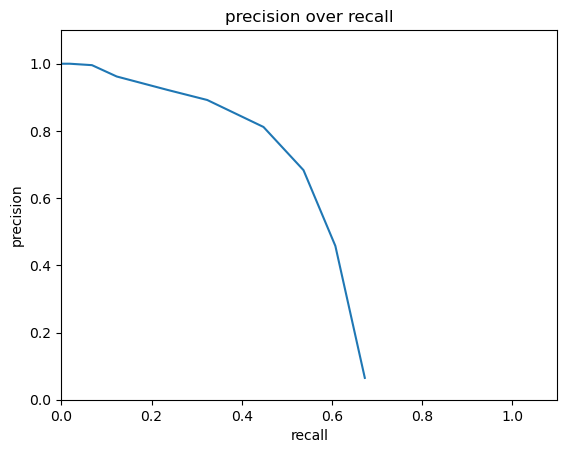

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.05it/s]


average train losses 1.9533740017149184
average test losses 3.00166733448322
average precision 0.517569103344276
test_precision 0.7089319915287751
test_recall 0.3473419584530696
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.98it/s]


average train losses 1.8885223733054266
average test losses 2.79475645835583
average precision 0.4913334255727751
test_precision 0.7209562372045472
test_recall 0.3360230304674749
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.57it/s]


average train losses 1.8337573872672186
average test losses 2.8560945702414227
average precision 0.4409937767265222
test_precision 0.7152018805012625
test_recall 0.29043518210184877
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.39it/s]


average train losses 1.794855210516188
average test losses 2.897903752123189
average precision 0.4621623822801509
test_precision 0.7111064714091963
test_recall 0.3153454570121237
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.89it/s]


average train losses 1.740027732319302
average test losses 2.7085301971163847
average precision 0.47230786412401377
test_precision 0.729416243856624
test_recall 0.3113923113923114
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.71it/s]


average train losses 1.6963507731755574
average test losses 2.6363985806788475
average precision 0.4887052015112726
test_precision 0.7210416782194771
test_recall 0.32519332519332517
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.23it/s]


average train losses 1.6223077376683552
average test losses 2.745088149339725
average precision 0.45060531431179934
test_precision 0.7189539568370125
test_recall 0.3121876066320511
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.06it/s]


average train losses 1.5702956517537434
average test losses 2.6476611333694895
average precision 0.494148103904447
test_precision 0.7264028542488739
test_recall 0.3311096311096311
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.36it/s]


average train losses 1.562161644299825
average test losses 2.7012673776034277
average precision 0.49759634540776837
test_precision 0.7427971698496972
test_recall 0.32368475146252923
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.34it/s]


average train losses 1.5841024186876085
average test losses 2.5766201085514493
average precision 0.46197959875533007
test_precision 0.7260158950219031
test_recall 0.3117480256369145
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.07it/s]


average train losses 1.5251065227720473
average test losses 2.527600007688897
average precision 0.4741233709693631
test_precision 0.754246286269547
test_recall 0.28203771537104866
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.33it/s]


average train losses 1.473218520482381
average test losses 2.6903256357904852
average precision 0.4603348399937156
test_precision 0.7374169604487755
test_recall 0.3009708398597287
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.49it/s]


average train losses 1.423892577489217
average test losses 2.633033605382653
average precision 0.47458020511147936
test_precision 0.7558206828963033
test_recall 0.30354830354830353
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.71it/s]


average train losses 1.3806311421924167
average test losses 2.5817937803404285
average precision 0.4612447074375558
test_precision 0.7241126969648225
test_recall 0.3030720308498086
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.25it/s]


average train losses 1.342270811398824
average test losses 2.6088486364764027
average precision 0.4706990000697242
test_precision 0.7497621628881809
test_recall 0.2889604222937557
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.88it/s]


average train losses 1.2838182184431288
average test losses 2.465869301065081
average precision 0.45207881120362353
test_precision 0.7333488763459757
test_recall 0.2777752083307639
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.27it/s]


average train losses 1.2395146290461223
average test losses 2.418927593278749
average precision 0.4705607309278466
test_precision 0.7506322739306078
test_recall 0.3073481045703268
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.65it/s]


average train losses 1.1989167001512315
average test losses 2.3418993846303717
average precision 0.4643271071536669
test_precision 0.730614898058373
test_recall 0.31444789778123117
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.69it/s]


average train losses 1.1980636517206829
average test losses 2.3871616101332878
average precision 0.43398893869950594
test_precision 0.7111042265823646
test_recall 0.2916268916268916
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.40it/s]


average train losses 1.1745695802900527
average test losses 2.4136815758851857
average precision 0.45123825832583386
test_precision 0.7113930193738746
test_recall 0.30793126626459955
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.91it/s]


average train losses 1.155082106590271
average test losses 2.3980863627545173
average precision 0.4524720897895282
test_precision 0.730974307901337
test_recall 0.29044083488527933
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.30it/s]


average train losses 1.1217127508587308
average test losses 2.4742912841997935
average precision 0.4137662401707159
test_precision 0.7195181783818616
test_recall 0.2761525511525511
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.01it/s]


average train losses 1.084290040863885
average test losses 2.3988001577534908
average precision 0.40132631545050246
test_precision 0.7173900086919955
test_recall 0.2820085264529709
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.60it/s]


average train losses 1.0599137014812894
average test losses 2.317272953328244
average precision 0.45464478592530355
test_precision 0.7344379317211892
test_recall 0.29137333859556086
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.07it/s]

average train losses 1.0268429981337652
average test losses 2.2998490102610356
average precision 0.48158688411219935
test_precision 0.7664391706253876
test_recall 0.29600009044453485


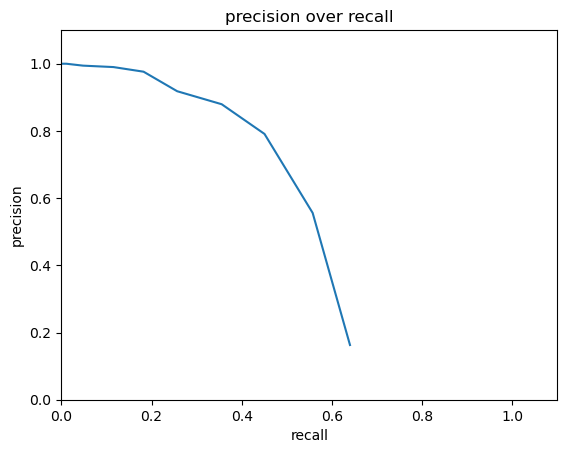

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.18it/s]


average train losses 1.0106941726472642
average test losses 2.361169567474952
average precision 0.46209409685900843
test_precision 0.7440846552811449
test_recall 0.28331729998396665
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.33it/s]


average train losses 0.9617705543835958
average test losses 2.3727349440256753
average precision 0.46181664573507175
test_precision 0.7397509186988817
test_recall 0.29723363056696395
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.90it/s]


average train losses 0.9411935806274414
average test losses 2.2994583918158487
average precision 0.4866522225936969
test_precision 0.7718875119522787
test_recall 0.28430324819213704
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 88.00it/s]


average train losses 0.9270810882250468
average test losses 2.3424511801483283
average precision 0.4045710378667866
test_precision 0.7563470032415309
test_recall 0.2744548661215328
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.62it/s]


average train losses 0.9907371004422506
average test losses 2.4112564656469555
average precision 0.40108446820037336
test_precision 0.7738237097260715
test_recall 0.2460626821737933
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 93.86it/s]


average train losses 0.94671012295617
average test losses 2.1959193863420405
average precision 0.4858003920317198
test_precision 0.7727642296713296
test_recall 0.2847309069531292
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.07it/s]


average train losses 0.9275688926378886
average test losses 2.312105132304026
average precision 0.4724563653880845
test_precision 0.7501950840383204
test_recall 0.2933272488828044
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 93.72it/s]


average train losses 0.8885190619362725
average test losses 2.127273017694468
average precision 0.4624606457745541
test_precision 0.7597524768365577
test_recall 0.29076879910213244
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 87.08it/s]


average train losses 0.8942212263743082
average test losses 2.2913057039945555
average precision 0.4341641753887578
test_precision 0.7737025968083273
test_recall 0.27282748116081446
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 87.29it/s]


average train losses 0.8770664797888862
average test losses 2.1609766906143255
average precision 0.43232266465501984
test_precision 0.7706863917613586
test_recall 0.27121181287847956
Epoch 86/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 90.39it/s]


average train losses 0.8290006319681803
average test losses 2.192451941321718
average precision 0.4767602547598664
test_precision 0.7615973408871624
test_recall 0.27776791110124444
Epoch 87/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 89.32it/s]


average train losses 0.7896002729733785
average test losses 2.135103629015789
average precision 0.45490526049966606
test_precision 0.7568225306825757
test_recall 0.2659882298771188
Epoch 88/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 93.29it/s]


average train losses 0.7662053108215332
average test losses 2.1779168049494424
average precision 0.47783350489186527
test_precision 0.7623104505180806
test_recall 0.3043278737723182
Epoch 89/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 86.54it/s]


average train losses 0.7526857058207194
average test losses 2.1599991780060988
average precision 0.454596091279299
test_precision 0.7699414782832124
test_recall 0.26617312728423836
Epoch 90/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.70it/s]


average train losses 0.7416068050596449
average test losses 2.1126336125906375
average precision 0.4781793204976736
test_precision 0.7367129558119315
test_recall 0.31929973318862204
Epoch 91/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.91it/s]


average train losses 0.7594824963145785
average test losses 2.2684343577789785
average precision 0.38981586749907976
test_precision 0.759236353666492
test_recall 0.2566045066045066
Epoch 92/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 97.96it/s]


average train losses 0.7555411987834506
average test losses 2.108313994360106
average precision 0.4673437712967628
test_precision 0.7817045172380799
test_recall 0.2852706963818075
Epoch 93/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 103.52it/s]


average train losses 0.7634522120157877
average test losses 2.023106723429471
average precision 0.41267885048456904
test_precision 0.789727574110941
test_recall 0.23231665453887676
Epoch 94/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 91.39it/s]


average train losses 0.7212968601120843
average test losses 2.231772794343128
average precision 0.39878253970254574
test_precision 0.7632331547468265
test_recall 0.24657009657009657
Epoch 95/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.63it/s]


average train losses 0.6830142206615872
average test losses 2.2697340502188754
average precision 0.4192319456311153
test_precision 0.7493411453213028
test_recall 0.2699523727301505
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.20it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.37it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.87it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.55it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.46it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.12it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.72it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.42it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 152.87it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.84it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.11it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.66it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 173.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.92it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.41it/s]

Max accuracy: 0.5474451429863716
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.72it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 137.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.80it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.94it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.62it/s]

Max accuracy: 0.5474451429863716
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.21it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.05it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.52it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.37it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.23it/s]

Max accuracy: 0.5592078837319143
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.29it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.29it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 43.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 41.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.78it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.62it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.03it/s]

Max accuracy: 0.5592078837319143
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5500)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:55<00:00,  6.33it/s]


average train losses 76.44742329915364
average test losses 73.89659540333979
average precision 0.10590759180650354
test_precision 0.2696779835807474
test_recall 0.2782294865628199
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.70it/s]


average train losses 64.14620929294162
average test losses 60.89112456232055
average precision 0.1521881546187769
test_precision 0.32458569855017544
test_recall 0.2925106786217897
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:48<00:00,  7.17it/s]


average train losses 54.16694005330404
average test losses 48.56061370284469
average precision 0.21076791258730718
test_precision 0.38642471345397
test_recall 0.3295722795722796
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.80it/s]


average train losses 45.02091725667318
average test losses 38.38816867187152
average precision 0.27547260694303255
test_precision 0.443472379584233
test_recall 0.3270269853603187
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:36<00:00,  9.54it/s]


average train losses 36.981327056884766
average test losses 30.579998532591382
average precision 0.26627318352043367
test_precision 0.49361064458875364
test_recall 0.2783773839329395
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.81it/s]


average train losses 29.573558807373047
average test losses 24.887564036920878
average precision 0.31795308571711794
test_precision 0.5240810759695629
test_recall 0.2962567268122824
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.96it/s]


average train losses 24.326682408650715
average test losses 21.743468800840894
average precision 0.31508762388882255
test_precision 0.5555981324553088
test_recall 0.28771054048831823
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.92it/s]


average train losses 20.493599361843533
average test losses 19.033916935282214
average precision 0.3071273141193227
test_precision 0.5762026241417464
test_recall 0.2738288460510683
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.04it/s]


average train losses 17.398758994208443
average test losses 16.861722546764927
average precision 0.39079235082974323
test_precision 0.6031334319692763
test_recall 0.2895343339787784
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.48it/s]


average train losses 15.12017822265625
average test losses 14.761178201420016
average precision 0.41316371023671644
test_precision 0.6195898424438769
test_recall 0.28480151535707093
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.54it/s]


average train losses 13.520948621961805
average test losses 13.558840409303324
average precision 0.37478409184536493
test_precision 0.6304495091808245
test_recall 0.27584843140398696
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.68it/s]


average train losses 11.981030993991428
average test losses 12.538093357683927
average precision 0.39543925258810037
test_precision 0.6372106624536458
test_recall 0.2840237951349063
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 13.37it/s]


average train losses 10.792879316541883
average test losses 11.53505100483908
average precision 0.400926234056528
test_precision 0.6382171869363206
test_recall 0.28693775360442025
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.03it/s]


average train losses 9.828217612372505
average test losses 10.396030267079672
average precision 0.39212332851509757
test_precision 0.6637525891402875
test_recall 0.2780725447392114
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.55it/s]


average train losses 9.02384122212728
average test losses 9.61922334877514
average precision 0.4391559331621606
test_precision 0.6660512212653602
test_recall 0.28140912585357036
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.05it/s]


average train losses 8.412362204657661
average test losses 9.106843790777049
average precision 0.40117721641758614
test_precision 0.6699647306839108
test_recall 0.27918439585106253
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.52it/s]


average train losses 7.771312130822076
average test losses 8.452332574078161
average precision 0.4548785693726019
test_precision 0.679264114415066
test_recall 0.2801083689972579
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.18it/s]


average train losses 7.313982433742947
average test losses 7.875718442802755
average precision 0.4200298324682093
test_precision 0.6853568145713336
test_recall 0.27450317172539396
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.31it/s]


average train losses 6.851304372151692
average test losses 7.518842218947886
average precision 0.4191019440502656
test_precision 0.6792925679415486
test_recall 0.29491629769407546
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 15.99it/s]


average train losses 6.478657351599799
average test losses 7.1791022115962795
average precision 0.4428604480890327
test_precision 0.6974977057322712
test_recall 0.2934590101256768
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.18it/s]


average train losses 6.109341091579861
average test losses 6.81748770037268
average precision 0.4350976553868117
test_precision 0.6900403672501926
test_recall 0.29458000846889737
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.71it/s]


average train losses 5.817233138614231
average test losses 6.346448330458073
average precision 0.4285926508251551
test_precision 0.7046630519830916
test_recall 0.2729086756864535
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.78it/s]


average train losses 5.505046579572889
average test losses 6.085429574689295
average precision 0.4712837766950116
test_precision 0.7078607033567124
test_recall 0.2924796397018619
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.73it/s]


average train losses 5.28074147966173
average test losses 5.9871974874425815
average precision 0.43264944370156755
test_precision 0.7048160208612521
test_recall 0.275652742319409
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.11it/s]

average train losses 5.0396378835042315
average test losses 5.755886640983429
average precision 0.4963442942313934
test_precision 0.6948476913924633
test_recall 0.30980562647229315


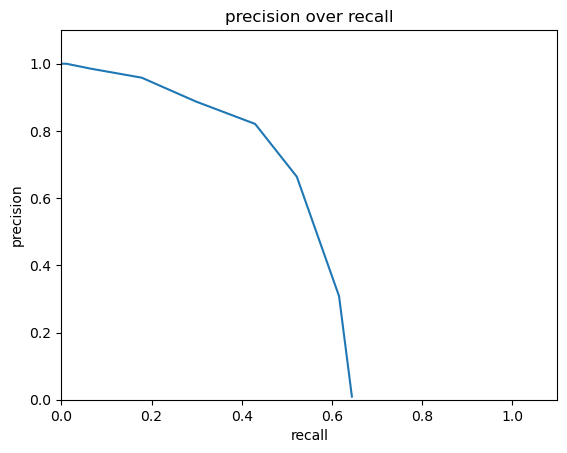

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 15.92it/s]


average train losses 4.859064367082384
average test losses 5.610370105488008
average precision 0.4397824162509006
test_precision 0.7131583959572225
test_recall 0.2819835514279959
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.14it/s]


average train losses 4.65805376900567
average test losses 5.256244024320206
average precision 0.43378353003947984
test_precision 0.7071825162969915
test_recall 0.28624225568670014
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.57it/s]


average train losses 4.480703247918023
average test losses 5.203665626015079
average precision 0.4647911961279155
test_precision 0.7096420898724323
test_recall 0.29390455223788553
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 19.29it/s]


average train losses 4.283178276485867
average test losses 4.819265076917121
average precision 0.46956309272893654
test_precision 0.7122410576662073
test_recall 0.3024363496585719
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.53it/s]


average train losses 4.116249349382189
average test losses 4.7075243084519
average precision 0.43306094449575705
test_precision 0.7054157465745988
test_recall 0.29450097227875005
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 21.29it/s]


average train losses 4.021862268447876
average test losses 4.660526319107099
average precision 0.44308630086856476
test_precision 0.701865837557512
test_recall 0.30709321542654877
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.05it/s]


average train losses 3.9160303274790444
average test losses 4.503523423121526
average precision 0.4506711035319195
test_precision 0.7239449101515668
test_recall 0.29661757995091326
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.63it/s]


average train losses 3.7830393844180636
average test losses 4.1921565980992765
average precision 0.5275765017678075
test_precision 0.7241024646382835
test_recall 0.3148127592572037
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.76it/s]


average train losses 3.715634372499254
average test losses 4.284378777202378
average precision 0.4513094710177785
test_precision 0.7250694299416535
test_recall 0.28645202534091424
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.60it/s]


average train losses 3.5825813081529407
average test losses 4.108282528032265
average precision 0.4394386412362522
test_precision 0.7117178163783177
test_recall 0.29409880243213576
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.67it/s]


average train losses 3.4609726534949408
average test losses 4.066975579302535
average precision 0.5338948949940083
test_precision 0.7198411845999763
test_recall 0.32226292226292225
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 32.96it/s]


average train losses 3.342177152633667
average test losses 3.7952168463302134
average precision 0.47241550565054025
test_precision 0.7263620569694267
test_recall 0.3136165275054164
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 35.07it/s]


average train losses 3.214084121916029
average test losses 3.778775039901081
average precision 0.5361963179566818
test_precision 0.7223475360584349
test_recall 0.325492203269981
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 37.14it/s]


average train losses 3.109434551662869
average test losses 3.8324612328129954
average precision 0.485350484475183
test_precision 0.7179596877784339
test_recall 0.3153283958839514
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.55it/s]


average train losses 3.0313812361823187
average test losses 3.6026163814414263
average precision 0.49996287047230614
test_precision 0.726827874538665
test_recall 0.3221551082662194
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.06it/s]


average train losses 2.9549014038509793
average test losses 3.6273999934182886
average precision 0.5261973026541792
test_precision 0.7142957853105532
test_recall 0.3323302212191101
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.83it/s]


average train losses 2.8792351881663003
average test losses 3.6697243903776857
average precision 0.439459448190396
test_precision 0.710960674508451
test_recall 0.3013960319515875
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.65it/s]


average train losses 2.7951922681596546
average test losses 3.614979056551246
average precision 0.46971107777525545
test_precision 0.7155040870531654
test_recall 0.3038711288711289
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.80it/s]


average train losses 2.715173112021552
average test losses 3.5445994386645805
average precision 0.44578212630007513
test_precision 0.7165905231667044
test_recall 0.29833952056174284
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 49.50it/s]


average train losses 2.6347000069088407
average test losses 3.3595857392688764
average precision 0.5311222975693771
test_precision 0.7218552918382577
test_recall 0.3295876962543629
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.94it/s]


average train losses 2.576176325480143
average test losses 3.2722640526600375
average precision 0.45239903006251225
test_precision 0.7202764502126688
test_recall 0.311283469616803
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.49it/s]


average train losses 2.521762079662747
average test losses 3.284033462532565
average precision 0.4975472012500784
test_precision 0.7271557498066982
test_recall 0.31952728341617226
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.97it/s]


average train losses 2.4342910713619657
average test losses 3.2025495665705104
average precision 0.5380188700133922
test_precision 0.7328906124070985
test_recall 0.3367178089400311
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.53it/s]


average train losses 2.394700951046414
average test losses 3.2890096474916506
average precision 0.4935412274606381
test_precision 0.7211329137500613
test_recall 0.32667178500511834
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.47it/s]


average train losses 2.327645672692193
average test losses 3.0260341428963207
average precision 0.4689735375288082
test_precision 0.7205819826776695
test_recall 0.3324994963883853


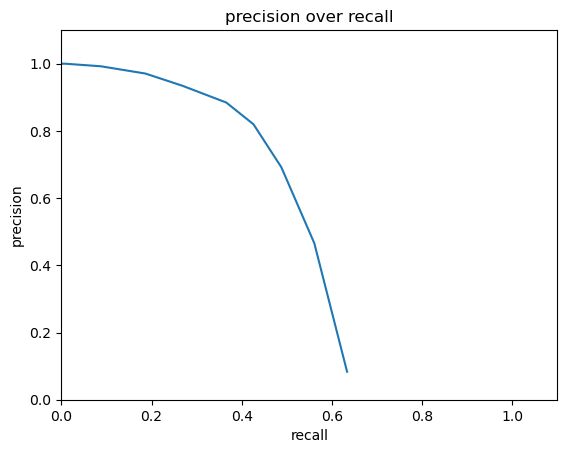

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.53it/s]


average train losses 2.3320806291368275
average test losses 3.0075761626588653
average precision 0.45563388707409336
test_precision 0.7352061168613818
test_recall 0.29047012658123766
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.55it/s]


average train losses 2.224024322297838
average test losses 3.0811870750199017
average precision 0.4419560405653547
test_precision 0.7138470185637042
test_recall 0.2996174607285718
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.66it/s]


average train losses 2.1283469994862876
average test losses 2.917566433251753
average precision 0.48685187182468453
test_precision 0.7157050019093688
test_recall 0.3309011975678642
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.79it/s]


average train losses 2.0549220111635
average test losses 3.0277145384383677
average precision 0.4925587663409685
test_precision 0.7236333487805952
test_recall 0.326559448781671
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.40it/s]


average train losses 1.9814637502034504
average test losses 2.801785125352039
average precision 0.47855410291739664
test_precision 0.733997414741546
test_recall 0.32223023889690555
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.90it/s]


average train losses 1.9243688450919256
average test losses 2.9522122474137875
average precision 0.4599506394010572
test_precision 0.7352356387536992
test_recall 0.2999655694100138
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.81it/s]


average train losses 1.8794021871354845
average test losses 3.014801672041586
average precision 0.4559310808452951
test_precision 0.7264021041465408
test_recall 0.29596370707481817
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.32it/s]


average train losses 1.8278091881010268
average test losses 2.870466124977481
average precision 0.4940420457820112
test_precision 0.7298938284827441
test_recall 0.33427035927035925
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.51it/s]


average train losses 1.7972549729877048
average test losses 2.8170387955472678
average precision 0.44602145516392805
test_precision 0.7151205916611707
test_recall 0.29388235221568554
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.77it/s]


average train losses 1.7937567498948839
average test losses 2.7185580754212166
average precision 0.47239383429303705
test_precision 0.7547465246599263
test_recall 0.2838328338328338
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.34it/s]


average train losses 1.7359451055526733
average test losses 2.7311397434299827
average precision 0.47967527317287256
test_precision 0.7382507678256092
test_recall 0.3267282100615434
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.30it/s]


average train losses 1.710795005162557
average test losses 2.6541979384218526
average precision 0.46365942181792996
test_precision 0.7540772483630176
test_recall 0.291263880152769
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.62it/s]


average train losses 1.6745686133702595
average test losses 2.6520222778673523
average precision 0.46690820656736665
test_precision 0.7283961923721751
test_recall 0.3201403534736868
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.72it/s]


average train losses 1.618033938937717
average test losses 2.8290684002417104
average precision 0.44952285332711295
test_precision 0.7256401646429432
test_recall 0.2910335549224438
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.91it/s]


average train losses 1.6621389786402385
average test losses 2.634327145043941
average precision 0.46753942986298025
test_precision 0.7481292226986233
test_recall 0.2874098124098124
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.71it/s]


average train losses 1.5631679826312594
average test losses 2.54932831936752
average precision 0.4661147252365094
test_precision 0.7286440081735125
test_recall 0.30226799949022176
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.45it/s]


average train losses 1.5010591083102756
average test losses 2.6829673934865883
average precision 0.5345318407379058
test_precision 0.7348023847212037
test_recall 0.34125730236841345
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.94it/s]


average train losses 1.4394084480073717
average test losses 2.795871555465579
average precision 0.4602125440127788
test_precision 0.7397337456403534
test_recall 0.2750528278306056
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.24it/s]


average train losses 1.412940714094374
average test losses 2.5894145344057655
average precision 0.46256445725346024
test_precision 0.7468750261190839
test_recall 0.2800856550856551
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.54it/s]


average train losses 1.3517228894763522
average test losses 2.5208815270000033
average precision 0.4630436738675355
test_precision 0.7371346035958467
test_recall 0.30058367558367555
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.01it/s]


average train losses 1.3175382084316678
average test losses 2.5510150533795697
average precision 0.48273705728791166
test_precision 0.75367892467263
test_recall 0.30555185555185554
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.31it/s]


average train losses 1.2871997753779094
average test losses 2.7855827161389537
average precision 0.45397067248271594
test_precision 0.7427864116958165
test_recall 0.3013898652787541
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.99it/s]


average train losses 1.223354246881273
average test losses 2.514766383714486
average precision 0.48360182031803
test_precision 0.7432276511589051
test_recall 0.32348731515398177
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.86it/s]


average train losses 1.1938383181889851
average test losses 2.4618408936381
average precision 0.46349539010916785
test_precision 0.7357281334001333
test_recall 0.3026550609883943
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.54it/s]

average train losses 1.163384543524848
average test losses 2.3483740064153644
average precision 0.45538869094855267
test_precision 0.7270678775679429
test_recall 0.30275218608551946


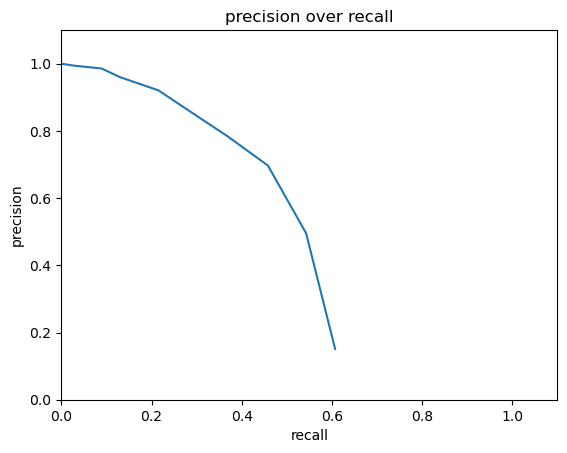

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.73it/s]


average train losses 1.1603433688481648
average test losses 2.462386313666645
average precision 0.4695942863945292
test_precision 0.7362709423461753
test_recall 0.3145151145151145
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 91.82it/s]


average train losses 1.1385129160351224
average test losses 2.3812874290678234
average precision 0.4759168140463776
test_precision 0.7603739187037529
test_recall 0.28345265845265843
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.36it/s]


average train losses 1.1087830066680908
average test losses 2.532813847234786
average precision 0.454571346385844
test_precision 0.7237505915299136
test_recall 0.31420503364947816
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 91.50it/s]


average train losses 1.082109014193217
average test losses 2.293905746563208
average precision 0.4640519379145637
test_precision 0.7411408611466098
test_recall 0.29764597542375315
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.71it/s]


average train losses 1.060845136642456
average test losses 2.3900224595328003
average precision 0.4588644707781917
test_precision 0.7377572966080486
test_recall 0.29676033842700505
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 96.13it/s]


average train losses 1.0335553354687161
average test losses 2.371991370478247
average precision 0.41333332008568324
test_precision 0.7674101559148823
test_recall 0.26511985956430395
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.05it/s]


average train losses 1.0417302979363336
average test losses 2.4802312458682265
average precision 0.40045690322368854
test_precision 0.7545440404971916
test_recall 0.2697529836418725
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 87.29it/s]


average train losses 1.0522394246525235
average test losses 2.477582727062736
average precision 0.4248509877487782
test_precision 0.7630544105671633
test_recall 0.2728685923130368
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.08it/s]


average train losses 1.0003528263833787
average test losses 2.4184513015624804
average precision 0.47036340813367983
test_precision 0.7375041417937138
test_recall 0.3057231862787418
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 141.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.03it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.21it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 148.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 146.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.46it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.56it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.58it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.94it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.88it/s]


Max accuracy: 0.5248386666888968
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.88it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:39<00:00, 10.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.29it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.80it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.05it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.14it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.86it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.66it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.41it/s]

Max accuracy: 0.5248386666888968
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.26it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.26it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.20it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.11it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.89it/s]

Max accuracy: 0.5261328477218469
With filter threshold: tensor(0.0500)
With NMS threshold: tensor(0.5500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 22.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.20it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 34.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 31.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.84it/s]

Max accuracy: 0.5357030673487291
With filter threshold: tensor(0.0750)
With NMS threshold: tensor(0.5250)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:46<00:00,  7.55it/s]


average train losses 70.98060777452257
average test losses 64.50145751866181
average precision 0.09979202673412418
test_precision 0.30796307014381363
test_recall 0.2597757181090514
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:46<00:00,  7.45it/s]


average train losses 59.19823286268446
average test losses 54.49429130010795
average precision 0.11985021246611369
test_precision 0.3620615283235155
test_recall 0.2994448966671189
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:42<00:00,  8.16it/s]


average train losses 50.06732304890951
average test losses 43.56221223488832
average precision 0.21015153240705173
test_precision 0.416739183773788
test_recall 0.3187201687201687
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:43<00:00,  8.08it/s]


average train losses 41.83900790744357
average test losses 35.2723079746605
average precision 0.22206230109843056
test_precision 0.46857300715977734
test_recall 0.27339615117392896
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00, 10.00it/s]


average train losses 34.68692186143663
average test losses 28.823431585589027
average precision 0.2966182690390726
test_precision 0.5128548051103716
test_recall 0.30568115012559455
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.76it/s]


average train losses 27.9422607421875
average test losses 23.63612088043126
average precision 0.27391208102359066
test_precision 0.5444169550185246
test_recall 0.26871821594043815
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.03it/s]


average train losses 23.003842883639866
average test losses 20.5706408709882
average precision 0.2921633382223081
test_precision 0.5719997826323556
test_recall 0.2765876099209433
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.72it/s]


average train losses 19.333936479356552
average test losses 18.121645506290967
average precision 0.3765172104430082
test_precision 0.5925611536615741
test_recall 0.29455523899968344
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.43it/s]


average train losses 16.517703374226887
average test losses 16.086630019706877
average precision 0.34161069140345623
test_precision 0.6095080073846473
test_recall 0.2703202147646592
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.19it/s]


average train losses 14.268234358893501
average test losses 14.19912386619807
average precision 0.3792817314222226
test_precision 0.6313583264553126
test_recall 0.2705528011083566
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 13.06it/s]


average train losses 12.574416054619682
average test losses 12.815271779682561
average precision 0.3983513057378806
test_precision 0.6379884698250742
test_recall 0.27811303922415037
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.65it/s]


average train losses 11.203086429172092
average test losses 11.46740172731231
average precision 0.3728447613373355
test_precision 0.6596356472013839
test_recall 0.2661656244989578
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.47it/s]


average train losses 10.18102741241455
average test losses 10.554420304094624
average precision 0.4472688733264906
test_precision 0.6726093545364527
test_recall 0.2729165895832562
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.36it/s]


average train losses 9.20825915866428
average test losses 9.840750910278059
average precision 0.37890445736627315
test_precision 0.6708451444644415
test_recall 0.26323275489942155
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.20it/s]


average train losses 8.456501219007704
average test losses 9.064901275852128
average precision 0.40103236542347953
test_precision 0.6750941429564035
test_recall 0.2658801075467742
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.63it/s]


average train losses 7.852645609113905
average test losses 8.45440596664733
average precision 0.41079026435826316
test_precision 0.6883424637834109
test_recall 0.2666189777300888
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.54it/s]


average train losses 7.270199616750081
average test losses 8.027682509517398
average precision 0.40636384846395757
test_precision 0.6796397076456192
test_recall 0.2706530095418984
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.75it/s]


average train losses 6.840935124291314
average test losses 7.323951615227593
average precision 0.4206769379080374
test_precision 0.6965013276054719
test_recall 0.2737480626369515
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.74it/s]


average train losses 6.419992340935601
average test losses 7.0739320227902835
average precision 0.4296780540306992
test_precision 0.70330363238869
test_recall 0.26412383912383913
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.60it/s]


average train losses 6.018050405714247
average test losses 6.634976919560011
average precision 0.4346539293989531
test_precision 0.7076227105054758
test_recall 0.28246650468872686
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 15.97it/s]


average train losses 5.721084753672282
average test losses 6.276678976509985
average precision 0.5011997528510391
test_precision 0.7102813197148945
test_recall 0.3030702836258392
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 15.92it/s]


average train losses 5.433108011881511
average test losses 6.076678658482695
average precision 0.4350527649182086
test_precision 0.708603561953982
test_recall 0.2900715539604429
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.15it/s]


average train losses 5.209243615468343
average test losses 5.884738330487852
average precision 0.5163359642473672
test_precision 0.723001231836173
test_recall 0.28915960582627254
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.02it/s]


average train losses 4.930833127763536
average test losses 5.5796598552638645
average precision 0.42762760421904084
test_precision 0.700249773634821
test_recall 0.28889813889813887
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.66it/s]

average train losses 4.725517961714003
average test losses 5.399375873413521
average precision 0.43194932485993115
test_precision 0.7047471452597508
test_recall 0.28238890738890743


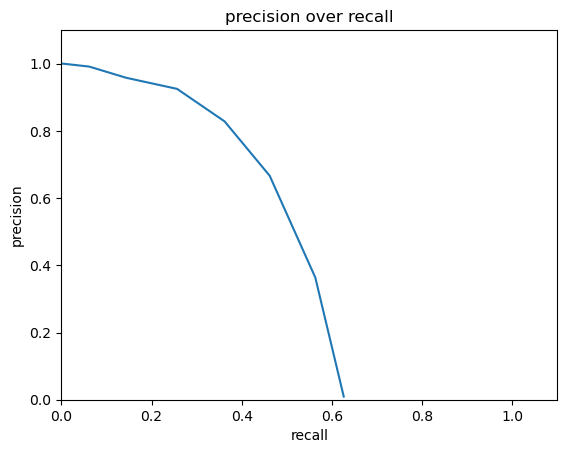

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.91it/s]


average train losses 4.567592355940077
average test losses 5.198492317797451
average precision 0.43146355681538595
test_precision 0.7041181459910016
test_recall 0.2773828023828024
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.78it/s]


average train losses 4.344074090321858
average test losses 5.039083151396183
average precision 0.45158228412642604
test_precision 0.7250204526715821
test_recall 0.28898303342747783
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.53it/s]


average train losses 4.177920712365045
average test losses 4.84081973377456
average precision 0.4574129309119158
test_precision 0.7302779244769876
test_recall 0.2803039553039553
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.64it/s]


average train losses 4.022751357820299
average test losses 4.495133069166091
average precision 0.5358506540283993
test_precision 0.724714027186417
test_recall 0.30852727519394185
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.08it/s]


average train losses 3.9346406194898815
average test losses 4.479634314181118
average precision 0.5026348604631432
test_precision 0.7140181034335091
test_recall 0.306078181078181
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 26.15it/s]


average train losses 3.801148679521349
average test losses 4.396983698222712
average precision 0.4925967494949168
test_precision 0.7062085502141947
test_recall 0.31114996114996113
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.23it/s]


average train losses 3.6262800958421497
average test losses 4.342271821111695
average precision 0.4707852456551082
test_precision 0.7154668700010266
test_recall 0.30909039520150633
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 30.57it/s]


average train losses 3.527899185816447
average test losses 4.1426708997145
average precision 0.44663734004815847
test_precision 0.7206486051892995
test_recall 0.29612804890582667
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.28it/s]


average train losses 3.4123911327785916
average test losses 4.034291652532724
average precision 0.5146998209527628
test_precision 0.7064719240396625
test_recall 0.3202954452954453
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.58it/s]


average train losses 3.3245245615641275
average test losses 3.94442601013727
average precision 0.5348146150864749
test_precision 0.7263470878697097
test_recall 0.33428495372939815
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.38it/s]


average train losses 3.201072507434421
average test losses 3.731672204797424
average precision 0.4452757633610274
test_precision 0.7199340773893594
test_recall 0.28900112233445563
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.06it/s]


average train losses 3.12569260597229
average test losses 3.836471424483166
average precision 0.4852764690272066
test_precision 0.7153473290356732
test_recall 0.31306728251172694
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.09it/s]


average train losses 3.0743692451053195
average test losses 3.7584753586695743
average precision 0.44989235271367906
test_precision 0.7236161753583983
test_recall 0.3122514316958761
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 40.53it/s]


average train losses 2.9647468990749783
average test losses 3.6824503209855823
average precision 0.5168699661470065
test_precision 0.7050790214876168
test_recall 0.33442730109396773
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.43it/s]


average train losses 2.8606753614213734
average test losses 3.5427511251210486
average precision 0.45726948977178467
test_precision 0.717351430919788
test_recall 0.3104204437537771
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.06it/s]


average train losses 2.776594294442071
average test losses 3.3924615165786527
average precision 0.5219971768408626
test_precision 0.7131097069774966
test_recall 0.33302129968796634
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.76it/s]


average train losses 2.736138449774848
average test losses 3.308527788884959
average precision 0.4613459180271391
test_precision 0.7377476600295382
test_recall 0.3016148460592905
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 49.25it/s]


average train losses 2.6435245672861734
average test losses 3.358249907819634
average precision 0.49024655290364855
test_precision 0.7192992902208712
test_recall 0.3222997167441612
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.41it/s]


average train losses 2.5624246067470975
average test losses 3.2035417393741445
average precision 0.48585089816328825
test_precision 0.7126611084346228
test_recall 0.3308085946974836
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.67it/s]


average train losses 2.497851610183716
average test losses 3.2365182087971616
average precision 0.485589658655263
test_precision 0.7220037301820292
test_recall 0.30713535435757655
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.27it/s]


average train losses 2.44598921140035
average test losses 3.181661027449149
average precision 0.5425342112684999
test_precision 0.7428653066226607
test_recall 0.3197357169579392
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.45it/s]


average train losses 2.3863861825731068
average test losses 3.21364658238881
average precision 0.44525190172502094
test_precision 0.7210669157376387
test_recall 0.2906737295626184
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.21it/s]


average train losses 2.3276179101732044
average test losses 3.207870023882287
average precision 0.454492836790561
test_precision 0.729336169232946
test_recall 0.3036403925292814
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.32it/s]


average train losses 2.2440017064412436
average test losses 2.93799181303747
average precision 0.46877262127556724
test_precision 0.7234850855824929
test_recall 0.30727472116361004
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.11it/s]

average train losses 2.1746913856930203
average test losses 2.9430935420202053
average precision 0.5178456259424311
test_precision 0.7143447644902571
test_recall 0.3270844381955493


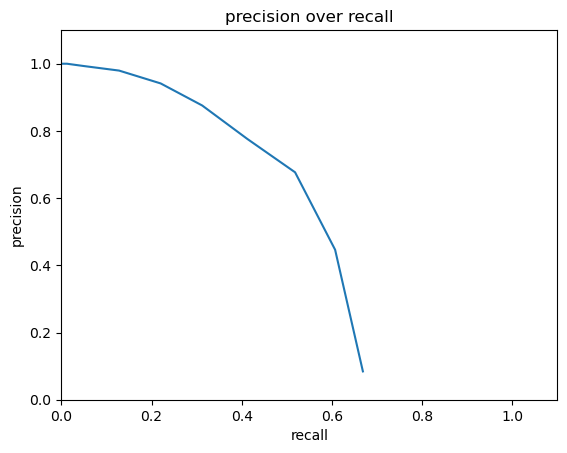

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.75it/s]


average train losses 2.091577821307712
average test losses 3.152628369480796
average precision 0.5125310961788382
test_precision 0.708914785014024
test_recall 0.35067360622916177
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.17it/s]


average train losses 2.0527258581585355
average test losses 2.870412686271885
average precision 0.45633783439423914
test_precision 0.7176850073448252
test_recall 0.31300006577784356
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.83it/s]


average train losses 1.9976455635494657
average test losses 2.9613346007474806
average precision 0.46797897472889516
test_precision 0.7272183536225415
test_recall 0.31324909658242983
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.09it/s]


average train losses 1.9526203738318548
average test losses 2.715665718089481
average precision 0.4724022200138363
test_precision 0.7248950859497092
test_recall 0.3124369457702791
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.25it/s]


average train losses 1.9213257498211331
average test losses 3.032579431846271
average precision 0.44833396225065897
test_precision 0.7227287389556531
test_recall 0.30672722339389
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.40it/s]


average train losses 1.851405143737793
average test losses 3.030554977237669
average precision 0.44011889387467523
test_precision 0.6969188807353477
test_recall 0.31898348565015233
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.59it/s]


average train losses 1.799529340532091
average test losses 2.7968861302758894
average precision 0.45781482669964
test_precision 0.7299665384917985
test_recall 0.3002136752136752
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.00it/s]


average train losses 1.7806788550482855
average test losses 2.8390553622503907
average precision 0.45152427934840333
test_precision 0.7222531529253965
test_recall 0.3112192334414557
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.62it/s]


average train losses 1.6982367833455403
average test losses 2.6371380895630927
average precision 0.48050897030914735
test_precision 0.7376438130192253
test_recall 0.3285449118782452
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.19it/s]


average train losses 1.6440172327889337
average test losses 2.749695211733848
average precision 0.456366575682291
test_precision 0.7165989591445312
test_recall 0.3092321258987925
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.77it/s]


average train losses 1.5847711165746052
average test losses 2.810496555434333
average precision 0.4546124230450493
test_precision 0.7001092771357573
test_recall 0.3157684907684908
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.27it/s]


average train losses 1.555945912996928
average test losses 2.718938847892305
average precision 0.4310836527425494
test_precision 0.7147920117336437
test_recall 0.2802522580300358
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.88it/s]


average train losses 1.500317891438802
average test losses 2.654758083514678
average precision 0.45836199476043
test_precision 0.7342308977037589
test_recall 0.29298869854425413
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.43it/s]


average train losses 1.4544478389951918
average test losses 2.6406225285299145
average precision 0.45523446983569843
test_precision 0.7161704678476724
test_recall 0.31039978539978536
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.50it/s]


average train losses 1.4104552931255765
average test losses 2.4378872017914754
average precision 0.467874596854035
test_precision 0.7405966833783348
test_recall 0.3018649046426824
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.02it/s]


average train losses 1.3901052607430353
average test losses 2.6190927341113404
average precision 0.46046622216676686
test_precision 0.7375514069703675
test_recall 0.28760714594047926
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.73it/s]


average train losses 1.3534860213597615
average test losses 2.652701276489812
average precision 0.41373966554932795
test_precision 0.7401990267243342
test_recall 0.2718564357453246
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.65it/s]


average train losses 1.3157572878731623
average test losses 2.5433217653861413
average precision 0.4838797392708031
test_precision 0.7484395770235623
test_recall 0.30723556279111836
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.82it/s]


average train losses 1.2882714404000177
average test losses 2.5378059721060966
average precision 0.45266688552230666
test_precision 0.7332455640336494
test_recall 0.28077560299782517
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.21it/s]


average train losses 1.274029082722134
average test losses 2.6453008872491344
average precision 0.4020408538402728
test_precision 0.7286790304784494
test_recall 0.27124007679563233
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 91.09it/s]


average train losses 1.253276162677341
average test losses 2.502076056947735
average precision 0.42185195434644707
test_precision 0.7798334789946383
test_recall 0.25679999013332344
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.84it/s]


average train losses 1.2708850304285686
average test losses 2.511719947526937
average precision 0.47804866960828607
test_precision 0.7612727474222835
test_recall 0.30300399189288074
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 86.90it/s]


average train losses 1.2369754314422607
average test losses 2.4021033131838525
average precision 0.46545725077740857
test_precision 0.7487249239381175
test_recall 0.28987483709705936
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.05it/s]


average train losses 1.1921776135762532
average test losses 2.5533159898217246
average precision 0.40826430238923384
test_precision 0.7320978652972232
test_recall 0.27355052355052356
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.23it/s]


average train losses 1.1450326840082805
average test losses 2.4463138235600246
average precision 0.4621632100666758
test_precision 0.7296356835279937
test_recall 0.31458078958078955


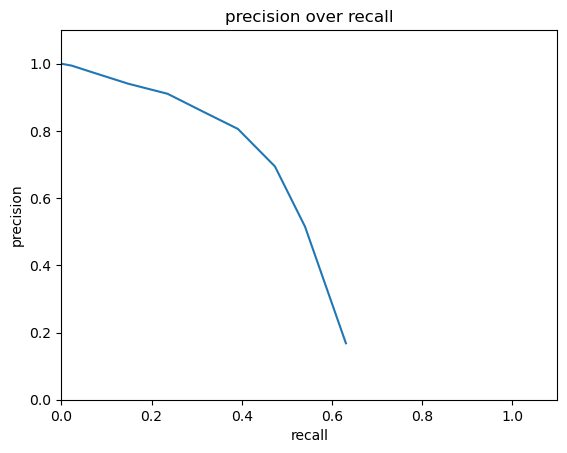

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 82.27it/s]


average train losses 1.0871887471940782
average test losses 2.4300676078198644
average precision 0.411237404946735
test_precision 0.736576093944249
test_recall 0.28104549771216436
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 90.69it/s]


average train losses 1.0699151092105441
average test losses 2.4100867971735465
average precision 0.43462773528536724
test_precision 0.7725129981706301
test_recall 0.2661000522111633
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.55it/s]


average train losses 1.0284932057062786
average test losses 2.386902923767383
average precision 0.46511343948959694
test_precision 0.741398844657764
test_recall 0.30808738586516365
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.97it/s]


average train losses 1.0071568025483026
average test losses 2.3096631187998673
average precision 0.4669198301270327
test_precision 0.7437355257054862
test_recall 0.3152805013916125
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 86.09it/s]


average train losses 0.9667805896864997
average test losses 2.2169886696712244
average precision 0.45372317637287923
test_precision 0.7315919674119636
test_recall 0.2946729196729197
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 90.23it/s]


average train losses 0.9580435752868652
average test losses 2.42456817576009
average precision 0.4777491747741699
test_precision 0.7549249330658324
test_recall 0.29476613921058364
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.88it/s]


average train losses 0.9459770851665072
average test losses 2.49522971410697
average precision 0.39036279486295444
test_precision 0.7324740797319746
test_recall 0.27063903175014287
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.69it/s]


average train losses 0.9184198379516602
average test losses 2.368441801295321
average precision 0.3882667945229391
test_precision 0.7516799083464093
test_recall 0.2411341744675078
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 89.64it/s]


average train losses 0.8861362735430399
average test losses 2.288244160831484
average precision 0.46644950134205376
test_precision 0.7433205209339087
test_recall 0.30097772597772593
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.58it/s]


average train losses 0.8698722256554497
average test losses 2.295612906288897
average precision 0.453121192065245
test_precision 0.7295996908039903
test_recall 0.29206873373540043
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.26it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.90it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 138.64it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.95it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 152.57it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 152.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 144.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.80it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.26it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.86it/s]

Max accuracy: 0.524114323586221
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.92it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.79it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.34it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.56it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.78it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.02it/s]

Max accuracy: 0.524114323586221
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.62it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 32.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.34it/s]

Max accuracy: 0.524114323586221
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 22.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.86it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.37it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.90it/s]

Max accuracy: 0.5299812391506104
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5750)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:57<00:00,  6.04it/s]


average train losses 66.67897033691406
average test losses 61.50337520284191
average precision 0.13079052234843822
test_precision 0.30539638740860836
test_recall 0.28449893727671505
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:49<00:00,  7.05it/s]


average train losses 54.87334187825521
average test losses 49.605882008870445
average precision 0.2012688977824255
test_precision 0.3635679330806241
test_recall 0.33904459737793075
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:41<00:00,  8.41it/s]


average train losses 45.81715562608507
average test losses 39.068065002093626
average precision 0.2545074847035961
test_precision 0.42819678027196734
test_recall 0.3294128710795377
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.86it/s]


average train losses 37.83794487847222
average test losses 31.41996206517233
average precision 0.271209941534144
test_precision 0.4667657810220484
test_recall 0.28669499225054784
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:36<00:00,  9.65it/s]


average train losses 30.966722700330948
average test losses 25.914699157758317
average precision 0.2947553278015118
test_precision 0.5094246079183976
test_recall 0.2972759750537528
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.33it/s]


average train losses 24.59460406833225
average test losses 20.894539248909368
average precision 0.31090224058248156
test_precision 0.5557577593977153
test_recall 0.2867960229071341
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.93it/s]


average train losses 20.078006956312393
average test losses 18.272482312302984
average precision 0.35195613578638557
test_precision 0.5771114153004807
test_recall 0.27971853249631023
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.09it/s]


average train losses 16.753828896416557
average test losses 15.695210234052436
average precision 0.32667224098318043
test_precision 0.5928092789826062
test_recall 0.2757958091291424
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.72it/s]


average train losses 14.20547898610433
average test losses 13.876770731390712
average precision 0.36308482500221434
test_precision 0.6179329305244292
test_recall 0.2749377166043833
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.41it/s]


average train losses 12.265749507480198
average test losses 12.401151809257659
average precision 0.30017002906762397
test_precision 0.6322945942568652
test_recall 0.25071615627171184
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.43it/s]


average train losses 10.755872302585178
average test losses 11.0927375266355
average precision 0.36907660124716757
test_precision 0.6481313639337578
test_recall 0.258542280764503
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.85it/s]


average train losses 9.60963577694363
average test losses 10.094088074828145
average precision 0.41267234334883063
test_precision 0.6553611397233448
test_recall 0.27526455026455027
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.89it/s]


average train losses 8.656590673658583
average test losses 9.407684629119698
average precision 0.37933416264325487
test_precision 0.6640283150456973
test_recall 0.2740452962675185
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.35it/s]


average train losses 7.87753332985772
average test losses 8.53690770005229
average precision 0.36443151236598265
test_precision 0.6700990049195821
test_recall 0.2649235538124427
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.65it/s]


average train losses 7.333568361070421
average test losses 8.170240150897252
average precision 0.3994505446934955
test_precision 0.6733304018298777
test_recall 0.2572878767323212
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.72it/s]


average train losses 6.782021151648627
average test losses 7.51469856653458
average precision 0.40524658012293213
test_precision 0.6827181852212066
test_recall 0.2699498032831366
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.99it/s]


average train losses 6.2977681159973145
average test losses 6.960358811239911
average precision 0.42714277064098205
test_precision 0.6907422543281024
test_recall 0.2757569590902924
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.31it/s]


average train losses 5.987086508009169
average test losses 6.737666344710565
average precision 0.40055099789303517
test_precision 0.7010631653862401
test_recall 0.25193551304662415
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 15.97it/s]


average train losses 5.600996918148464
average test losses 6.23943561026853
average precision 0.4204009087154938
test_precision 0.7010228303980104
test_recall 0.2632836299502966
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.15it/s]


average train losses 5.300226635403103
average test losses 5.862419732955106
average precision 0.4290266203918723
test_precision 0.7022762741594282
test_recall 0.2674923841590508
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.56it/s]


average train losses 5.057670699225532
average test losses 5.679474690700868
average precision 0.4196216086963945
test_precision 0.7050268584613476
test_recall 0.2676637148859371
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.65it/s]


average train losses 4.802998436821832
average test losses 5.573918952561511
average precision 0.4289871216441083
test_precision 0.7123417785643359
test_recall 0.2591616202727314
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.62it/s]


average train losses 4.5942840576171875
average test losses 4.979557214639126
average precision 0.42714723094141055
test_precision 0.7109961088635088
test_recall 0.26624579124579123
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.45it/s]


average train losses 4.418423175811768
average test losses 4.81914068762733
average precision 0.4323545506874227
test_precision 0.7177000631555331
test_recall 0.27766400266400265
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.12it/s]


average train losses 4.238915761311849
average test losses 4.7825215107355366
average precision 0.5084609892995787
test_precision 0.7164597141497907
test_recall 0.288591860814083


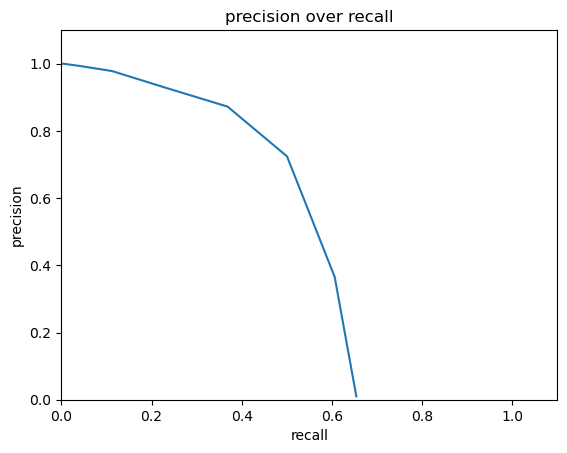

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.37it/s]


average train losses 4.101408057742649
average test losses 4.684823726996397
average precision 0.44285521846093334
test_precision 0.7162462413464455
test_recall 0.28366746422301975
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.36it/s]


average train losses 3.9246492120954724
average test losses 4.632836698466896
average precision 0.43587992270393733
test_precision 0.7080321625555547
test_recall 0.2836208030652475
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.70it/s]


average train losses 3.800869279437595
average test losses 4.294459658810216
average precision 0.4452730015006034
test_precision 0.7186722406347691
test_recall 0.2681294014627348
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.21it/s]


average train losses 3.6731761031680636
average test losses 4.269585822042917
average precision 0.4331453994116899
test_precision 0.7062396289194377
test_recall 0.2830668302890525
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 19.26it/s]


average train losses 3.564587354660034
average test losses 4.233198260310029
average precision 0.43562049219092197
test_precision 0.7086980892243214
test_recall 0.28166987333654003
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.87it/s]


average train losses 3.448460234536065
average test losses 3.952626072103821
average precision 0.4171856219134536
test_precision 0.7041902597520635
test_recall 0.2683720600387267
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.12it/s]


average train losses 3.3477872212727866
average test losses 4.018749710501429
average precision 0.49602110602670507
test_precision 0.6971035822316975
test_recall 0.3185730935730936
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 26.19it/s]


average train losses 3.24315963851081
average test losses 3.8613781976563977
average precision 0.4375414871601327
test_precision 0.7111290720696515
test_recall 0.2897055619277842
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.75it/s]


average train losses 3.1138738526238336
average test losses 3.855748639826761
average precision 0.44035897566470616
test_precision 0.7142018933189791
test_recall 0.2983030344141455
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.34it/s]


average train losses 3.046243906021118
average test losses 3.576005735288658
average precision 0.4417536296992839
test_precision 0.7150652279533984
test_recall 0.28698451754007315
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.34it/s]


average train losses 2.9611829651726618
average test losses 3.689363844374306
average precision 0.4580783180058505
test_precision 0.7080720946783025
test_recall 0.3078343467232356
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.92it/s]


average train losses 2.8972289032406278
average test losses 3.411329553337858
average precision 0.466976202766549
test_precision 0.7179549298111149
test_recall 0.3052601719268386
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.17it/s]


average train losses 2.8333619170718722
average test losses 3.5360817776785956
average precision 0.4366241634582418
test_precision 0.7124263468523078
test_recall 0.2803963526185748
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.27it/s]


average train losses 2.7431203259362116
average test losses 3.5283844756264973
average precision 0.44610604000283427
test_precision 0.7196901906586453
test_recall 0.28412184523295636
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.71it/s]


average train losses 2.691435363557604
average test losses 3.2131974337107776
average precision 0.5303986614801398
test_precision 0.7264634333641049
test_recall 0.3250717389606278
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 45.60it/s]


average train losses 2.6168948544396295
average test losses 3.3285054960142175
average precision 0.46555199322969737
test_precision 0.7280300428386542
test_recall 0.3163862886085108
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.57it/s]


average train losses 2.5190281603071423
average test losses 3.1245448416114874
average precision 0.4525042188398977
test_precision 0.7284190721749593
test_recall 0.3010798871909983
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.44it/s]


average train losses 2.441651635699802
average test losses 3.2607125553310428
average precision 0.48703037755250733
test_precision 0.7116400491742079
test_recall 0.3204362509918066
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.61it/s]


average train losses 2.4004669189453125
average test losses 3.167263617542734
average precision 0.44256137291387865
test_precision 0.7186535611087665
test_recall 0.28011741345074676
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.11it/s]


average train losses 2.3624992105695934
average test losses 3.0974890880095654
average precision 0.4914589519893772
test_precision 0.7193360714348657
test_recall 0.31919119974675536
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.45it/s]


average train losses 2.305031034681532
average test losses 2.95087574010561
average precision 0.4561286596048175
test_precision 0.7345072850500844
test_recall 0.2835477279921724
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.60it/s]


average train losses 2.2315117518107095
average test losses 2.9930789402747084
average precision 0.4647504577543383
test_precision 0.7133662183579368
test_recall 0.31403041403041404
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.79it/s]


average train losses 2.1561083793640137
average test losses 2.9945886138497593
average precision 0.4425825680307597
test_precision 0.7112007774510388
test_recall 0.30984385984385987
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.09it/s]


average train losses 2.0965560939576893
average test losses 2.909845937011588
average precision 0.4488296382033345
test_precision 0.7230784327861068
test_recall 0.29475329197551414
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.36it/s]

average train losses 2.0409662326176963
average test losses 2.937636298671407
average precision 0.47679282969290476
test_precision 0.7515416208033093
test_recall 0.29542504820282595


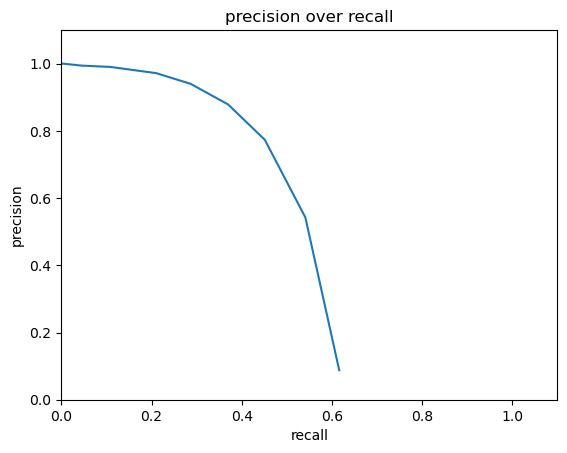

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.65it/s]


average train losses 1.990229116545783
average test losses 2.7964270940193763
average precision 0.48965104367794066
test_precision 0.715747667975628
test_recall 0.32913701524812633
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.68it/s]


average train losses 1.9136057032479181
average test losses 2.807728664487855
average precision 0.4521376156869846
test_precision 0.7194574131451175
test_recall 0.3056328445217334
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.59it/s]


average train losses 1.8554602728949652
average test losses 2.8284242951292597
average precision 0.4530189941176756
test_precision 0.7224175136280857
test_recall 0.30033371977816425
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 58.21it/s]


average train losses 1.8241058323118422
average test losses 2.810099757295049
average precision 0.4407217670725704
test_precision 0.7079543078764227
test_recall 0.31003728781506557
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.40it/s]


average train losses 1.7841533290015326
average test losses 2.644671067892656
average precision 0.45502758243728714
test_precision 0.7310690182116598
test_recall 0.3040627068404846
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.26it/s]


average train losses 1.7357322374979656
average test losses 2.6763163492550537
average precision 0.4547803371310179
test_precision 0.7329090010194533
test_recall 0.2903852320518987
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.62it/s]


average train losses 1.6645511123869154
average test losses 2.641818465330662
average precision 0.46884035049659095
test_precision 0.7187566533006804
test_recall 0.3222820389487056
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.72it/s]


average train losses 1.652522365252177
average test losses 2.67666390308967
average precision 0.4481306723219493
test_precision 0.7081690931456014
test_recall 0.3216475910920355
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.82it/s]


average train losses 1.603275736172994
average test losses 2.7717390614017803
average precision 0.44950204312023095
test_precision 0.724745017731199
test_recall 0.28191273746829304
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.54it/s]


average train losses 1.5753554503122966
average test losses 2.6841718990918237
average precision 0.4353633591178726
test_precision 0.7225368930041427
test_recall 0.2727968533524089
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.12it/s]


average train losses 1.5640221304363675
average test losses 2.630981698335066
average precision 0.39932790420390857
test_precision 0.7483091698518408
test_recall 0.26434491434491436
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.67it/s]


average train losses 1.5288666089375813
average test losses 2.6077720585711663
average precision 0.4333047885188966
test_precision 0.7311903732139547
test_recall 0.2741688352799464
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.87it/s]


average train losses 1.4624646504720051
average test losses 2.6655159112055418
average precision 0.4421227706461732
test_precision 0.7160751860996182
test_recall 0.2830449386004942
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.62it/s]


average train losses 1.402380969789293
average test losses 2.630070996420336
average precision 0.39046581313072903
test_precision 0.7309022131007318
test_recall 0.2639184889184889
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.35it/s]


average train losses 1.3588392204708524
average test losses 2.6402367601367485
average precision 0.46187898591232196
test_precision 0.7421432880537828
test_recall 0.29005521227743447
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.93it/s]


average train losses 1.3023960722817316
average test losses 2.554501181993729
average precision 0.44017101419976323
test_precision 0.7270856847524296
test_recall 0.2932018598685266
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.77it/s]


average train losses 1.3010109530554876
average test losses 2.5191518966628617
average precision 0.4507376529888438
test_precision 0.7417763099957428
test_recall 0.2759315787093565
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.75it/s]


average train losses 1.2649243010414972
average test losses 2.595388484646452
average precision 0.450439210080331
test_precision 0.7070190499415405
test_recall 0.3103092380870158
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.09it/s]


average train losses 1.251292692290412
average test losses 2.549844616159075
average precision 0.42345247653876933
test_precision 0.7009698683567971
test_recall 0.3008399008399008
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.28it/s]


average train losses 1.2227634853786893
average test losses 2.3757456935029424
average precision 0.46612384458953665
test_precision 0.7490240272852253
test_recall 0.29901281845726296
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.04it/s]


average train losses 1.1736554967032538
average test losses 2.446631576940205
average precision 0.46208315804644806
test_precision 0.7399146595218921
test_recall 0.29022017077572637
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.74it/s]


average train losses 1.1307656897438898
average test losses 2.4011083452450244
average precision 0.37268881527227377
test_precision 0.7057083211782683
test_recall 0.27769164991387213
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 86.25it/s]


average train losses 1.0976094669765897
average test losses 2.3102869749748467
average precision 0.4662877391926202
test_precision 0.740814536371773
test_recall 0.30141319585764026
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.14it/s]


average train losses 1.053196496433682
average test losses 2.6243679620261884
average precision 0.3988267137540846
test_precision 0.7196896411299213
test_recall 0.28116204782871446
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.86it/s]

average train losses 1.042680349614885
average test losses 2.3998664948675366
average precision 0.4265735200078634
test_precision 0.7042154559460402
test_recall 0.2932381404603627


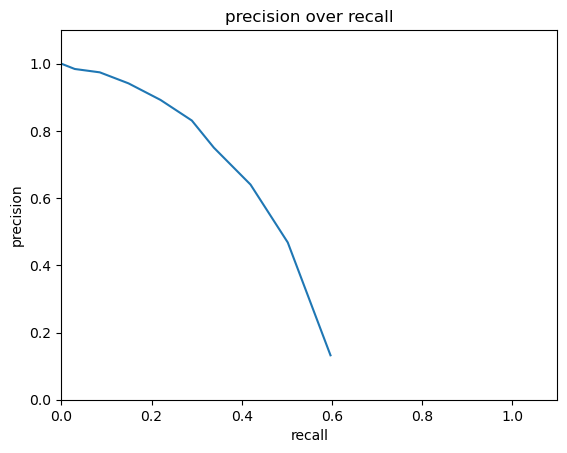

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.48it/s]


average train losses 0.9945061736636691
average test losses 2.490865270126919
average precision 0.44265678420690074
test_precision 0.72693485604073
test_recall 0.2924320535431647
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.29it/s]


average train losses 0.9874583615197076
average test losses 2.4668866961430282
average precision 0.394218349417875
test_precision 0.7406019959116918
test_recall 0.26121635566080015
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.74it/s]


average train losses 0.9953628579775492
average test losses 2.3882826099708208
average precision 0.4421687340976384
test_precision 0.7328215963438369
test_recall 0.27445887445887446
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.69it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.95it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.05it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.46it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.94it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.12it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 158.84it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.66it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 150.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.18it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.57it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 174.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.05it/s]

Max accuracy: 0.47863093081352664
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.8000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.20it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:53<00:00,  8.78it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.61it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.66it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.99it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.59it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.44it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.99it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.29it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.58it/s]

Max accuracy: 0.4842905785481944
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.7000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 15.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 11.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.78it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.05it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.56it/s]

Max accuracy: 0.4842905785481944
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.7000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00, 15.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 14.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 13.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 11.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.21it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 12.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 62.82it/s]

Max accuracy: 0.484299438540152
With filter threshold: tensor(0.0250)
With NMS threshold: tensor(0.7000)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:53<00:00,  6.53it/s]


average train losses 65.10023922390408
average test losses 60.44406403979005
average precision 0.1408574567890322
test_precision 0.31909096177083357
test_recall 0.2997338052893609
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:48<00:00,  7.23it/s]


average train losses 53.66186862521701
average test losses 48.727033479261266
average precision 0.13477979884852898
test_precision 0.3718045796592448
test_recall 0.3180990819879709
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:41<00:00,  8.40it/s]


average train losses 44.85055796305338
average test losses 38.34892355003248
average precision 0.23954878852592107
test_precision 0.43363641375443157
test_recall 0.3164600831267498
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.06it/s]


average train losses 36.988457149929474
average test losses 30.76773999423383
average precision 0.25572926037262067
test_precision 0.48667663455783616
test_recall 0.3043757682646571
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:33<00:00, 10.50it/s]


average train losses 30.253302892049152
average test losses 25.09576583384109
average precision 0.26380262483213845
test_precision 0.5208537278733109
test_recall 0.30748397692842133
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.13it/s]


average train losses 24.0418512556288
average test losses 20.694491649964597
average precision 0.316215448229032
test_precision 0.5563381235117218
test_recall 0.2721308526864082
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.41it/s]


average train losses 19.648576524522568
average test losses 17.76056796668941
average precision 0.373849510630051
test_precision 0.5918406285490379
test_recall 0.2888968027856917
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.42it/s]


average train losses 16.353797064887154
average test losses 15.401153977440293
average precision 0.33315421187233685
test_precision 0.6152749711978439
test_recall 0.26894946617168836
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:29<00:00, 11.73it/s]


average train losses 13.881281534830729
average test losses 13.442063481040151
average precision 0.37359604816276376
test_precision 0.634867792557218
test_recall 0.2703206258761814
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.89it/s]


average train losses 12.042324278089735
average test losses 12.071077599484695
average precision 0.4137539360151877
test_precision 0.6516733061856483
test_recall 0.28656723934501716
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.35it/s]


average train losses 10.619669490390354
average test losses 10.874895804967636
average precision 0.42640875379953225
test_precision 0.6642217189652647
test_recall 0.2719707247485026
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.64it/s]


average train losses 9.47345044877794
average test losses 9.885529543939139
average precision 0.3858216349431725
test_precision 0.6616477430671348
test_recall 0.2707135457135457
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.09it/s]


average train losses 8.663642247517904
average test losses 9.211649889280313
average precision 0.3988299547102342
test_precision 0.6725383311463415
test_recall 0.26902048568715237
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.42it/s]


average train losses 7.929088963402642
average test losses 8.543530059336257
average precision 0.4137389247398336
test_precision 0.6788265012605185
test_recall 0.2837199837199837
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.28it/s]


average train losses 7.2832704650031195
average test losses 7.928805424616887
average precision 0.47207147786921183
test_precision 0.6908980800179106
test_recall 0.28537182981627424
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.23it/s]


average train losses 6.826849672529432
average test losses 7.483327103476239
average precision 0.3891791823237845
test_precision 0.6900596593452613
test_recall 0.26194988139432585
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.37it/s]


average train losses 6.322639200422499
average test losses 7.064901533969108
average precision 0.43638055337709963
test_precision 0.7009885807564048
test_recall 0.2746915635804525
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.31it/s]


average train losses 5.965230147043864
average test losses 6.471118638997743
average precision 0.4242118611577153
test_precision 0.707190689894868
test_recall 0.26447749781083113
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.26it/s]


average train losses 5.652603997124566
average test losses 6.3062983876959215
average precision 0.43159385166260383
test_precision 0.7127577092110075
test_recall 0.26497422330755666
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.82it/s]


average train losses 5.342735661400689
average test losses 5.946348076192741
average precision 0.43497258588600923
test_precision 0.7170309537157024
test_recall 0.25734193789749343
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.06it/s]


average train losses 5.118869092729357
average test losses 5.700398845210714
average precision 0.42757505568978244
test_precision 0.7119084301027273
test_recall 0.27360304304748745
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.03it/s]


average train losses 4.88058254453871
average test losses 5.453982262190251
average precision 0.4397261883076583
test_precision 0.7200942922154012
test_recall 0.26667468334134997
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.34it/s]


average train losses 4.6524463229709205
average test losses 5.416115008188449
average precision 0.419784992217895
test_precision 0.702246806903534
test_recall 0.27207966930189154
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.34it/s]


average train losses 4.448526011572944
average test losses 5.023881742417642
average precision 0.44250290493697375
test_precision 0.7154277131920068
test_recall 0.2841340758007424
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.89it/s]

average train losses 4.2423415713840065
average test losses 4.862617716830001
average precision 0.43943242427921836
test_precision 0.7125178557497361
test_recall 0.27661792939570723


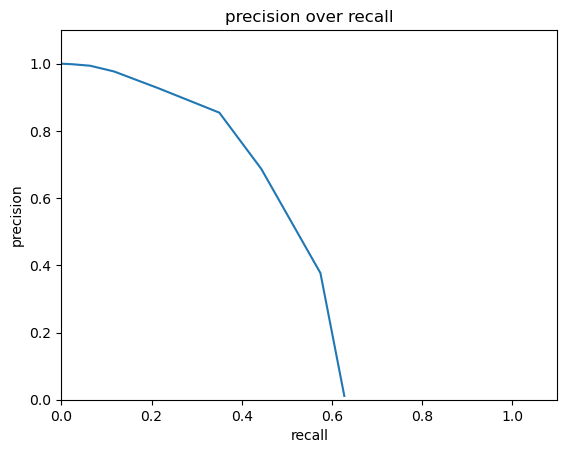

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.97it/s]


average train losses 4.082433170742458
average test losses 4.699462112877783
average precision 0.4416135071967002
test_precision 0.7146621376649759
test_recall 0.29264819542597315
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.75it/s]


average train losses 3.9492682880825467
average test losses 4.432348317909784
average precision 0.4571425009192398
test_precision 0.7297998928584211
test_recall 0.28013981902870794
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.17it/s]


average train losses 3.787459373474121
average test losses 4.468243517427363
average precision 0.4564960146003163
test_precision 0.7296840775022995
test_recall 0.2866774172329728
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.17it/s]


average train losses 3.665487289428711
average test losses 4.381746383134456
average precision 0.44937433479014444
test_precision 0.7243137842206647
test_recall 0.2688453521786855
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 28.15it/s]


average train losses 3.553380913204617
average test losses 4.175098001447498
average precision 0.4441156833503065
test_precision 0.7175656436227158
test_recall 0.27521634743856965
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 31.52it/s]


average train losses 3.4330150021447077
average test losses 3.972424030303955
average precision 0.4514287143029316
test_precision 0.7281344325362838
test_recall 0.27495580551136106
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 32.03it/s]


average train losses 3.329835891723633
average test losses 3.995512806791865
average precision 0.43661239843333705
test_precision 0.7107379587348109
test_recall 0.3008222230444452
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 35.71it/s]


average train losses 3.2461663087209067
average test losses 3.8339688431503425
average precision 0.4403897025881225
test_precision 0.7140807231430436
test_recall 0.26631239131239126
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 35.32it/s]


average train losses 3.1654921107821994
average test losses 3.7581590016682944
average precision 0.44739914122615454
test_precision 0.7216494066618973
test_recall 0.2851203323425545
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 39.53it/s]


average train losses 3.073017703162299
average test losses 3.6750949461575586
average precision 0.45336456109879053
test_precision 0.7282110229305138
test_recall 0.3026335804113582
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.64it/s]


average train losses 2.971286906136407
average test losses 3.5767089987752105
average precision 0.45735277448917716
test_precision 0.7328738419729056
test_recall 0.28714228158672606
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.17it/s]


average train losses 2.8689158227708607
average test losses 3.5693120728870404
average precision 0.4517128213855266
test_precision 0.7265392348128031
test_recall 0.2980144341255452
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.06it/s]


average train losses 2.800122128592597
average test losses 3.321035666683121
average precision 0.45904302542580505
test_precision 0.7319450270961475
test_recall 0.3029532196198863
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 45.82it/s]


average train losses 2.729190879397922
average test losses 3.4435385098824134
average precision 0.43930065672719293
test_precision 0.7146702899624522
test_recall 0.29571231237897905
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.07it/s]


average train losses 2.6735245916578503
average test losses 3.389034465507225
average precision 0.4695176498586926
test_precision 0.7193130035382124
test_recall 0.3027224832780388
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 49.42it/s]


average train losses 2.5903755823771157
average test losses 3.4133360997224464
average precision 0.5130996852150699
test_precision 0.7066267338033749
test_recall 0.33747065691510136
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.15it/s]


average train losses 2.5407738950517444
average test losses 3.239995303317013
average precision 0.5159313337818598
test_precision 0.7098611761292338
test_recall 0.345773156884268
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.67it/s]


average train losses 2.479385322994656
average test losses 3.05013558735535
average precision 0.4584320236420506
test_precision 0.7344980850475706
test_recall 0.30112880946214277
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.48it/s]


average train losses 2.4062839878929987
average test losses 3.0963557235196104
average precision 0.46942881626192184
test_precision 0.7369879898473469
test_recall 0.3122712678268234
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.60it/s]


average train losses 2.3534171316358776
average test losses 3.011988426885034
average precision 0.4493956974903845
test_precision 0.7289004070690762
test_recall 0.3001012362123473
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.17it/s]


average train losses 2.3026306099361844
average test losses 3.2028547162004344
average precision 0.46482180732139666
test_precision 0.7439450358815023
test_recall 0.280250819139708
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.52it/s]


average train losses 2.2325636280907526
average test losses 3.034387639784745
average precision 0.5002638081574354
test_precision 0.7347906868480311
test_recall 0.33369223369223366
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.05it/s]


average train losses 2.1468423207600913
average test losses 3.1925082678808447
average precision 0.4833476939551185
test_precision 0.7070322333535771
test_recall 0.3337930587930588
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.13it/s]


average train losses 2.099141968621148
average test losses 2.7623268073780243
average precision 0.4563240808782787
test_precision 0.7330463905132578
test_recall 0.3052868941757831
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.44it/s]

average train losses 2.081937061415778
average test losses 2.8425446273254873
average precision 0.4562429121530709
test_precision 0.7308705353676204
test_recall 0.30022940022940026


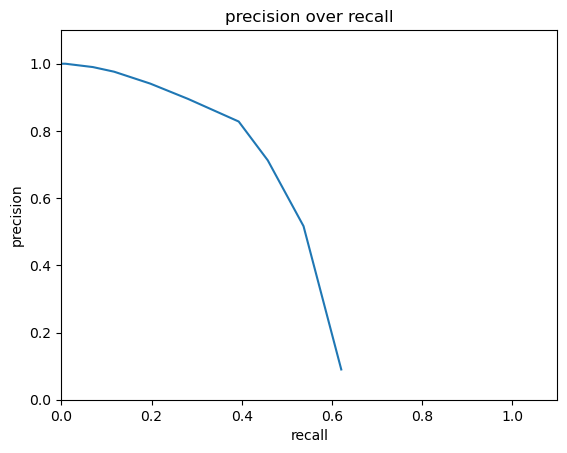

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.36it/s]


average train losses 2.050541083017985
average test losses 2.801188318817704
average precision 0.45863847418981984
test_precision 0.7210743330812077
test_recall 0.3201330562441673
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.39it/s]


average train losses 1.980901042620341
average test losses 2.677918021495526
average precision 0.44903376039574233
test_precision 0.7088554726679231
test_recall 0.3198262642707087
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.47it/s]


average train losses 1.880138913790385
average test losses 2.842803876624148
average precision 0.45899108677846867
test_precision 0.7240947449764239
test_recall 0.32205746927969153
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.31it/s]


average train losses 1.8278163406583998
average test losses 2.767311332232592
average precision 0.4611296633451985
test_precision 0.7247550554556079
test_recall 0.3046342546342546
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.99it/s]


average train losses 1.7596686283747356
average test losses 2.804386271370782
average precision 0.4846360534442126
test_precision 0.7176117413683083
test_recall 0.3423035811924701
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.26it/s]


average train losses 1.7199224498536851
average test losses 2.7544902223467487
average precision 0.4691891827552148
test_precision 0.7481479219777328
test_recall 0.27734138289693844
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.71it/s]


average train losses 1.6932158205244277
average test losses 2.931354767236954
average precision 0.48425668699041197
test_precision 0.7137729758888498
test_recall 0.3397327980661314
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.78it/s]


average train losses 1.6433087057537503
average test losses 2.6362572748776514
average precision 0.46396204526362284
test_precision 0.7454093456387634
test_recall 0.2829429829429829
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.38it/s]


average train losses 1.6249720917807684
average test losses 2.620105319213324
average precision 0.4063601510736913
test_precision 0.7782855917025711
test_recall 0.23950380894825338
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.79it/s]


average train losses 1.619306484858195
average test losses 2.5969561518427313
average precision 0.458970962328401
test_precision 0.73185245680857
test_recall 0.30973460695682914
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.06it/s]


average train losses 1.5361020035213895
average test losses 2.738456980794923
average precision 0.4142828169241639
test_precision 0.739863296156091
test_recall 0.26781829281829284
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.83it/s]


average train losses 1.4831340180502997
average test losses 2.674250612231741
average precision 0.45303574846115635
test_precision 0.7249223205287537
test_recall 0.3008991008991009
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.95it/s]


average train losses 1.4507021771536932
average test losses 2.7233556267882344
average precision 0.3951831056719865
test_precision 0.6847823501851313
test_recall 0.2928587873032318
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.98it/s]


average train losses 1.404710054397583
average test losses 2.6111043835976866
average precision 0.45067248485327693
test_precision 0.7105313606589858
test_recall 0.307330940664274
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.84it/s]


average train losses 1.360413908958435
average test losses 2.6405633896844
average precision 0.4473483204940944
test_precision 0.7248271395724558
test_recall 0.29425687481243035
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.67it/s]


average train losses 1.3399974637561374
average test losses 2.5786903768862754
average precision 0.45632504806913715
test_precision 0.7364976887310107
test_recall 0.28195621251176806
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 86.86it/s]


average train losses 1.2996513578626845
average test losses 2.569647670811058
average precision 0.4015546197793957
test_precision 0.7630149343129708
test_recall 0.25638137582582027
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.75it/s]


average train losses 1.262401408619351
average test losses 2.491216503996455
average precision 0.46779041856170256
test_precision 0.7434326086503902
test_recall 0.2991384130273019
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.88it/s]


average train losses 1.2433120807011921
average test losses 2.5435005558861628
average precision 0.46891660209373287
test_precision 0.7485353434249586
test_recall 0.2960329793663127
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 85.06it/s]


average train losses 1.2503361701965332
average test losses 2.303477733223527
average precision 0.39671382583130976
test_precision 0.7573725544964113
test_recall 0.24462636129302795
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.72it/s]


average train losses 1.1966309812333848
average test losses 2.5242790201111056
average precision 0.4732315298475371
test_precision 0.7562124781663263
test_recall 0.29074793519237957
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.64it/s]


average train losses 1.147765040397644
average test losses 2.474068105730236
average precision 0.369637737116919
test_precision 0.7161475553599983
test_recall 0.26034716312494094
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.81it/s]


average train losses 1.1228143903944228
average test losses 2.562450643108781
average precision 0.4181484741560783
test_precision 0.7515204360103918
test_recall 0.2779156029156029
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.75it/s]


average train losses 1.0873915751775105
average test losses 2.5547420881752276
average precision 0.3850533516914281
test_precision 0.7447637242519982
test_recall 0.24736097236097235
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 90.31it/s]


average train losses 1.0698621935314603
average test losses 2.3755895407111556
average precision 0.48431305878683184
test_precision 0.7669336742145536
test_recall 0.3022856772856773
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.05it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.05it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.51it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.59it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 137.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 162.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 159.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 160.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.42it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 152.36it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 177.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 177.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 177.46it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.58it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.45it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 191.28it/s]

Max accuracy: 0.49443669467641643
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.8000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:53<00:00,  8.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.93it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.79it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.80it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.53it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.75it/s]

Max accuracy: 0.49443669467641643
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.8000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  9.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:53<00:00,  8.81it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.06it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.72it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.68it/s]

Max accuracy: 0.502273804590633
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.7500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:21<00:00, 12.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 11.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.20it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.55it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.77it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 71.82it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.66it/s]

Max accuracy: 0.5086755516290529
With filter threshold: tensor(0.0250)
With NMS threshold: tensor(0.7250)


Max accuracy: tensor(0.5592)


IndexError: index 3 is out of bounds for dimension 0 with size 1

In [ ]:
weight_decays = [0.1]
layers = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

max_accs = torch.zeros(len(weight_decays), len(layers))
max_nms = torch.zeros_like(max_accs)
max_filter = torch.zeros_like(max_accs)

for i in range(len(weight_decays)):
    for j in range(len(layers)-1):
            sd = torch.load("models/configs/voc_pretrained.pt")
            sd = longtrain(TinyYoloV2, sd, device=device, frozen_layers=layers[:-j-1], lr=0.00003, weight_decay=weight_decays[i], train_batch_size=256, epochs=300)
            max_accs[i,j], max_nms[i,j], max_filter[i,j] = identify_threshold(TinyYoloV2, sd, device=device)

index = torch.argmax(max_accs)
print('Max accuracy:', torch.max(max_accs))
print('With filter threshold:', max_filter[index])
print('With NMS threshold:', max_nms[index])
print('With weight decay:', weight_decays[index[0]])
print('With number frozen layers:', layers[index[1]])
cm = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(torch.round(100 * max_accs, decimals=2))
x=x.style.background_gradient(cmap=cm)
display(x)

Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:01<00:00,  5.66it/s]


average train losses 74.27066887749567
average test losses 70.21591841868864
average precision 0.100524851573361
test_precision 0.26642785365575145
test_recall 0.2607390551834996
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:52<00:00,  6.67it/s]


average train losses 61.98905224270291
average test losses 58.11350807776818
average precision 0.14146114612865723
test_precision 0.3205973220351468
test_recall 0.30374687041353704
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:48<00:00,  7.18it/s]


average train losses 52.186993492974175
average test losses 45.4733323752031
average precision 0.15113971437414586
test_precision 0.3828289471693828
test_recall 0.2952668730446508
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.72it/s]


average train losses 43.30239147610135
average test losses 35.25710913937995
average precision 0.1759352162499945
test_precision 0.4452911408430092
test_recall 0.2648553092997537
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:39<00:00,  8.82it/s]


average train losses 35.43595631917318
average test losses 28.71642100233638
average precision 0.23094822616145416
test_precision 0.5007896373716357
test_recall 0.2857441940775274
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.27it/s]


average train losses 28.131905449761284
average test losses 23.386409379138566
average precision 0.2597494959090935
test_precision 0.5353959248376626
test_recall 0.2679381318270207
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.76it/s]


average train losses 22.93377791510688
average test losses 20.02028474780569
average precision 0.2951094236017777
test_precision 0.567638444751142
test_recall 0.2727953116842005
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.02it/s]


average train losses 18.991009182400173
average test losses 17.27944516456365
average precision 0.31707586896378276
test_precision 0.5939973973187707
test_recall 0.2644336116558339
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.29it/s]


average train losses 16.00030369228787
average test losses 15.050554145095695
average precision 0.3264293506024715
test_precision 0.6110990404128389
test_recall 0.2713732769288325
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:29<00:00, 11.97it/s]


average train losses 13.81065559387207
average test losses 13.317873704807031
average precision 0.3287229090734917
test_precision 0.6362436074606791
test_recall 0.262650929317596
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 13.38it/s]


average train losses 12.14885139465332
average test losses 11.753665910487161
average precision 0.3649484479174999
test_precision 0.6539531673310776
test_recall 0.2524044885155996
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 12.97it/s]


average train losses 10.766307406955296
average test losses 10.882930038321732
average precision 0.3420903558632281
test_precision 0.6626099889330277
test_recall 0.24885361552028218
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 13.16it/s]


average train losses 9.742787996927897
average test losses 9.774663652110304
average precision 0.3542039173547129
test_precision 0.6679396100305282
test_recall 0.24787866454533122
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.26it/s]


average train losses 8.940567970275879
average test losses 9.070695170649776
average precision 0.36499336050972264
test_precision 0.6742718315440375
test_recall 0.25140846807513473
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.43it/s]


average train losses 8.156928062438965
average test losses 8.46412140012127
average precision 0.3746357043616767
test_precision 0.6839228667266263
test_recall 0.23306004694893584
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.45it/s]


average train losses 7.725809574127197
average test losses 7.617734290935375
average precision 0.3967556148384002
test_precision 0.6990337551378505
test_recall 0.23861549972661084
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.89it/s]


average train losses 7.2418539259168835
average test losses 7.3400927866965615
average precision 0.40637808110315915
test_precision 0.7061374479039171
test_recall 0.24045563490007935
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.80it/s]


average train losses 6.709642675187853
average test losses 6.96105969937099
average precision 0.39408920218079846
test_precision 0.6970137709536949
test_recall 0.2543488404599516
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.72it/s]


average train losses 6.3699403868781195
average test losses 6.553657063052186
average precision 0.41659072326078606
test_precision 0.7126389258691164
test_recall 0.24181960015293344
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.09it/s]


average train losses 6.006320423550076
average test losses 6.129080457225484
average precision 0.3813820585268892
test_precision 0.7163780175311674
test_recall 0.24861475972587085
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.06it/s]


average train losses 5.683669302198622
average test losses 5.9730133670687335
average precision 0.42926125538659116
test_precision 0.7131310181268582
test_recall 0.2658477325143992
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.18it/s]


average train losses 5.4535280333624945
average test losses 5.6573489507039385
average precision 0.42144345474517486
test_precision 0.7182441971010776
test_recall 0.24756611701056142
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.39it/s]


average train losses 5.177538447909885
average test losses 5.410524311228695
average precision 0.42411357395103516
test_precision 0.7210441805383855
test_recall 0.2513895569451125
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.16it/s]


average train losses 4.953708330790202
average test losses 5.209035380953058
average precision 0.4106671234216843
test_precision 0.7102313490865417
test_recall 0.2650290039178928
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.81it/s]

average train losses 4.74875529607137
average test losses 4.943012084716406
average precision 0.43095400073420903
test_precision 0.7253114180026907
test_recall 0.2570456292678515


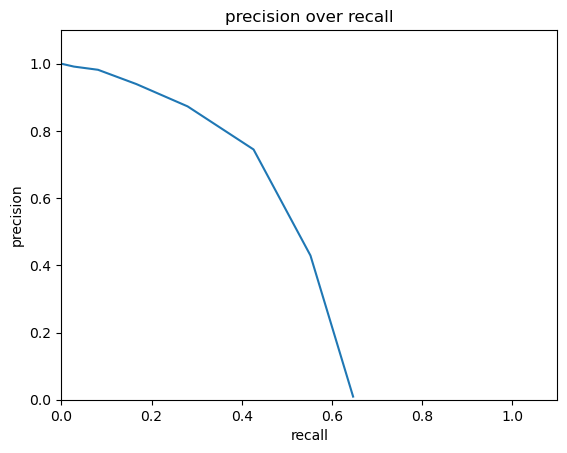

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.83it/s]


average train losses 4.651663197411431
average test losses 4.849551357095398
average precision 0.42344027653094946
test_precision 0.7228086112958472
test_recall 0.24349734627512404
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.31it/s]


average train losses 4.4409828715854225
average test losses 4.768515062468004
average precision 0.40608769150218843
test_precision 0.7072423816047865
test_recall 0.251984126984127
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.96it/s]


average train losses 4.264755725860596
average test losses 4.46297094624946
average precision 0.45243438703877015
test_precision 0.7258641519046973
test_recall 0.27584699251365924
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.20it/s]


average train losses 4.122943533791436
average test losses 4.3454943857980926
average precision 0.45552117157664235
test_precision 0.7293044493961673
test_recall 0.261637128303795
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.37it/s]


average train losses 3.9873454570770264
average test losses 4.153841045846966
average precision 0.4460792158322802
test_precision 0.7197510191027264
test_recall 0.25495183828517165
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 21.56it/s]


average train losses 3.8548815515306263
average test losses 4.225573748944492
average precision 0.4441664789295006
test_precision 0.7247104183549086
test_recall 0.27430820208597984
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.41it/s]


average train losses 3.782709095213148
average test losses 4.005384338547362
average precision 0.46203014037467083
test_precision 0.7361723902425014
test_recall 0.27396071007182116
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.28it/s]


average train losses 3.6565923160976834
average test losses 3.948004617989912
average precision 0.45180434858231044
test_precision 0.7263048630523173
test_recall 0.2747581636470525
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.76it/s]


average train losses 3.5217262638939753
average test losses 3.9278457239482476
average precision 0.4429384235371265
test_precision 0.7187943819609458
test_recall 0.25746105746105746
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 30.90it/s]


average train losses 3.4980349275800915
average test losses 3.7800637249253755
average precision 0.45009558391731536
test_precision 0.7240583544954777
test_recall 0.28775175441842105
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 37.86it/s]


average train losses 3.3737021022372775
average test losses 3.6016728606319157
average precision 0.4524968530406277
test_precision 0.7272860908856379
test_recall 0.29414803303692194
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 38.64it/s]


average train losses 3.2872309949662952
average test losses 3.6690402363779877
average precision 0.45760725955456183
test_precision 0.7326008124885688
test_recall 0.26726894504672283
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.50it/s]


average train losses 3.1871996190812855
average test losses 3.598738379288263
average precision 0.4434293273854893
test_precision 0.7194619209328403
test_recall 0.29404114404114406
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.52it/s]


average train losses 3.1221354802449546
average test losses 3.4126064532842393
average precision 0.45592198283412305
test_precision 0.7312207769966242
test_recall 0.2996451079784413
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.34it/s]


average train losses 3.0791243977016873
average test losses 3.380923809488954
average precision 0.45729211253885965
test_precision 0.733999468182802
test_recall 0.28901242790131676
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 42.68it/s]


average train losses 2.977077351676093
average test losses 3.472610398235484
average precision 0.4428727946698638
test_precision 0.7180916048904985
test_recall 0.2924952619397063
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.22it/s]


average train losses 2.91055695215861
average test losses 3.349869748805663
average precision 0.45835838461943423
test_precision 0.7363280825943032
test_recall 0.29939319939319936
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.19it/s]


average train losses 2.947994656032986
average test losses 3.0781781534184076
average precision 0.4669392498944714
test_precision 0.7465231348597627
test_recall 0.2898486287375176
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.70it/s]


average train losses 2.8208984004126654
average test losses 3.0917650712521327
average precision 0.4970646969026495
test_precision 0.7298800303240957
test_recall 0.32043183154294264
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.57it/s]


average train losses 2.756856918334961
average test losses 3.0660782512436566
average precision 0.4634768389547315
test_precision 0.7423362005972242
test_recall 0.3084010639566195
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.60it/s]


average train losses 2.6687416235605874
average test losses 3.005483107009844
average precision 0.46990953142139863
test_precision 0.7225784190870018
test_recall 0.32145817145817146
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.74it/s]


average train losses 2.6579687065548367
average test losses 2.956086930046734
average precision 0.45894455046713073
test_precision 0.737665673284619
test_recall 0.29685129685129685
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.92it/s]


average train losses 2.5505986743503146
average test losses 3.085624716220758
average precision 0.47195038528001443
test_precision 0.7293188924268843
test_recall 0.31063370785593003
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.05it/s]


average train losses 2.5264148712158203
average test losses 2.8799259350170776
average precision 0.46243666051684795
test_precision 0.7336558410546566
test_recall 0.31432867543978654
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.37it/s]

average train losses 2.4582934114668102
average test losses 2.870137364776046
average precision 0.4921983549402418
test_precision 0.7290817257193456
test_recall 0.3180746208523987


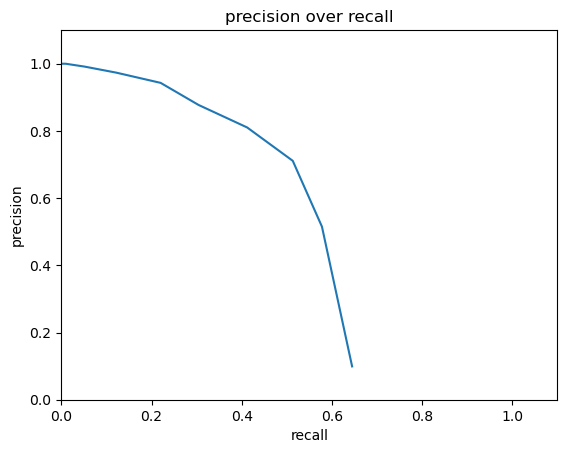

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.20it/s]


average train losses 2.429857201046414
average test losses 2.9137788029477805
average precision 0.4585135704806159
test_precision 0.7353088566328383
test_recall 0.30265670543448325
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 58.53it/s]


average train losses 2.3431429862976074
average test losses 2.8052048937887206
average precision 0.49010680037593524
test_precision 0.7244499372376244
test_recall 0.3292857348412904
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.15s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.95it/s]


average train losses 2.3084674411349826
average test losses 2.730120471739701
average precision 0.4718587911122208
test_precision 0.7403948287258404
test_recall 0.3029300945967613
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.40it/s]


average train losses 2.284501896964179
average test losses 2.794604113298943
average precision 0.4795344217654777
test_precision 0.7358632504535676
test_recall 0.31615966338188556
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.30s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.87it/s]


average train losses 2.2207734849717884
average test losses 2.887220748469361
average precision 0.4768466177600445
test_precision 0.7341050267163142
test_recall 0.3162670662670663
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.30s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.15it/s]


average train losses 2.1938677893744574
average test losses 2.621823345833694
average precision 0.5033378243064704
test_precision 0.7474308084434697
test_recall 0.3207794263349819
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:12<00:00,  1.38s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 58.88it/s]


average train losses 2.145715872446696
average test losses 2.759699905020559
average precision 0.4728642164176613
test_precision 0.7257406024551067
test_recall 0.32007992007992014
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.25s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.42it/s]


average train losses 2.095572339163886
average test losses 2.6528686774082675
average precision 0.5055728347242066
test_precision 0.746145629487223
test_recall 0.31767532878643984
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.25s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.01it/s]


average train losses 2.045443124241299
average test losses 2.7134414642964333
average precision 0.4741096547082097
test_precision 0.7049298275073528
test_recall 0.3378972878972879
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.22s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.81it/s]


average train losses 1.999091347058614
average test losses 2.607856451955616
average precision 0.4803527574687613
test_precision 0.7383012457772316
test_recall 0.31164586442364217
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.21it/s]


average train losses 1.9638604720433552
average test losses 2.540574298285351
average precision 0.48910242420123384
test_precision 0.7285384622355757
test_recall 0.33685316740872295
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.23s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 58.25it/s]


average train losses 1.920567724439833
average test losses 2.561183501852204
average precision 0.49846496406652835
test_precision 0.7397156511073462
test_recall 0.3237898932343377
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.25s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.43it/s]


average train losses 1.928343693415324
average test losses 2.6917460637214856
average precision 0.45809349135346283
test_precision 0.7329481455716083
test_recall 0.30872892539559205
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.33s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.90it/s]


average train losses 1.8997310267554388
average test losses 2.6529842961547723
average precision 0.4887094246045546
test_precision 0.7249446955490371
test_recall 0.3331832776277221
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.23s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.47it/s]


average train losses 1.8373490307066176
average test losses 2.6296820183764837
average precision 0.4792278233945242
test_precision 0.7345773987169387
test_recall 0.3344007844007844
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.30it/s]


average train losses 1.806169456905789
average test losses 2.523238244729164
average precision 0.5076562906201263
test_precision 0.7493503642290845
test_recall 0.339647081313748
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.97it/s]


average train losses 1.7754830254448786
average test losses 2.39520603095704
average precision 0.4672714135059177
test_precision 0.7424849208078842
test_recall 0.2953242231020009
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.35it/s]


average train losses 1.7027417951160007
average test losses 2.480822858817217
average precision 0.4859991558221763
test_precision 0.7206416628510859
test_recall 0.3505162532940311
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.07it/s]


average train losses 1.6622016827265422
average test losses 2.5796650512266024
average precision 0.4237013281268045
test_precision 0.6986441120351059
test_recall 0.30329711440822554
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.91it/s]


average train losses 1.6525307363933988
average test losses 2.3688939943952096
average precision 0.4490828225391048
test_precision 0.7284412101131044
test_recall 0.3111960056404501
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.81it/s]


average train losses 1.5985154178407457
average test losses 2.326187135147573
average precision 0.47382173951948015
test_precision 0.7333163420709405
test_recall 0.3241002824336157
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.71it/s]


average train losses 1.5612200366126165
average test losses 2.3760196963946023
average precision 0.46342484858446065
test_precision 0.7310673490796867
test_recall 0.31387706943262494
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.65it/s]


average train losses 1.540740927060445
average test losses 2.5295207294983064
average precision 0.40856252292522394
test_precision 0.7280100295842762
test_recall 0.28328040272484717
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.08it/s]


average train losses 1.5202443732155695
average test losses 2.349858542283376
average precision 0.4934901186565325
test_precision 0.7294456457497183
test_recall 0.35194651027984364
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.45it/s]

average train losses 1.485696342256334
average test losses 2.3036244129523253
average precision 0.4510446887521251
test_precision 0.7140374405206891
test_recall 0.3141751252862364


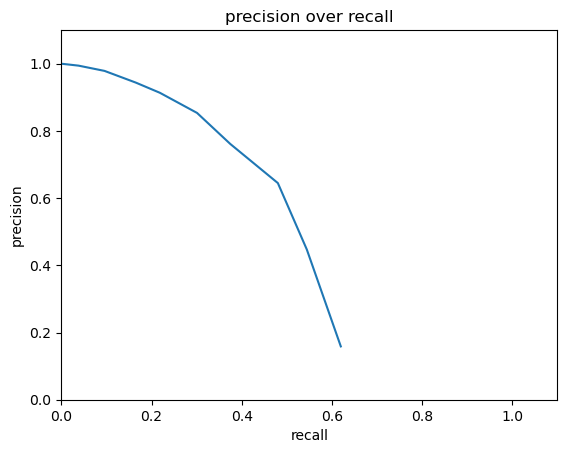

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.27it/s]


average train losses 1.4523720741271973
average test losses 2.353109894484876
average precision 0.42466097515402784
test_precision 0.703426529390579
test_recall 0.30451719062830174
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.65it/s]


average train losses 1.4351128074857924
average test losses 2.4264271840071068
average precision 0.4771867399518949
test_precision 0.7343269859936594
test_recall 0.3253844920511587
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.57it/s]


average train losses 1.3970670700073242
average test losses 2.371462408124212
average precision 0.48953144925157765
test_precision 0.7274047479194705
test_recall 0.34394638283527174
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.61it/s]


average train losses 1.4208600256178114
average test losses 2.3707664349140267
average precision 0.4432495619535704
test_precision 0.7395968154119394
test_recall 0.28951316173538394
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.05it/s]


average train losses 1.365533020761278
average test losses 2.4643507190579363
average precision 0.45547053997401127
test_precision 0.7011879208127353
test_recall 0.3310079837857615
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 27.81it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.26it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:59<00:00,  8.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.90it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.88it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.21it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.89it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.56it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.78it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 144.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 158.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.86it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 187.08it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.19it/s]

Max accuracy: 0.5115635379073299
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 71.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.34it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.92it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.63it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.72it/s]

Max accuracy: 0.5225240294781625
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.86it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 34.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.88it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 76.99it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 66.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.20it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.26it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.30it/s]

Max accuracy: 0.5263586303757023
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.82it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 22.13it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.05it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 32.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 27.81it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.03it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.62it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.29it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.30it/s]

Max accuracy: 0.5263586303757023
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5500)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.16s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:51<00:00,  6.78it/s]


average train losses 77.88246324327257
average test losses 73.07378618941348
average precision 0.09877199295971861
test_precision 0.2409440772091354
test_recall 0.23501323779101554
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:44<00:00,  7.87it/s]


average train losses 65.67527855767145
average test losses 61.98544676691039
average precision 0.11316673815507902
test_precision 0.2648331635333765
test_recall 0.3029727474171919
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:42<00:00,  8.26it/s]


average train losses 55.736303117540146
average test losses 49.98595110031954
average precision 0.16853900501231409
test_precision 0.3285278089010107
test_recall 0.31604044104044104
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.16it/s]


average train losses 46.53972456190321
average test losses 38.72132291005887
average precision 0.18697964959875152
test_precision 0.38961986879255334
test_recall 0.3047460769682992
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:37<00:00,  9.27it/s]


average train losses 38.17488649156358
average test losses 31.30534453541465
average precision 0.2017503070296779
test_precision 0.4608381518895629
test_recall 0.28558560780783004
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.26it/s]


average train losses 30.43946435716417
average test losses 24.88381392867477
average precision 0.25431471801463135
test_precision 0.5145092068807275
test_recall 0.2617204811649256
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.25it/s]


average train losses 24.73201666937934
average test losses 21.801737065328833
average precision 0.30140633141160855
test_precision 0.5513410545377341
test_recall 0.2809719087496866
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.92it/s]


average train losses 20.572425842285156
average test losses 19.035506134359245
average precision 0.34717385101393244
test_precision 0.5785510252627437
test_recall 0.28478907923352365
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.24it/s]


average train losses 17.488718456692165
average test losses 16.513409888982093
average precision 0.3356122212429886
test_precision 0.6092113216595819
test_recall 0.27054457887791217
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.31it/s]


average train losses 15.069957627190483
average test losses 14.854432752669027
average precision 0.35332148328719293
test_precision 0.6185656094881263
test_recall 0.2666105499438832
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.44it/s]


average train losses 13.25289789835612
average test losses 13.243442779932266
average precision 0.3814229943758242
test_precision 0.643129999324102
test_recall 0.27278698667587553
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.32it/s]


average train losses 11.771100150214302
average test losses 11.69966375725901
average precision 0.37905930430000156
test_precision 0.6551665653046697
test_recall 0.2676242481798037
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.47it/s]


average train losses 10.635257720947266
average test losses 10.732041566799849
average precision 0.38131700347600356
test_precision 0.6664886902866566
test_recall 0.2588772338772339
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.59it/s]


average train losses 9.759457376268175
average test losses 9.844387941550664
average precision 0.38846439667583854
test_precision 0.6704703730838517
test_recall 0.2704792121458788
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.34it/s]


average train losses 8.932217597961426
average test losses 9.14372360332739
average precision 0.4032633308713146
test_precision 0.6763428546066952
test_recall 0.27642491253602364
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.67it/s]


average train losses 8.316933737860786
average test losses 8.54712145552676
average precision 0.4046974982438078
test_precision 0.6878272944611002
test_recall 0.26106064717175825
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.85it/s]


average train losses 7.709244728088379
average test losses 7.888044630360399
average precision 0.4080059430165667
test_precision 0.6827737236869118
test_recall 0.27035916758138984
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 14.73it/s]


average train losses 7.338543203141954
average test losses 7.4742548363840475
average precision 0.43370388933004117
test_precision 0.698904177794901
test_recall 0.26671147782258897
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.26it/s]


average train losses 6.791115548875597
average test losses 7.000904871187998
average precision 0.4532729086134506
test_precision 0.7071376576803736
test_recall 0.2753801753801754
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.26it/s]


average train losses 6.401082992553711
average test losses 6.4926464401419
average precision 0.44045690073164023
test_precision 0.721790462124943
test_recall 0.26739330628219515
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.00it/s]


average train losses 6.093175517188178
average test losses 6.259196725666014
average precision 0.4459024766921394
test_precision 0.7263321466698145
test_recall 0.2683694905917128
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.11it/s]


average train losses 5.792111025916205
average test losses 6.084150212442773
average precision 0.43817339627170676
test_precision 0.7153423665727411
test_recall 0.2544729961396628
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.71it/s]


average train losses 5.574597146775988
average test losses 5.810067033495998
average precision 0.4462711547166951
test_precision 0.7188139530281519
test_recall 0.2752947669614336
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.73it/s]


average train losses 5.3450356059604225
average test losses 5.609301483529245
average precision 0.4466967387142864
test_precision 0.7220077714096211
test_recall 0.27038177871511204
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.73it/s]

average train losses 5.104030238257514
average test losses 5.496415722404111
average precision 0.4195567694377751
test_precision 0.7167704645974999
test_recall 0.2517179322734879


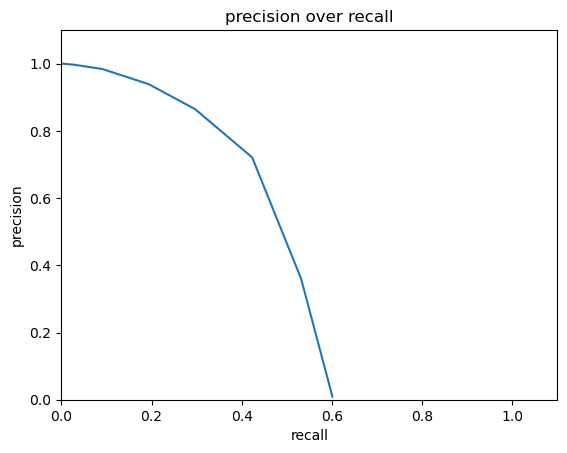

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.02it/s]


average train losses 4.940208911895752
average test losses 5.075139034847249
average precision 0.44629522693856
test_precision 0.719921595245817
test_recall 0.2766530794308572
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.70it/s]


average train losses 4.741816149817573
average test losses 4.8981518290321375
average precision 0.450737377657782
test_precision 0.723382193050807
test_recall 0.2740893879782768
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.51it/s]


average train losses 4.514497809939915
average test losses 4.867114433196195
average precision 0.45113052839567475
test_precision 0.7246014036910372
test_recall 0.28776573221017665
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 19.25it/s]


average train losses 4.355547534094916
average test losses 4.67010571813991
average precision 0.45482530454036313
test_precision 0.7283825489983596
test_recall 0.2826573632129188
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:16<00:00, 21.06it/s]


average train losses 4.191807058122423
average test losses 4.5100358401947895
average precision 0.45485053935878417
test_precision 0.7285944630247054
test_recall 0.2764043569599125
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 24.22it/s]


average train losses 4.069304413265652
average test losses 4.368819067620824
average precision 0.457916825653975
test_precision 0.7315064701348009
test_recall 0.29539822317600095
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 26.57it/s]


average train losses 3.9582818349202475
average test losses 4.309617698702038
average precision 0.4579737418352165
test_precision 0.7317404748956557
test_recall 0.28276168276168273
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.37it/s]


average train losses 3.8268989192114935
average test losses 4.131105706223056
average precision 0.45376323133333296
test_precision 0.7274877983324864
test_recall 0.28530142696809363
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 32.05it/s]


average train losses 3.717724323272705
average test losses 4.014453655634171
average precision 0.45733408556762123
test_precision 0.7308708647786386
test_recall 0.28512475179141844
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 34.82it/s]


average train losses 3.6322158177693686
average test losses 3.960193083836482
average precision 0.4545307707440028
test_precision 0.7291405513587954
test_recall 0.2937312687312687
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 34.86it/s]


average train losses 3.57166412141588
average test losses 3.8641335074378556
average precision 0.4645991787724547
test_precision 0.7399942344843287
test_recall 0.28173277339944003
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.17it/s]


average train losses 3.4631923569573297
average test losses 3.7672674024206962
average precision 0.4462053704334371
test_precision 0.723425747997807
test_recall 0.2766853516853517
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 38.89it/s]


average train losses 3.3946452935536704
average test losses 3.7219535822202676
average precision 0.5016078930823027
test_precision 0.7342634098695716
test_recall 0.32212674157118604
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.85it/s]


average train losses 3.3368829356299505
average test losses 3.6456158616264323
average precision 0.4606371517227196
test_precision 0.7378296736248021
test_recall 0.2788501621834955
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 46.76it/s]


average train losses 3.2155953778160944
average test losses 3.5683668491847156
average precision 0.4705915575407888
test_precision 0.7451508842054325
test_recall 0.30409456798345685
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.68it/s]


average train losses 3.3162715435028076
average test losses 3.3222070028978874
average precision 0.474143614359248
test_precision 0.7463695268122207
test_recall 0.2964514908959353
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.55it/s]


average train losses 3.119923724068536
average test losses 3.5449093352695478
average precision 0.4702875725174018
test_precision 0.7207400431146815
test_recall 0.30590613090613095
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 50.11it/s]


average train losses 3.0172900093926325
average test losses 3.269281218873809
average precision 0.48137900219767443
test_precision 0.7589719978898396
test_recall 0.2922780922780922
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 45.95it/s]


average train losses 2.8948702812194824
average test losses 3.5129184875732813
average precision 0.47418277988896906
test_precision 0.7239785919966194
test_recall 0.32140801585246026
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.94it/s]


average train losses 2.8244636588626437
average test losses 3.146226834028195
average precision 0.46422354092625456
test_precision 0.737248912474771
test_recall 0.3103212630990409
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.49it/s]


average train losses 2.761453284157647
average test losses 3.2799286407622854
average precision 0.4949902806756908
test_precision 0.7568767003737603
test_recall 0.3074483130038686
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.16it/s]


average train losses 2.691651609208849
average test losses 3.2113880397927046
average precision 0.47016408580675473
test_precision 0.721394398918139
test_recall 0.3180247735803291
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.90it/s]


average train losses 2.6462014516194663
average test losses 3.131420441842147
average precision 0.5066503274595985
test_precision 0.7465389730380542
test_recall 0.3339532895088451
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.63it/s]


average train losses 2.5751461717817516
average test losses 3.18155863719788
average precision 0.47119859778307144
test_precision 0.738000966301318
test_recall 0.30747863247863244
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.20it/s]

average train losses 2.59535723262363
average test losses 3.1079215714734505
average precision 0.4672116010607198
test_precision 0.7603490179691924
test_recall 0.28883955550622215


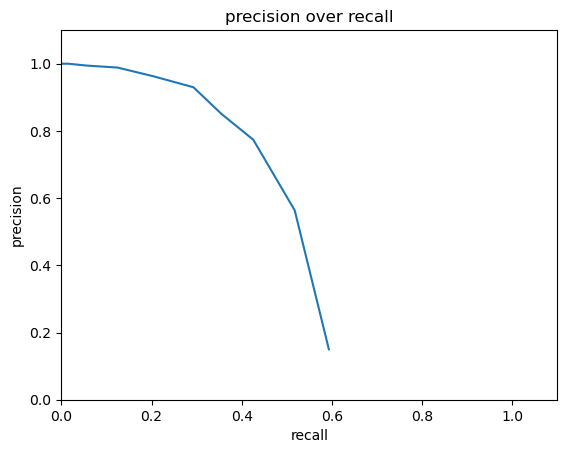

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 58.11it/s]


average train losses 2.530440754360623
average test losses 3.1045758364207385
average precision 0.449647803429947
test_precision 0.7173898625998374
test_recall 0.2973197584308695
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.08it/s]


average train losses 2.4663674566480847
average test losses 2.9673348135418363
average precision 0.46899275474235436
test_precision 0.7218133436836551
test_recall 0.31664960553849447
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 57.70it/s]


average train losses 2.3755341370900473
average test losses 2.977793432029224
average precision 0.503986475599537
test_precision 0.7461443091039662
test_recall 0.32971904638571303
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.03it/s]


average train losses 2.3458328247070312
average test losses 2.8165192454628794
average precision 0.4876666301860059
test_precision 0.7499342615464396
test_recall 0.3216659883326549
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.07it/s]


average train losses 2.2998428874545627
average test losses 2.8199070281112975
average precision 0.5041188855817251
test_precision 0.7450606685827259
test_recall 0.3298374465041132
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.22it/s]


average train losses 2.2412896951039634
average test losses 2.9146374671207873
average precision 0.49088263311504576
test_precision 0.720731828096466
test_recall 0.34754679476901695
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.06it/s]


average train losses 2.191779295603434
average test losses 2.8617155375304044
average precision 0.49057769403238266
test_precision 0.728746480100302
test_recall 0.33421640088306753
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.72it/s]


average train losses 2.172182003657023
average test losses 2.809849381107211
average precision 0.4770531322793862
test_precision 0.7364835545662861
test_recall 0.31794871794871793
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.54it/s]


average train losses 2.108923355738322
average test losses 2.643765075593932
average precision 0.48579771061190724
test_precision 0.7454619508585524
test_recall 0.3266751766751767
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.70it/s]


average train losses 2.046886788474189
average test losses 2.6996045041288066
average precision 0.48239047171100197
test_precision 0.7430744026423491
test_recall 0.33230843230843227
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.56it/s]


average train losses 2.018943084610833
average test losses 2.763247249982296
average precision 0.4946213068207243
test_precision 0.7376004961644302
test_recall 0.32940701274034606
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.47it/s]


average train losses 2.0170219341913858
average test losses 2.5482020850195166
average precision 0.4915481930856758
test_precision 0.7539428871971762
test_recall 0.32469567469567473
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.84it/s]


average train losses 1.9728234476513333
average test losses 2.655711343145778
average precision 0.477660146958163
test_precision 0.7380966386973328
test_recall 0.32620661231772335
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.91it/s]


average train losses 1.9162336587905884
average test losses 2.604648645786818
average precision 0.4969334616377423
test_precision 0.7383588340627012
test_recall 0.34038913761135986
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.63it/s]


average train losses 1.9268875784344144
average test losses 2.5957046261540166
average precision 0.4785088274750656
test_precision 0.764358182072184
test_recall 0.28428957873402316
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.66it/s]


average train losses 1.836647351582845
average test losses 2.5781952565551824
average precision 0.49712432989092376
test_precision 0.7394316877054029
test_recall 0.33141477863700086
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.66it/s]


average train losses 1.7903284364276462
average test losses 2.465933384379091
average precision 0.5485786649392822
test_precision 0.7616889730428849
test_recall 0.36607178829401055
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.93it/s]


average train losses 1.8009910583496094
average test losses 2.5483887017282667
average precision 0.47766785620154356
test_precision 0.7379178367980769
test_recall 0.31887947443502995
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.61it/s]


average train losses 1.7271303335825603
average test losses 2.5599665400649068
average precision 0.4753181065250789
test_precision 0.7324067411493571
test_recall 0.31927496371940817
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.68it/s]


average train losses 1.6669487026002672
average test losses 2.5038260539033135
average precision 0.4791140556265702
test_precision 0.7387071443230981
test_recall 0.3297992131325464
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.97it/s]


average train losses 1.7314978573057387
average test losses 2.526103002732975
average precision 0.4634712735140772
test_precision 0.7174885990202337
test_recall 0.3232214287769844
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.89it/s]


average train losses 1.6541282071007624
average test losses 2.3613307428495838
average precision 0.49770365346602863
test_precision 0.7255277439211809
test_recall 0.3508271563827119
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.04it/s]


average train losses 1.6142250166998968
average test losses 2.331507685517314
average precision 0.4764089649096276
test_precision 0.7372723150409285
test_recall 0.3303862803862804
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.81it/s]


average train losses 1.5722472667694092
average test losses 2.5696260637027923
average precision 0.4849571130346925
test_precision 0.7047779673791028
test_recall 0.3491438602549713
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 79.45it/s]

average train losses 1.541730907228258
average test losses 2.4033854943395
average precision 0.4475398572620795
test_precision 0.7470238573013454
test_recall 0.3028496195162862


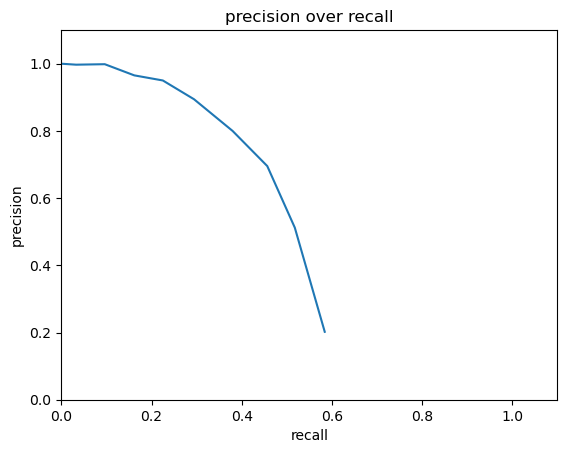

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.81it/s]


average train losses 1.4900859461890326
average test losses 2.4113817452705146
average precision 0.4864251223638389
test_precision 0.7417818081803633
test_recall 0.3428799595466262
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.81it/s]


average train losses 1.4619556135601468
average test losses 2.4454217845218476
average precision 0.46663608161888254
test_precision 0.714534218472943
test_recall 0.33618264451597785
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.44it/s]


average train losses 1.424236575762431
average test losses 2.4574129759755907
average precision 0.4791719167090677
test_precision 0.7399259737854964
test_recall 0.33282016337571896
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 144.55it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.44it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 171.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.03it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 171.54it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.39it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.39it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.84it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.29it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.44it/s]

Max accuracy: 0.5356674549197256
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.17it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.86it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.25it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.56it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.68it/s]

Max accuracy: 0.5439170362308091
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.97it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.15it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.62it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.54it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.37it/s]

Max accuracy: 0.5513565794526922
With filter threshold: tensor(0.1500)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.56it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.02it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.98it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.06it/s]

Max accuracy: 0.5609275310924171
With filter threshold: tensor(0.1500)
With NMS threshold: tensor(0.5750)


Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:49<00:00,  7.08it/s]


average train losses 58.39095984564887
average test losses 53.45717483911759
average precision 0.09832985555135515
test_precision 0.33752226655622314
test_recall 0.24020937909826798
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:41<00:00,  8.45it/s]


average train losses 47.69638358222114
average test losses 42.29122532466877
average precision 0.1502331101533649
test_precision 0.41610271166430657
test_recall 0.28317598039820263
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.04it/s]


average train losses 39.546297285291885
average test losses 33.463954751647776
average precision 0.1341669087632302
test_precision 0.464729397085315
test_recall 0.2515826765826766
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:35<00:00,  9.91it/s]


average train losses 32.50053130255805
average test losses 26.76043803875263
average precision 0.2341440373921551
test_precision 0.5296060815229672
test_recall 0.2550696217362884
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:32<00:00, 10.66it/s]


average train losses 26.468752966986763
average test losses 22.114775959243122
average precision 0.2735671757374846
test_precision 0.5548140802966156
test_recall 0.2752133668800335
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.31it/s]


average train losses 20.802501254611546
average test losses 17.862615696725005
average precision 0.28120601031645037
test_precision 0.5947784885233279
test_recall 0.24047444325222103
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.34it/s]


average train losses 16.957011858622234
average test losses 15.554045707072287
average precision 0.3286657157513293
test_precision 0.6212463036700735
test_recall 0.2569507652840986
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.69it/s]


average train losses 14.116969214545357
average test losses 13.385869259847874
average precision 0.2916871320886004
test_precision 0.6385390067587626
test_recall 0.24432141932141932
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:26<00:00, 13.15it/s]


average train losses 12.01613998413086
average test losses 11.801953234224237
average precision 0.3402288564137829
test_precision 0.6649763318523452
test_recall 0.24718111106999996
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.59it/s]


average train losses 10.40790949927436
average test losses 10.570917990812209
average precision 0.35536911105196306
test_precision 0.6701641627934364
test_recall 0.2497259941704386
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:24<00:00, 14.33it/s]


average train losses 9.224570168389214
average test losses 9.513411657762664
average precision 0.38097134903719626
test_precision 0.6836474419119719
test_recall 0.2557503196392085
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.46it/s]


average train losses 8.267989794413248
average test losses 8.737274141393156
average precision 0.39110734780408785
test_precision 0.6914207986541289
test_recall 0.25194024082912975
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.63it/s]


average train losses 7.488846937815349
average test losses 8.00453230594298
average precision 0.3946488755113977
test_precision 0.692179029774173
test_recall 0.2587136114913893
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.43it/s]


average train losses 6.8736048804389105
average test losses 7.362462809962085
average precision 0.3958317195172288
test_precision 0.69447452124868
test_recall 0.24531456198122864
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.30it/s]


average train losses 6.354384475284153
average test losses 6.907614300393651
average precision 0.411790114935472
test_precision 0.7076985712230182
test_recall 0.25660378715934273
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.43it/s]


average train losses 5.899689833323161
average test losses 6.5215938261091875
average precision 0.44979909448839756
test_precision 0.7042265989288876
test_recall 0.2711667961667961
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.82it/s]


average train losses 5.530273066626655
average test losses 6.075236407440273
average precision 0.4215641998793446
test_precision 0.7176103296204625
test_recall 0.25665466221021777
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.48it/s]


average train losses 5.225837866465251
average test losses 5.811541219722172
average precision 0.41058144760732646
test_precision 0.7094830227591368
test_recall 0.26448140337029225
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.05it/s]


average train losses 4.922381824917263
average test losses 5.537024267718324
average precision 0.4356687207836163
test_precision 0.7296316701291938
test_recall 0.24157118601563043
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.11it/s]


average train losses 4.6927756733364525
average test losses 5.1726723613902035
average precision 0.4581226175520342
test_precision 0.7318202275618443
test_recall 0.2798188437077326
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 18.99it/s]


average train losses 4.463780297173394
average test losses 4.950160524444363
average precision 0.4566052706845433
test_precision 0.7325241683489737
test_recall 0.26964280575391686
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:18<00:00, 19.19it/s]


average train losses 4.239392836888631
average test losses 4.864750069430751
average precision 0.44173564841980917
test_precision 0.7149923241085814
test_recall 0.26955575288908623
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.14it/s]


average train losses 4.0850058396657305
average test losses 4.607979911684651
average precision 0.4566589637548202
test_precision 0.7358855719576265
test_recall 0.2867004394782172
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:14<00:00, 23.66it/s]


average train losses 3.9231827788882785
average test losses 4.462869705298008
average precision 0.4517592239160393
test_precision 0.725165939427376
test_recall 0.27767058044835824
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.73it/s]

average train losses 3.783110592100355
average test losses 4.3409750801205975
average precision 0.5125371479622491
test_precision 0.7228952508270808
test_recall 0.30042406153517265


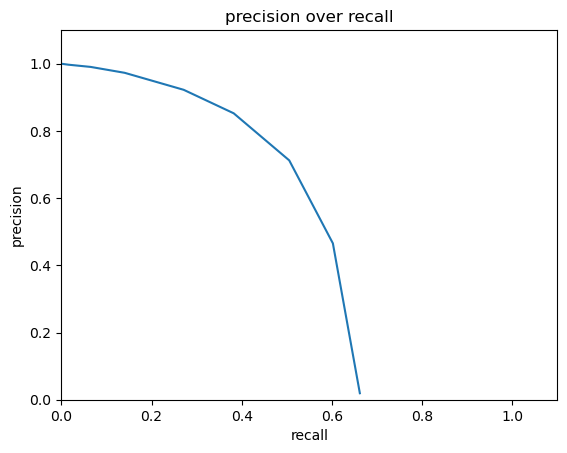

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 26.39it/s]


average train losses 3.652215692732069
average test losses 4.261219378550168
average precision 0.4585435108948969
test_precision 0.7324836874380151
test_recall 0.2740929852040963
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 32.45it/s]


average train losses 3.4994671874576144
average test losses 3.987812632509107
average precision 0.4424097426586781
test_precision 0.7159710506926885
test_recall 0.2987656376545265
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:11<00:00, 29.85it/s]


average train losses 3.39363431930542
average test losses 4.0884119683181455
average precision 0.4446728154231186
test_precision 0.7177960101244573
test_recall 0.2789129594685151
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 36.29it/s]


average train losses 3.301236523522271
average test losses 3.8262223912100506
average precision 0.45167051386974977
test_precision 0.7266346548041586
test_recall 0.2862461612461612
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:09<00:00, 37.12it/s]


average train losses 3.2143465677897134
average test losses 3.7320617624157855
average precision 0.44302149884233893
test_precision 0.7176637099815851
test_recall 0.2945524639969084
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 39.84it/s]


average train losses 3.086648252275255
average test losses 3.6621134518897773
average precision 0.4545321971173691
test_precision 0.7293694546524638
test_recall 0.2859719498608387
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 41.12it/s]


average train losses 3.017751614252726
average test losses 3.7107134374797854
average precision 0.4533589819998337
test_precision 0.7168895398883696
test_recall 0.29829666218555106
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 43.88it/s]


average train losses 2.9675187269846597
average test losses 3.511389413790146
average precision 0.43895128848577386
test_precision 0.7146257482379264
test_recall 0.28927615594282263
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 43.97it/s]


average train losses 2.829862435658773
average test losses 3.4588235378944634
average precision 0.45332881987480556
test_precision 0.7176823894107245
test_recall 0.3010351788129566
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.11it/s]


average train losses 2.7615221871270075
average test losses 3.259439033660454
average precision 0.46697837500646083
test_precision 0.7439893896349776
test_recall 0.2911370522481634
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.34it/s]


average train losses 2.735904667112562
average test losses 3.2559307657415713
average precision 0.46574800841584574
test_precision 0.7430463659162899
test_recall 0.27044303433192324
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.01it/s]


average train losses 2.6817112233903675
average test losses 3.2860767899075802
average precision 0.49555292883794616
test_precision 0.7257099411636084
test_recall 0.3238860933305378
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.24it/s]


average train losses 2.585098054673937
average test losses 3.1250004483084393
average precision 0.46982696701618837
test_precision 0.7145116193011122
test_recall 0.30629062295728965
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.93it/s]


average train losses 2.5014391475253634
average test losses 3.189719517346461
average precision 0.45519878419863224
test_precision 0.7322675701463738
test_recall 0.28040005262227485
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 49.24it/s]


average train losses 2.413242631488376
average test losses 3.2016716798146567
average precision 0.5260055105787911
test_precision 0.7219463162621771
test_recall 0.3350805573027795
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 58.80it/s]


average train losses 2.320376740561591
average test losses 2.9798018249691043
average precision 0.4854790203993795
test_precision 0.7166211989693443
test_recall 0.33388638110860336
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 56.58it/s]


average train losses 2.2475609514448376
average test losses 3.0999928149063023
average precision 0.4612305431849894
test_precision 0.7296642394184629
test_recall 0.2984140345251457
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.65it/s]


average train losses 2.2163447274102106
average test losses 3.0602517005724783
average precision 0.45046049398954063
test_precision 0.7274247716373762
test_recall 0.3029138556916335
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.94it/s]


average train losses 2.151990466647678
average test losses 2.9506999753479266
average precision 0.4594811311236838
test_precision 0.7383327817903668
test_recall 0.312796873907985
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.79it/s]


average train losses 2.0717130502065024
average test losses 2.8800891104586785
average precision 0.4789805223132235
test_precision 0.7345730611509849
test_recall 0.30898504787393677
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 61.65it/s]


average train losses 2.047728763686286
average test losses 2.675927579912365
average precision 0.48069901888865285
test_precision 0.7134649632223564
test_recall 0.3392410059076726
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.09it/s]


average train losses 1.9865499999788072
average test losses 2.6926171171699154
average precision 0.49085570096402154
test_precision 0.7281722769813073
test_recall 0.3207801457801458
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.27it/s]


average train losses 1.9343900283177693
average test losses 2.7169641405768545
average precision 0.5040434522415562
test_precision 0.7396050064305024
test_recall 0.31782733727178175
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.31it/s]


average train losses 1.8607874181535509
average test losses 2.736341693122842
average precision 0.4617280888553639
test_precision 0.7397215621579306
test_recall 0.289675756342423
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.30it/s]


average train losses 1.7964138322406344
average test losses 2.809030845633939
average precision 0.45078632968459525
test_precision 0.7287122238457773
test_recall 0.2937463770797104


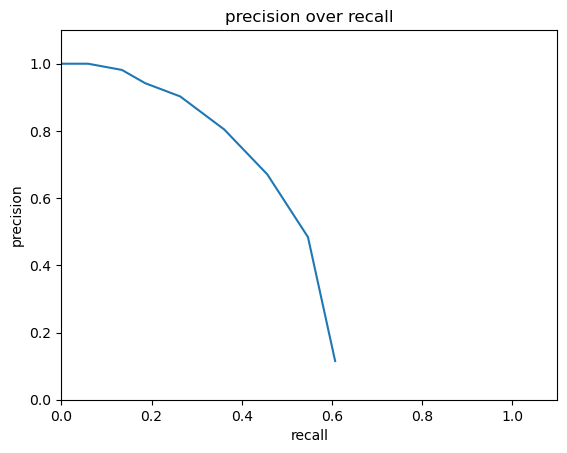

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.35it/s]


average train losses 1.7417666514714558
average test losses 2.710955249957549
average precision 0.48178046809946695
test_precision 0.714937355806065
test_recall 0.3315277315277315
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 62.97it/s]


average train losses 1.6863810751173232
average test losses 2.729656218463539
average precision 0.4672637640495729
test_precision 0.7333803436736137
test_recall 0.30677295955073736
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.43it/s]


average train losses 1.6263181500964694
average test losses 2.7243985372391184
average precision 0.45490045072593654
test_precision 0.7325882898958271
test_recall 0.3022163022163023
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.38it/s]


average train losses 1.6076080534193251
average test losses 2.5867264732676016
average precision 0.45602976969024406
test_precision 0.7292792653643257
test_recall 0.31311774645107976
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.70it/s]


average train losses 1.5808929204940796
average test losses 2.5533341542947667
average precision 0.44792664312866337
test_precision 0.7424630048860099
test_recall 0.27692975748531307
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 66.18it/s]


average train losses 1.543768220477634
average test losses 2.6187466678456364
average precision 0.46393848025269135
test_precision 0.7155309940447401
test_recall 0.32307168140501474
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.80it/s]


average train losses 1.4832132524914212
average test losses 2.5426132335961715
average precision 0.4119951091636271
test_precision 0.7368672915361524
test_recall 0.2769838186504853
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.80it/s]


average train losses 1.4134930504692926
average test losses 2.6947900022876228
average precision 0.40270316891827773
test_precision 0.7514367458956211
test_recall 0.26672021394243617
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.60it/s]


average train losses 1.35694244172838
average test losses 2.6382663599785916
average precision 0.4452448788881075
test_precision 0.722668176383942
test_recall 0.2925201341868008
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.10it/s]


average train losses 1.3175721565882366
average test losses 2.497115575180434
average precision 0.4703315777494969
test_precision 0.7464810329077801
test_recall 0.3022993467437912
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.50it/s]


average train losses 1.2685685687594943
average test losses 2.4268841322331007
average precision 0.45431987982882016
test_precision 0.7332458048964842
test_recall 0.2948224614891281
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.99it/s]


average train losses 1.2452046076456706
average test losses 2.3837316654346608
average precision 0.41022355888597134
test_precision 0.735385962129979
test_recall 0.2730738397405064
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 73.38it/s]


average train losses 1.2414584822124906
average test losses 2.5351606821402526
average precision 0.4374288505007459
test_precision 0.7335977296724208
test_recall 0.279960985516541
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.99it/s]


average train losses 1.196806338098314
average test losses 2.3998926186833285
average precision 0.46499014838062447
test_precision 0.7457581597224839
test_recall 0.2810811616367172
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.26it/s]


average train losses 1.1747165388531156
average test losses 2.450879061833406
average precision 0.45106745034872464
test_precision 0.7539078386118541
test_recall 0.28783037949704615
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.04it/s]


average train losses 1.1359134780036078
average test losses 2.4261674770602473
average precision 0.41982344664259336
test_precision 0.7438639502217463
test_recall 0.29022746800524574
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.65it/s]


average train losses 1.1209637721379597
average test losses 2.4049625125026433
average precision 0.4465911857766848
test_precision 0.7532751385808685
test_recall 0.2694446500002055
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.00it/s]


average train losses 1.1086940500471327
average test losses 2.405469337250093
average precision 0.4032133264828462
test_precision 0.723790841483727
test_recall 0.2780019363352697
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.56it/s]


average train losses 1.0758691363864474
average test losses 2.384859836509085
average precision 0.4706082058012387
test_precision 0.7526283161962003
test_recall 0.2923236228791784
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.63it/s]


average train losses 1.0219552384482489
average test losses 2.493276165591346
average precision 0.4108352141212515
test_precision 0.7384745829642958
test_recall 0.2724302446524669
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.04it/s]


average train losses 1.0174058543311224
average test losses 2.285144413468505
average precision 0.43015054295563004
test_precision 0.7409569176508936
test_recall 0.28167254556143445
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.18s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.52it/s]


average train losses 1.009041388829549
average test losses 2.3441311357028125
average precision 0.45386667736215147
test_precision 0.7333472505984941
test_recall 0.2966944578055689
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 90.64it/s]


average train losses 1.0566728048854404
average test losses 2.45125973988802
average precision 0.41216063487290405
test_precision 0.7959133234085689
test_recall 0.24746714191158634
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.36it/s]


average train losses 1.038875208960639
average test losses 2.368260043299096
average precision 0.45854355240348016
test_precision 0.7333272899865395
test_recall 0.3059993504437949
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 93.30it/s]


average train losses 1.053044040997823
average test losses 2.293841708419669
average precision 0.346485985334641
test_precision 0.7358003272130854
test_recall 0.21229264562597897


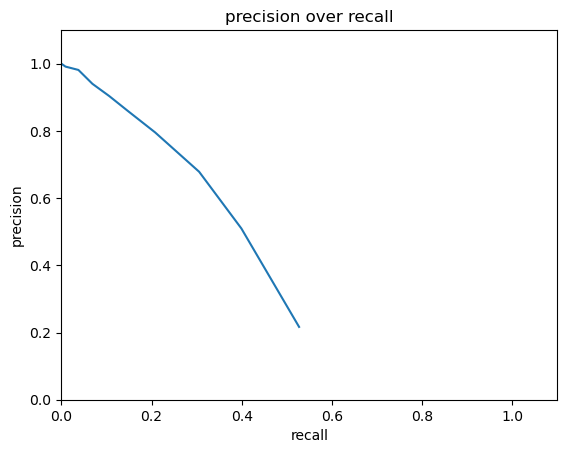

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.44it/s]


average train losses 1.093302806218465
average test losses 2.3907374537568487
average precision 0.38838395100723294
test_precision 0.7288642193205733
test_recall 0.26180126457904235
Epoch 77/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 84.81it/s]


average train losses 0.984226644039154
average test losses 2.32139661407199
average precision 0.45785098380280975
test_precision 0.7612425406302804
test_recall 0.2795501823279601
Epoch 78/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 81.11it/s]


average train losses 0.8841126693619622
average test losses 2.3546702038188947
average precision 0.38933755259159813
test_precision 0.7343641232071016
test_recall 0.2588271810494033
Epoch 79/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 95.32it/s]


average train losses 0.8380216757456461
average test losses 2.24882429634404
average precision 0.4568795402128736
test_precision 0.7864914057152224
test_recall 0.2816835427946539
Epoch 80/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 89.64it/s]


average train losses 0.7986001306109958
average test losses 2.2435274326223933
average precision 0.3999410855831576
test_precision 0.7474630695047892
test_recall 0.2746783052338608
Epoch 81/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 78.72it/s]


average train losses 0.7775487105051676
average test losses 2.3327244902268434
average precision 0.4522126463534571
test_precision 0.7499529973255279
test_recall 0.27236611125500015
Epoch 82/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 83.33it/s]


average train losses 0.7579004300965203
average test losses 2.331357383490288
average precision 0.3977058622631502
test_precision 0.7428097788590867
test_recall 0.2764406375517487
Epoch 83/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.09s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 96.13it/s]


average train losses 0.7337344421280755
average test losses 2.170338105951619
average precision 0.475094604629204
test_precision 0.758440604902966
test_recall 0.2900613789502679
Epoch 84/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.59it/s]


average train losses 0.7312135431501601
average test losses 2.2489791600792497
average precision 0.43799301830576115
test_precision 0.737490718940665
test_recall 0.2882752021640911
Epoch 85/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 80.34it/s]


average train losses 0.726994878715939
average test losses 2.443897755227537
average precision 0.3864724284206412
test_precision 0.7490871812353551
test_recall 0.24091433258099926
Epoch 86/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 95.68it/s]


average train losses 0.7164324853155348
average test losses 2.3469938742808805
average precision 0.4073789144434874
test_precision 0.7715063273021396
test_recall 0.25417216528327635
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.65it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.18it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:41<00:00,  9.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:56<00:00,  8.58it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.21it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.87it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 142.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 137.92it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.44it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.55it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.29it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.86it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.76it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.79it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 152.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.64it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 173.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 173.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.81it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 180.29it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 186.72it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 182.13it/s]

Max accuracy: 0.4728916360601004
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.22it/s]


------------------------Validation-----------------------


 53%|███████████████████████████████████████████████████▏                                            | 533/1000 [00:39<00:34, 13.60it/s]


KeyboardInterrupt: 

In [7]:
weight_decays = [0.001, 0.01, 0.1]

max_accs = torch.zeros(len(weight_decays))
max_nms = torch.zeros_like(max_accs)
max_filter = torch.zeros_like(max_accs)

for i in range(len(weight_decays)):
    sd = torch.load("models/configs/voc_pretrained.pt")
    sd = longtrain(TinyYoloV2, sd, device=device, frozen_layers=[], lr=0.00003, weight_decay=weight_decays[i], train_batch_size=256, epochs=300)
    max_accs[i], max_nms[i], max_filter[i] = identify_threshold(TinyYoloV2, sd, device=device)

index = torch.argmax(max_accs)
print('Max accuracy:', torch.max(max_accs))
print('With filter threshold:', max_filter[index])
print('With NMS threshold:', max_nms[index])
print('With weight decay:', weight_decays[index[0]])
print('With number frozen layers:', layers[index[1]])

In [ ]:
torch.save(sd, f"results/voc_finetuned_123_frozen_layers_300_epochs_00002_lr_0_decay.pt")

In [8]:
def tensor_scale(input):
    return float(2*torch.max(torch.abs(torch.max(input)), torch.abs(torch.min(input))))/127.0

def fuse_conv_bn_weights(conv_w, bn_rm, bn_rv, bn_w, bn_b):
    """
    Input:
        conv_w: shape=(output_channels, in_channels, kernel_size, kernel_size)
        bn_rm:  shape=(output_channels)
        bn_rv:  shape=(output_channels)
        bn_w:   shape=(output_channels)
        bn_b:   shape=(output_channels)
    
    Output:
        fused_conv_w = shape=conv_w
        fused_conv_b = shape=conv_b
    """
    bn_eps = 1e-05

    
    fused_conv = torch.zeros(conv_w.shape)
    fused_bias = torch.zeros(bn_b.shape)
    
    #to-be-done-by-student
    #fused_conv = conv_w
    #fused_conv1 = bn_w / torch.sqrt(bn_rv * bn_rv + bn_eps)
    for i in range(len(fused_conv)):
        fused_conv[i] = conv_w[i] * bn_w[i] / torch.sqrt(bn_rv[i] + bn_eps)
    for i in range(len(fused_bias)):
        fused_bias[i] = (0 - bn_rm[i]) * bn_w[i] / torch.sqrt(bn_rv[i] + bn_eps) + bn_b[i]
    #fused_bias = (bn_w * (conv_b - bn_rm)) / torch.sqrt(bn_rv * bn_rv + bn_eps) + bn_b
    #to-be-done-by-student

    
    '''fused_conv_factor = torch.div(bn_w, torch.sqrt(torch.add(bn_rv, bn_eps)))
    fused_conv_factor = fused_conv_factor[:, None, None, None]
    fused_conv = conv_w * fused_conv_factor
    
    fused_bias_factor = torch.div(torch.mul(bn_w, bn_rm), torch.sqrt(torch.add(bn_rv, bn_eps)))
    fused_bias = torch.add(fused_bias_factor, bn_b)'''

    return fused_conv, fused_bias

In [9]:
def densify_state_dict(state_dict):
    state_dict = copy.deepcopy(state_dict)
    
    mask = None
        
    for layer in range(1, 10):
        l = "conv" + str(layer) + "."
        w = l + "weight"
        b = l + "bias"
        weights = state_dict[w]
        biases = state_dict[b]
        if mask is not None:
            weights = weights[:,mask,:,:]
        mask = torch.nonzero(weights.sum(dim=[1,2,3]), as_tuple=True)[0].tolist()

        weights = weights[mask,:,:,:]
        biases = biases[mask]
        
        state_dict[w] = weights
        state_dict[b] = biases
    
    '''weights = state_dict["fc.weight"]
    
    fcmask = []
    for channel in mask:
        for i in range(4):
            fcmask.append(channel * 4 + i)
    
    state_dict["fc.weight"] = weights[:,fcmask]'''
    
    
    return state_dict

In [10]:
def l1_structured_pruning(state_dict, prune_ratio: float):
    state_dict = copy.deepcopy(state_dict)
    
    for layer in range(2, 9):
        l = "conv" + str(layer) + "."
        w = l + "weight"
        b = l + "bias"
        weights = state_dict[w]
        biases = state_dict[b]
        number_channels = weights.size()[0]
        number_channels_to_prune = int(number_channels * prune_ratio)
        if number_channels_to_prune < 1:
            continue
        l1 = torch.sum(torch.abs(weights), [1, 2, 3])
        zero_out_channels = torch.argsort(l1)
        
        for i in range(number_channels_to_prune):
            weights[zero_out_channels[i],:,:,:] = 0
            biases[zero_out_channels[i]] = 0
            
        state_dict[w] = weights
        state_dict[b] = biases
    
    
    return state_dict

Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.14s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:02<00:00,  5.62it/s]


average train losses 68.99379942152235
average test losses 64.29422806742524
average precision 0.09369194193449354
test_precision 0.2952938572534566
test_recall 0.24345602956714069
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:55<00:00,  6.30it/s]


average train losses 57.2546501159668
average test losses 52.81969053045637
average precision 0.10182354974067027
test_precision 0.34660967491976835
test_recall 0.2982564760342538
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:47<00:00,  7.34it/s]


average train losses 48.18650436401367
average test losses 42.09627827484044
average precision 0.14064221872210403
test_precision 0.4006526005762086
test_recall 0.28415175359619804
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:45<00:00,  7.77it/s]


average train losses 39.919434017605255
average test losses 32.95369960100223
average precision 0.1466139661380654
test_precision 0.47004972069989515
test_recall 0.24191960303071414
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:38<00:00,  9.11it/s]


average train losses 32.613995446099175
average test losses 26.201664845827978
average precision 0.2844315532204517
test_precision 0.5231257130611857
test_recall 0.2856641301085745
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:36<00:00,  9.52it/s]


average train losses 25.896771325005425
average test losses 21.38154556404831
average precision 0.2907414312703564
test_precision 0.5558454383800995
test_recall 0.26739875350986464
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.12it/s]


average train losses 20.999036577012802
average test losses 18.532903103407293
average precision 0.30217825507528506
test_precision 0.5821767084286773
test_recall 0.26390327779216666
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:34<00:00, 10.05it/s]


average train losses 17.434865315755207
average test losses 16.12528522741421
average precision 0.30008589209847564
test_precision 0.5977163682779605
test_recall 0.25468533524089076
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:31<00:00, 11.01it/s]


average train losses 14.852513525221083
average test losses 14.199488522999646
average precision 0.3543589377271701
test_precision 0.6201894108087603
test_recall 0.2697818642263087
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:30<00:00, 11.60it/s]


average train losses 12.785429106818306
average test losses 12.40052263689177
average precision 0.3802779224122981
test_precision 0.6418124561304193
test_recall 0.25969380413824855
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:28<00:00, 12.46it/s]


average train losses 11.258293363783094
average test losses 10.962030573787851
average precision 0.4179841590790135
test_precision 0.6620806347058591
test_recall 0.27879188712522046
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:27<00:00, 12.77it/s]


average train losses 9.982563760545519
average test losses 10.126591977230843
average precision 0.44491245265690066
test_precision 0.6718042281802232
test_recall 0.27954966843855733
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:25<00:00, 13.81it/s]


average train losses 9.063196818033854
average test losses 9.229398895872285
average precision 0.36130263952938574
test_precision 0.6708743405077953
test_recall 0.26079434968323856
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.13it/s]


average train losses 8.327335993448893
average test losses 8.48824531196529
average precision 0.4007675410556781
test_precision 0.6812719940796935
test_recall 0.2653994153994154
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:22<00:00, 15.71it/s]


average train losses 7.5931201510959205
average test losses 7.7847426311242955
average precision 0.3986946721177382
test_precision 0.6839017541021354
test_recall 0.2528156000378223
Epoch 16/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 16.98it/s]


average train losses 7.068980587853326
average test losses 7.131899220990999
average precision 0.41675987119550145
test_precision 0.6986513789240498
test_recall 0.2629940018828908
Epoch 17/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.16it/s]


average train losses 6.670618798997667
average test losses 6.880945598297989
average precision 0.39813836612722187
test_precision 0.6982291484511375
test_recall 0.24482297537853095
Epoch 18/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.62it/s]


average train losses 6.19060754776001
average test losses 6.423528528621054
average precision 0.41570475818418695
test_precision 0.6997126791085815
test_recall 0.26816424316424314
Epoch 19/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.21it/s]


average train losses 5.862799909379747
average test losses 6.129783565162594
average precision 0.4030795936670872
test_precision 0.7024650822406675
test_recall 0.24968323857212746
Epoch 20/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:23<00:00, 15.05it/s]


average train losses 5.509186797671848
average test losses 5.8526488817655125
average precision 0.42073491334284746
test_precision 0.7048704336835557
test_recall 0.2647050480383814
Epoch 21/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.62it/s]


average train losses 5.276174068450928
average test losses 5.4713806949789365
average precision 0.4262057051014878
test_precision 0.714988285448274
test_recall 0.2715547826658938
Epoch 22/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.61it/s]


average train losses 5.072897275288899
average test losses 5.2469604164786485
average precision 0.48389569906665136
test_precision 0.7256054851434012
test_recall 0.28346077790522234
Epoch 23/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:21<00:00, 16.26it/s]


average train losses 4.790181424882677
average test losses 5.096048382272747
average precision 0.44125948861780934
test_precision 0.7145858642347175
test_recall 0.27788918900030013
Epoch 24/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:20<00:00, 17.06it/s]


average train losses 4.580588870578342
average test losses 4.746082223039068
average precision 0.4343983932197579
test_precision 0.7149016228274722
test_recall 0.2773296662185551
Epoch 25/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.38it/s]

average train losses 4.421179241604275
average test losses 4.517486062824217
average precision 0.4485573450995917
test_precision 0.7215874586770181
test_recall 0.2805574055574055


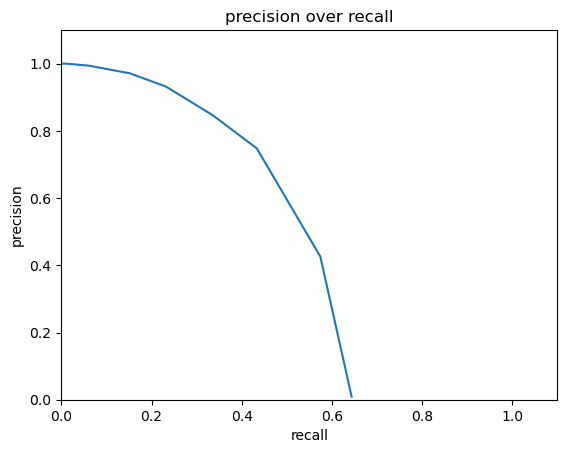

Epoch 26/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 18.07it/s]


average train losses 4.399421744876438
average test losses 4.415458082813143
average precision 0.48446484576836285
test_precision 0.7195917812375464
test_recall 0.2944113499669055
Epoch 27/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:19<00:00, 17.66it/s]


average train losses 4.26224750942654
average test losses 4.3120447882899535
average precision 0.44962497593220285
test_precision 0.7224088713101494
test_recall 0.2732788816122149
Epoch 28/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.54it/s]


average train losses 3.988721185260349
average test losses 4.16335657247451
average precision 0.45158444928145475
test_precision 0.7253570934017893
test_recall 0.2705650316761428
Epoch 29/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 19.94it/s]


average train losses 3.8733175065782337
average test losses 4.201140572202851
average precision 0.529916353055741
test_precision 0.7251053796939708
test_recall 0.3121442343664566
Epoch 30/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.04it/s]


average train losses 3.7657286326090493
average test losses 3.9876177541890376
average precision 0.45999033890518815
test_precision 0.732682382556291
test_recall 0.2964715325826437
Epoch 31/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.27it/s]


average train losses 3.5804565482669406
average test losses 4.105739249123467
average precision 0.4509820171020156
test_precision 0.7248761739500577
test_recall 0.27804664471331136
Epoch 32/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:13<00:00, 25.73it/s]


average train losses 3.4691328207651773
average test losses 3.825500236956822
average precision 0.45134413207549157
test_precision 0.7250275246456268
test_recall 0.30354460354460355
Epoch 33/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:12<00:00, 27.34it/s]


average train losses 3.4578954113854303
average test losses 3.7494316698818806
average precision 0.47888553441739473
test_precision 0.7302235705458505
test_recall 0.30338745616523394
Epoch 34/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 33.07it/s]


average train losses 3.2954573101467557
average test losses 3.648898485379341
average precision 0.4795621563984596
test_precision 0.7188341476621842
test_recall 0.3080706330706331
Epoch 35/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 32.66it/s]


average train losses 3.2163855764600964
average test losses 3.600118368439525
average precision 0.4462392484860532
test_precision 0.7204062954289572
test_recall 0.2998525137414026
Epoch 36/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:10<00:00, 34.73it/s]


average train losses 3.109869188732571
average test losses 3.5846909250628913
average precision 0.452231647431042
test_precision 0.7230152666842066
test_recall 0.29241283407950075
Epoch 37/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:08<00:00, 39.31it/s]


average train losses 3.0256585809919567
average test losses 3.4342485262118174
average precision 0.5442179989920146
test_precision 0.7336926165812485
test_recall 0.323035298035298
Epoch 38/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 44.72it/s]


average train losses 2.9571906195746527
average test losses 3.2613989359293227
average precision 0.5452235025758725
test_precision 0.7342011496893432
test_recall 0.3229236812570146
Epoch 39/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 48.85it/s]


average train losses 2.8868944909837513
average test losses 3.2877821857773
average precision 0.5017135101254634
test_precision 0.7373472045013363
test_recall 0.32390983502094617
Epoch 40/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 45.71it/s]


average train losses 2.853708505630493
average test losses 3.307634568961597
average precision 0.4767871592720425
test_precision 0.7276861689865962
test_recall 0.32344044844044845
Epoch 41/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:07<00:00, 47.79it/s]


average train losses 2.7598065535227456
average test losses 3.102451725223465
average precision 0.49202150595250643
test_precision 0.7227099349888104
test_recall 0.33372789761678656
Epoch 42/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 51.72it/s]


average train losses 2.747644133037991
average test losses 3.0405627652111216
average precision 0.4812718257991781
test_precision 0.7372752000021473
test_recall 0.31878604934160487
Epoch 43/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 52.90it/s]


average train losses 2.651868131425646
average test losses 3.0541207267348245
average precision 0.4726904901626868
test_precision 0.7215622136938641
test_recall 0.3202710869377536
Epoch 44/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 53.93it/s]


average train losses 2.5788118044535318
average test losses 2.9409771240674534
average precision 0.4976393426387664
test_precision 0.733770998261417
test_recall 0.32845940068162294
Epoch 45/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 54.27it/s]


average train losses 2.498386171129015
average test losses 2.9728429086527592
average precision 0.5089422422345997
test_precision 0.7249363092286698
test_recall 0.33705995650440096
Epoch 46/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.74it/s]


average train losses 2.5142975648244223
average test losses 2.8440117560900173
average precision 0.46541966350779534
test_precision 0.7308713750820014
test_recall 0.30628517572962016
Epoch 47/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.05it/s]


average train losses 2.4153431256612143
average test losses 2.931645694621268
average precision 0.5189987994620787
test_precision 0.7147966654885809
test_recall 0.33959219792553125
Epoch 48/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:06<00:00, 55.63it/s]


average train losses 2.3794514073265924
average test losses 2.934852666664667
average precision 0.4919024830169405
test_precision 0.7261651127702757
test_recall 0.3297073297073297
Epoch 49/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.70it/s]


average train losses 2.321724918153551
average test losses 2.751158263948229
average precision 0.5377187041487982
test_precision 0.7363187364672467
test_recall 0.3366421644199422
Epoch 50/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 60.72it/s]

average train losses 2.3238992955949573
average test losses 2.8333461661624093
average precision 0.4826230746319408
test_precision 0.7393396699614517
test_recall 0.3222021805355139


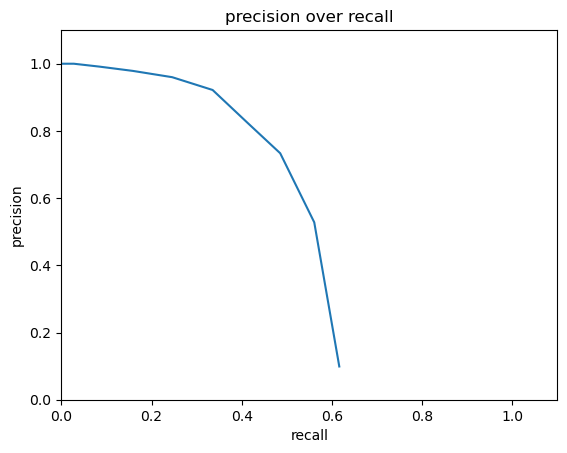

Epoch 51/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 68.73it/s]


average train losses 2.223226096895006
average test losses 2.6205225527456344
average precision 0.5020369219408329
test_precision 0.7370110396393745
test_recall 0.34405697183474965
Epoch 52/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.53it/s]


average train losses 2.5200782352023654
average test losses 2.6848268515703686
average precision 0.5152521248061328
test_precision 0.7694617835135811
test_recall 0.3332894471783361
Epoch 53/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.67it/s]


average train losses 2.259718550576104
average test losses 2.8009764438341147
average precision 0.47540482420696417
test_precision 0.7281069856364282
test_recall 0.31474173974173975
Epoch 54/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 59.89it/s]


average train losses 2.1828994750976562
average test losses 2.7197295749968613
average precision 0.49433593053488295
test_precision 0.7301884138139799
test_recall 0.32807706696595584
Epoch 55/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.11it/s]


average train losses 2.118331935670641
average test losses 2.6343621800088477
average precision 0.47691651390269246
test_precision 0.73195608106545
test_recall 0.3264818514818515
Epoch 56/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 64.23it/s]


average train losses 2.0438091622458563
average test losses 2.693847204884912
average precision 0.49567611137321455
test_precision 0.7322950344608711
test_recall 0.3328828578828578
Epoch 57/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 72.30it/s]


average train losses 1.9804113573498197
average test losses 2.489419338030693
average precision 0.5108333156274796
test_precision 0.757203139455353
test_recall 0.33974811197033417
Epoch 58/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.69it/s]


average train losses 1.9382843176523845
average test losses 2.4756305193968986
average precision 0.5339889521850836
test_precision 0.7361673436256265
test_recall 0.3554392109947665
Epoch 59/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.77it/s]


average train losses 1.8903390831417508
average test losses 2.4523044834789047
average precision 0.5028195801601236
test_precision 0.7424855014121279
test_recall 0.3327986827986828
Epoch 60/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 70.82it/s]


average train losses 1.8552576171027289
average test losses 2.429467283252977
average precision 0.4984659372345668
test_precision 0.7283866947934178
test_recall 0.3460801544134878
Epoch 61/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 63.71it/s]


average train losses 1.8133236037360296
average test losses 2.4977866608193118
average precision 0.4908814018692139
test_precision 0.732497505814629
test_recall 0.34973082473082473
Epoch 62/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 65.19it/s]


average train losses 1.798529240820143
average test losses 2.40865954476544
average precision 0.5307673433893783
test_precision 0.7304310719319931
test_recall 0.3660520549409438
Epoch 63/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.60it/s]


average train losses 1.7300438086191814
average test losses 2.418125311703424
average precision 0.4783749681949168
test_precision 0.7363798639693993
test_recall 0.33219465719465724
Epoch 64/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.83it/s]


average train losses 1.7127628061506484
average test losses 2.436646119312004
average precision 0.4764182517139458
test_precision 0.7268667050027708
test_recall 0.3431403986959543
Epoch 65/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.67it/s]


average train losses 1.7120998700459797
average test losses 2.4288429660335225
average precision 0.4665289214543366
test_precision 0.7379300254906583
test_recall 0.3241851769629548
Epoch 66/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 75.14it/s]


average train losses 1.6513376235961914
average test losses 2.433546183965145
average precision 0.47831411850513567
test_precision 0.7145541777307122
test_recall 0.3468850079961191
Epoch 67/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.36it/s]


average train losses 1.6057586802376642
average test losses 2.3184542397827843
average precision 0.5345919677893259
test_precision 0.7437051744257992
test_recall 0.36380471380471374
Epoch 68/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.36it/s]


average train losses 1.5767416291766696
average test losses 2.3806683818499246
average precision 0.4699165905860472
test_precision 0.7245130142830716
test_recall 0.32024703691370354
Epoch 69/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.66it/s]


average train losses 1.5992729663848877
average test losses 2.3424259750252094
average precision 0.4932765607553113
test_precision 0.7318601762462389
test_recall 0.34314307092084867
Epoch 70/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.31it/s]


average train losses 1.536646498574151
average test losses 2.3259726192197228
average precision 0.4994456541290139
test_precision 0.7282393883054087
test_recall 0.3574507796730019
Epoch 71/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 74.46it/s]


average train losses 1.4979761574003432
average test losses 2.3557762700607974
average precision 0.4944604958703572
test_precision 0.7303581913364222
test_recall 0.3558928725595392
Epoch 72/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 67.60it/s]


average train losses 1.4641564422183566
average test losses 2.419441795247233
average precision 0.49539301517755424
test_precision 0.7340900890632376
test_recall 0.3459565126231793
Epoch 73/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 76.47it/s]


average train losses 1.4301882055070665
average test losses 2.238226163930703
average precision 0.47211450332127036
test_precision 0.7302473007027928
test_recall 0.3243214604325716
Epoch 74/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 71.66it/s]


average train losses 1.4125147528118558
average test losses 2.3444721951783554
average precision 0.48738216536817996
test_precision 0.7235435659763565
test_recall 0.35088090921424253
Epoch 75/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:05<00:00, 69.72it/s]

average train losses 1.365711318122016
average test losses 2.3535358287669994
average precision 0.4632706186866819
test_precision 0.7136122705302554
test_recall 0.330304263637597


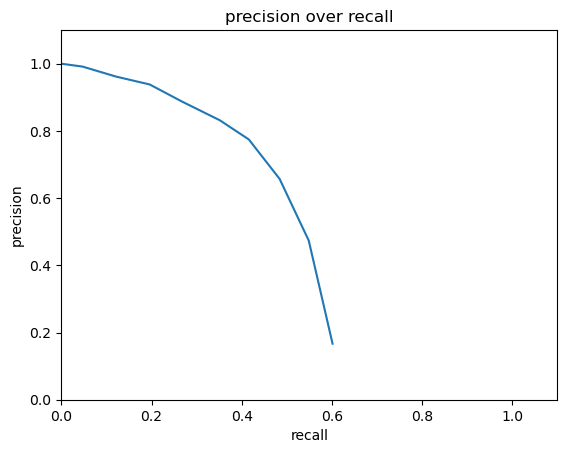

Epoch 76/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:04<00:00, 77.51it/s]


average train losses 1.4528822236590915
average test losses 2.4072224134393565
average precision 0.4741519569763766
test_precision 0.7558975064079709
test_recall 0.308811044922156
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.19it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:39<00:00, 10.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.21it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.29it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.86it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.56it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.45it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 137.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.75it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.64it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.52it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 148.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.79it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.36it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.53it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.43it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.42it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.62it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.67it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.93it/s]

Max accuracy: 0.5434470778418046
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 14.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:39<00:00, 10.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 66.80it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.07it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.34it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.24it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.88it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.87it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.80it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.18it/s]

Max accuracy: 0.5474753885935801
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.01it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.25it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.30it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.39it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.21it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.60it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.48it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.35it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.45it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.72it/s]

Max accuracy: 0.5584578064907425
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.16it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.37it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 22.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.87it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.61it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.10it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.39it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.78it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.62it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.15it/s]

Max accuracy: 0.5584578064907425
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.5500)


Max accuracy: 0.5584578064907425
With filter threshold: tensor(0.5500)
With NMS threshold: tensor(0.)
Epoch 1/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 163.83it/s]


average train losses 3.9418163034651013
average test losses 3.2224980195363364
average precision 0.17961667961667963
test_precision 0.9812224812224812
test_recall 0.10338858672192004
Epoch 2/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 149.49it/s]


average train losses 2.2128677235709295
average test losses 2.860252929379118
average precision 0.1785375118708452
test_precision 0.948976948976949
test_recall 0.1218081301414635
Epoch 3/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 148.40it/s]


average train losses 1.8126552369859483
average test losses 2.504185385513849
average precision 0.26133126133126133
test_precision 0.9371924371924372
test_recall 0.1565038870594426
Epoch 4/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 144.23it/s]


average train losses 1.5841672552956476
average test losses 2.4117969989436983
average precision 0.266338599671933
test_precision 0.9471855305188638
test_recall 0.1961796434018656
Epoch 5/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 146.65it/s]


average train losses 1.4729745520485773
average test losses 2.387565160493905
average precision 0.26547526547526545
test_precision 0.9527324527324528
test_recall 0.21092323314545536
Epoch 6/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 145.37it/s]


average train losses 0.9203346570332845
average test losses 1.695108105484237
average precision 0.2671587671587672
test_precision 0.9447034447034447
test_recall 0.21819271263715706
Epoch 7/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 142.69it/s]


average train losses 0.7880569696426392
average test losses 1.7536928273758656
average precision 0.34211775878442546
test_precision 0.909716826383493
test_recall 0.2279299918188807
Epoch 8/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 144.22it/s]


average train losses 0.7207052707672119
average test losses 1.6642746343104928
average precision 0.343671760338427
test_precision 0.9174220840887507
test_recall 0.22929724596391265
Epoch 9/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 139.38it/s]


average train losses 0.6932107739978366
average test losses 1.7270555972119002
average precision 0.34104722438055773
test_precision 0.912401795735129
test_recall 0.23843255509922176
Epoch 10/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 139.20it/s]


average train losses 0.6927900181876289
average test losses 1.7750548805903505
average precision 0.3463912630579297
test_precision 0.9210912544245877
test_recall 0.23538580760802985
Epoch 11/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 141.17it/s]


average train losses 0.6585404541757371
average test losses 1.7131836149215358
average precision 0.26133126133126133
test_precision 0.9020547353880687
test_recall 0.2138002943558499
Epoch 12/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 142.49it/s]


average train losses 0.6383113861083984
average test losses 1.87844725825593
average precision 0.2601225934559268
test_precision 0.9045799879133212
test_recall 0.23574799685910797
Epoch 13/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 144.90it/s]


average train losses 0.6313709815343221
average test losses 1.665853544963561
average precision 0.34861434861434865
test_precision 0.9209358542691876
test_recall 0.25004625004625003
Epoch 14/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 145.37it/s]


average train losses 0.6239732172754076
average test losses 1.8470307657776395
average precision 0.26292842959509627
test_precision 0.9063282396615729
test_recall 0.22925870425870426
Epoch 15/300
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 144.21it/s]


average train losses 0.6144457989268832
average test losses 1.6147291224736433
average precision 0.342009842009842
test_precision 0.9072779072779072
test_recall 0.2541876847432403
------------------------EARLY STOPPING------------------------
------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.36it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.51it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.54it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.82it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.65it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 148.38it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 140.66it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 136.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.16it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.14it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 163.74it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 162.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 161.87it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 159.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 195.41it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.17it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 195.40it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 195.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 195.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 195.76it/s]

Max accuracy: 0.5339685322638569
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.36it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.52it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.96it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.22it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.70it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.97it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.59it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.30it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.59it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.11it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.00it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.78it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.13it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.49it/s]

Max accuracy: 0.5339685322638569
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.6000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.26it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.85it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.28it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.44it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.95it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.35it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.82it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.75it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.26it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.78it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.29it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.18it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.86it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.94it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.29it/s]

Max accuracy: 0.5636381704256116
With filter threshold: tensor(0.0500)
With NMS threshold: tensor(0.5500)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.63it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.73it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.64it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.65it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.70it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.81it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.76it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.23it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.74it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.53it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.93it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.31it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.90it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.48it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.62it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.83it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.78it/s]

Max accuracy: 0.5636381704256116
With filter threshold: tensor(0.0500)
With NMS threshold: tensor(0.5500)


Max accuracy: 0.5636381704256116
With filter threshold: tensor(0.5500)
With NMS threshold: tensor(0.0500)


In [11]:
sd = torch.load("models/configs/voc_pretrained.pt")
sd = longtrain(TinyYoloV2, sd, device=device, frozen_layers=['1', '2', '3'], lr=0.00003, weight_decay=0.0001, train_batch_size=256, epochs=300)
acc, max_nms, max_filter = identify_threshold(TinyYoloV2, sd, device=device)

torch.save(sd, f"results/voc_finetuned_123_frozen_layers_300_epochs_00003_lr_0001_decay.pt")

print('Max accuracy:', acc)
print('With filter threshold:', max_filter)
print('With NMS threshold:', max_nms)

net = MyTinyYoloV2(num_classes=1)
qsd = net.state_dict()

for layer in range(1,9):
    conv_w = sd[f"conv{layer}.weight"]
    bn_rm = sd[f"bn{layer}.running_mean"]
    bn_rv = sd[f"bn{layer}.running_var"]
    bn_w = sd[f"bn{layer}.weight"]
    bn_b = sd[f"bn{layer}.bias"]
    
    fused_weight, fused_bias = fuse_conv_bn_weights(conv_w, bn_rm, bn_rv, bn_w, bn_b)
        
    scale_fused_conv = tensor_scale(fused_weight)
    
    qsd[f"conv{layer}.weight"] = fused_weight
    qsd[f"conv{layer}.bias"] = fused_bias

qsd["conv9.weight"] = sd["conv9.weight"]
qsd["conv9.bias"] = sd["conv9.bias"]


sd = longtrain(MyTinyYoloV2, qsd, device=device, frozen_layers=['1', '2', '3'], lr=0.00003, weight_decay=0.0001, train_batch_size=256, epochs=300, filter_threshold=max_filter, nms_threshold=max_nms)

acc, max_nms, max_filter = identify_threshold(MyTinyYoloV2, sd, device=device)

torch.save(sd, f"results/voc_fused_123_frozen_layers_300_epochs_00003_lr_0001_decay.pt")

print('Max accuracy:', acc)
print('With filter threshold:', max_filter)
print('With NMS threshold:', max_nms)

In [12]:
net = PrunedMyTinyYoloV2(num_classes=1)
net.load_state_dict(sd)
net.to(device)

ratio = 0.03
lr = 0.00003
weight_decay = 0.0001

max_nms, max_filter = 0.5, 0.3

accuracy, times, losses, train_losses = [], [], [], []

prune_every = 10
prune_times = 40

criterion = YoloLoss(anchors=net.anchors)

frozen_layers = ['1', '2', '3']
nr_frozen = len(frozen_layers)


for key, param in net.named_parameters():
    if any(x in key for x in frozen_layers):
        param.requires_grad = False
    
optimizer = torch.optim.Adam(filter(lambda x: x.requires_grad, net.parameters()), lr=lr, weight_decay=weight_decay)


l = 0


for i in range(prune_times * prune_every):
    print(f"Epoch {i + 1}/{prune_times * prune_every}")
    if i % prune_every == 0:
        sd = l1_structured_pruning(net.cpu().state_dict(), ratio)
        sd = densify_state_dict(sd)
        net.load_state_dict(sd)

    net, train_loss = train(net, VOCDataLoaderPerson(train=True, batch_size=256, shuffle=True), optimizer, criterion, device=device)
    train_losses.append(train_loss)
        
    if i % prune_every == prune_every - 1:
        p, r, l, t  = validate(net, VOCDataLoaderPerson(train=False, batch_size=1, shuffle=True), optimizer, criterion, device=device, filter_threshold=max_filter, nms_threshold=max_nms)

        acc = ap(p, r)
        
        #accuracy.append(acc)
        times.append(t)
        losses.append(l)
        

    if (l > 5):
        break

Epoch 1/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 2/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 3/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 4/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 5/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 6/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 7/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 8/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 9/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 10/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 125.78it/s]


Epoch 11/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 12/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 13/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 14/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 15/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 16/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 17/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 18/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 19/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 20/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 124.56it/s]


Epoch 21/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 22/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 23/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 24/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 25/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 26/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 27/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 28/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 29/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 30/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 114.50it/s]


Epoch 31/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 32/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 33/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 34/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 35/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 36/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 37/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 38/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 39/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 40/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:03<00:00, 101.59it/s]


Epoch 41/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.08s/it]


Epoch 42/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 43/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 44/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 45/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 46/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 47/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 48/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 49/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 50/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 126.40it/s]


Epoch 51/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 52/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 53/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 54/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 55/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 56/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 57/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 58/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 59/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 60/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 137.84it/s]


Epoch 61/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 62/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 63/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 64/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 65/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 66/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 67/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 68/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 69/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 70/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 142.44it/s]


Epoch 71/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 72/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 73/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 74/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 75/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 76/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 77/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 78/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 79/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 80/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 142.28it/s]


Epoch 81/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 82/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 83/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 84/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 85/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 86/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 87/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 88/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 89/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 90/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 144.40it/s]


Epoch 91/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 92/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 93/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 94/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 95/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 96/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 97/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 98/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 99/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 100/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 152.68it/s]


Epoch 101/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 102/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 103/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 104/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 105/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 106/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 107/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 108/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 109/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 110/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 158.79it/s]


Epoch 111/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 112/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 113/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 114/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 115/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 116/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 117/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 118/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 119/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 120/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 170.47it/s]


Epoch 121/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 122/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 123/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 124/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 125/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 126/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 127/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 128/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 129/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 130/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 172.00it/s]


Epoch 131/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 132/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 133/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 134/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 135/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 136/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 137/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 138/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 139/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 140/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 171.09it/s]


Epoch 141/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 142/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 143/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 144/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 145/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 146/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.07s/it]


Epoch 147/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 148/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


Epoch 149/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 150/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 169.23it/s]


Epoch 151/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.13s/it]


Epoch 152/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 153/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 154/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 155/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 156/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 157/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 158/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 159/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 160/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 167.30it/s]


Epoch 161/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:18<00:00,  2.08s/it]


Epoch 162/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 163/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 164/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 165/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 166/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 167/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 168/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 169/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.02s/it]


Epoch 170/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 167.77it/s]


Epoch 171/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:18<00:00,  2.03s/it]


Epoch 172/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.05s/it]


Epoch 173/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 174/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 175/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 176/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 177/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.03s/it]


Epoch 178/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 179/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


Epoch 180/400
------------------------Training-----------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.04s/it]


------------------------Validation-----------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:02<00:00, 171.08it/s]


In [13]:
acc, max_nms, max_filter = identify_threshold(PrunedMyTinyYoloV2, sd, device=device)

print('Max accuracy:', acc)
print('With filter threshold:', max_filter)
print('With NMS threshold:', max_nms)
torch.save(sd, f"results/voc_pruned_0_frozen_layers_300_epochs_00003_lr_01_decay.pt")

------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.09it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.79it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:36<00:00,  6.39it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.27it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 158.89it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.28it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.57it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.73it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 200.24it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 200.64it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 201.32it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 200.85it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 199.58it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 199.68it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 205.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 205.06it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.33it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.92it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 203.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 203.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 206.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.91it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 205.01it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 205.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 205.52it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.99it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.83it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 204.20it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 203.98it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 203.90it/s]

Max accuracy: 0.17998140323510972
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.8000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.89it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.50it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:36<00:00,  6.38it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:35<00:00,  6.42it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.69it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 16.07it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.78it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:46<00:00,  9.43it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.49it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.92it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.09it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.37it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.15it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 185.38it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 182.84it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.47it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.23it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 197.38it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.22it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.36it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.34it/s]

Max accuracy: 0.18239008410186666
With filter threshold: tensor(0.)
With NMS threshold: tensor(0.7000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.81it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:13<00:00, 13.58it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.66it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:33<00:00, 10.65it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:58<00:00,  8.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.86it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.08it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:31<00:00, 10.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.68it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.49it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 16.04it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.54it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.84it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.46it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 58.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.52it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.91it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 45.50it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.04it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.71it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 122.02it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.77it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.30it/s]

Max accuracy: 0.18456640234197633
With filter threshold: tensor(0.1500)
With NMS threshold: tensor(0.7000)


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.45it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.12it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.32it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.34it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.67it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.71it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.72it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.47it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.57it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.41it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.92it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.21it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.27it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.00it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.33it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.40it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.14it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.60it/s]


------------------------Validation-----------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.19it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.57it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.10it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.31it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.96it/s]


------------------------Validation-----------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.14it/s]


Max accuracy: 0.18705929436439409
With filter threshold: tensor(0.1750)
With NMS threshold: tensor(0.6750)


Max accuracy: 0.18705929436439409
With filter threshold: tensor(0.6750)
With NMS threshold: tensor(0.1750)
